In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Downloads\Supply+Chain+Project\Data.csv")

In [3]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

In [4]:
df.tail()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
24995                  4             5390  ...               1            142   
24996                  4             4490  ...               1            130   
24997                  2             5403  ...               1            147   
24998                  2            10562  ...               1             60   
24999                  4             5664  ...               1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
24995                             A                 2              30   
24996                             B                 4              18   
24997                            B+                 5              25   
24998                             A                 6              30   
24999                            B+                 2              11   

       product_wg_ton  
24995           32093  
24996           12114  
24997           27080  
24998           25093  
24999            5058  

[5 rows x 24 columns]

In [5]:
df.shape

(25000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [7]:
df.describe().T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

In [8]:
dups = df.duplicated()
print("Number of Duplicated rows: ", dups.sum())
df[dups]

Number of Duplicated rows:  0


Empty DataFrame
Columns: [Ware_house_ID, WH_Manager_ID, Location_type, WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num, wh_owner_type, distributor_num, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num, wh_est_year, storage_issue_reported_l3m, temp_reg_mach, approved_wh_govt_certificate, wh_breakdown_l3m, govt_check_l3m, product_wg_ton]
Index: []

[0 rows x 24 columns]

In [9]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [13]:
df.drop(['Ware_house_ID', 'WH_Manager_ID', 'wh_est_year'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [15]:
df.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [18]:
df_x = df.drop([ 'product_wg_ton'], axis=1)
df_y = df['product_wg_ton']

In [19]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23134 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 23134 non-null  object 
 1   WH_capacity_size              23134 non-null  object 
 2   zone                          23134 non-null  object 
 3   WH_regional_zone              23134 non-null  object 
 4   num_refill_req_l3m            23134 non-null  int64  
 5   transport_issue_l1y           23134 non-null  int64  
 6   Competitor_in_mkt             23134 non-null  int64  
 7   retail_shop_num               23134 non-null  int64  
 8   wh_owner_type                 23134 non-null  object 
 9   distributor_num               23134 non-null  int64  
 10  flood_impacted                23134 non-null  int64  
 11  flood_proof                   23134 non-null  int64  
 12  electric_supply               23134 non-null  int64  
 13  d

In [20]:
df_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 23134 entries, 0 to 24999
Series name: product_wg_ton
Non-Null Count  Dtype
--------------  -----
23134 non-null  int64
dtypes: int64(1)
memory usage: 361.5 KB


In [21]:
df_x['transport_issue_l1y'].value_counts()

0    14036
1     4306
2     2035
3     1700
4      733
5      324
Name: transport_issue_l1y, dtype: int64

In [23]:
df_x['flood_impacted'].value_counts()

0    20992
1     2142
Name: flood_impacted, dtype: int64

In [24]:
df_x['flood_proof'].value_counts()

0    21976
1     1158
Name: flood_proof, dtype: int64

In [25]:
df_x['electric_supply'].value_counts()

1    15116
0     8018
Name: electric_supply, dtype: int64

In [26]:
df_x['transport_issue_l1y'] = df_x['transport_issue_l1y'].astype('category')
df_x['flood_impacted'] = df_x['flood_impacted'].astype('category')
df_x['flood_proof'] = df_x['flood_proof'].astype('category')
df_x['electric_supply'] = df_x['electric_supply'].astype('category')

In [27]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23134 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 23134 non-null  object  
 1   WH_capacity_size              23134 non-null  object  
 2   zone                          23134 non-null  object  
 3   WH_regional_zone              23134 non-null  object  
 4   num_refill_req_l3m            23134 non-null  int64   
 5   transport_issue_l1y           23134 non-null  category
 6   Competitor_in_mkt             23134 non-null  int64   
 7   retail_shop_num               23134 non-null  int64   
 8   wh_owner_type                 23134 non-null  object  
 9   distributor_num               23134 non-null  int64   
 10  flood_impacted                23134 non-null  category
 11  flood_proof                   23134 non-null  category
 12  electric_supply               23134 non-null  

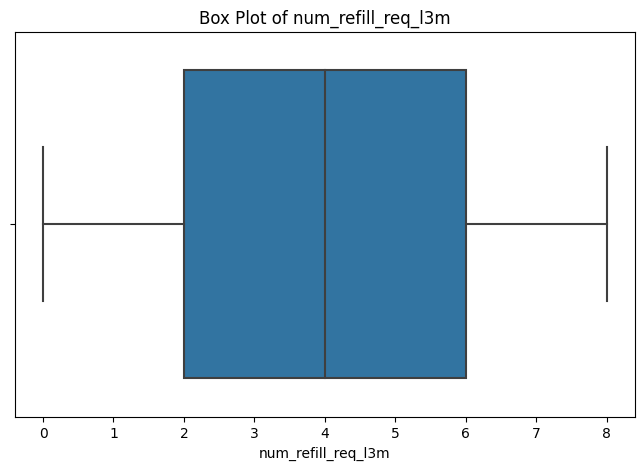

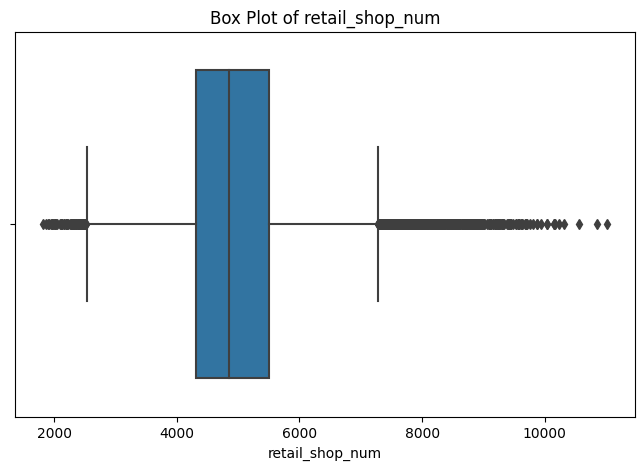

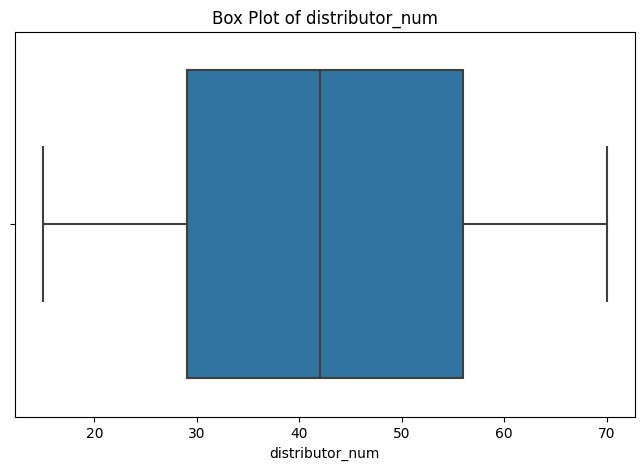

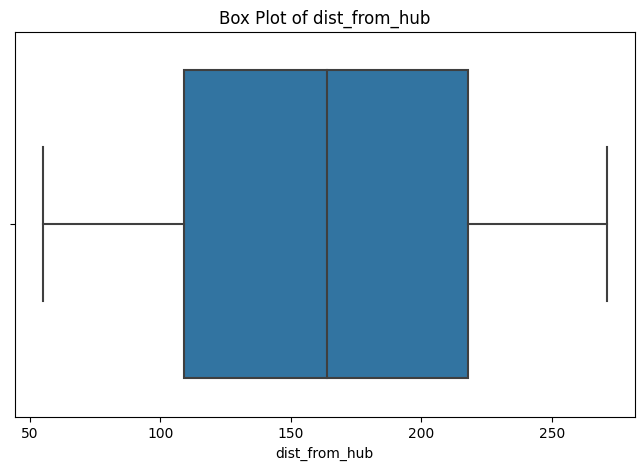

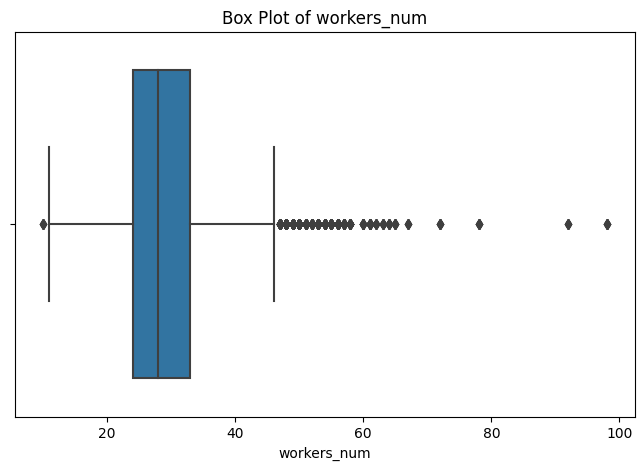

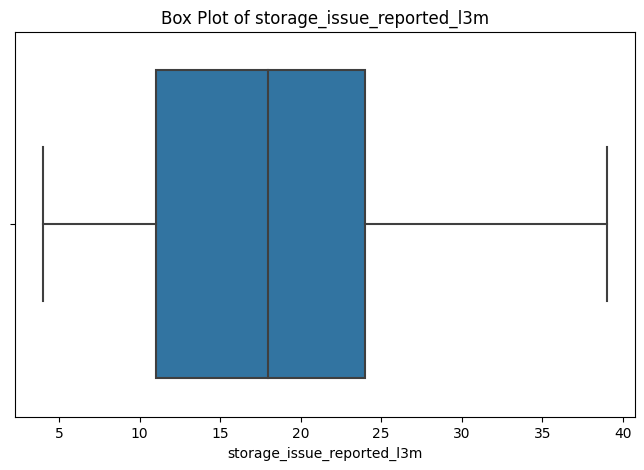

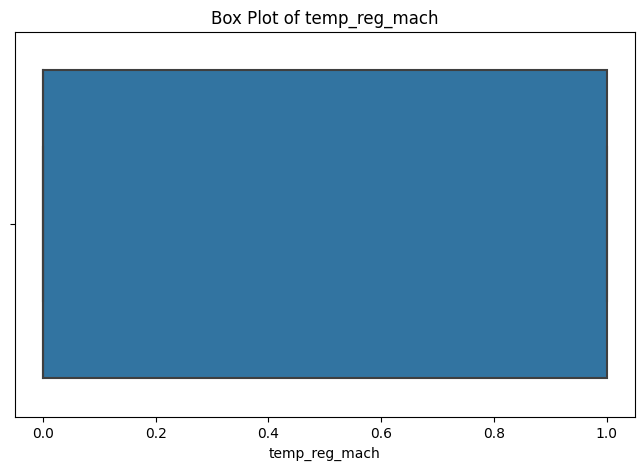

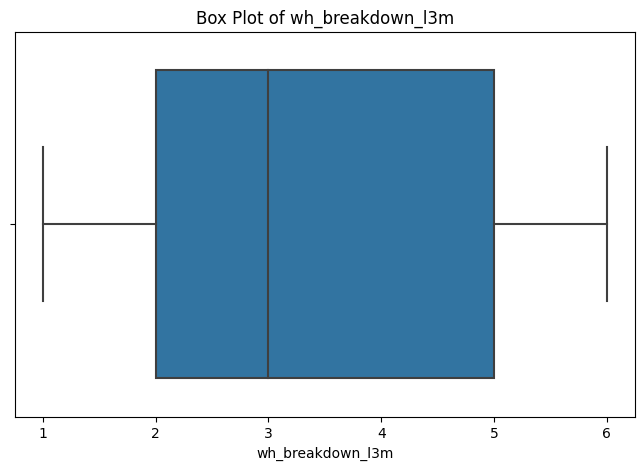

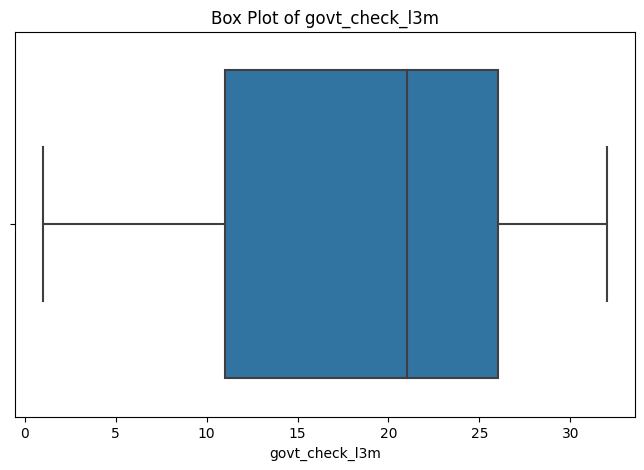

In [28]:
continuous_attributes = ['num_refill_req_l3m', 'retail_shop_num', 'distributor_num', 'dist_from_hub',
                          'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m']
for attribute in continuous_attributes:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_x[attribute])
    plt.title(f'Box Plot of {attribute}')

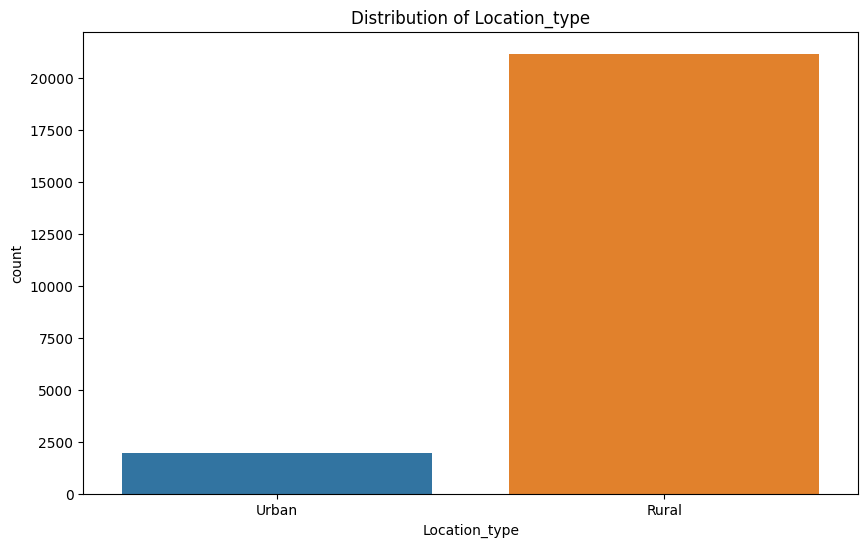

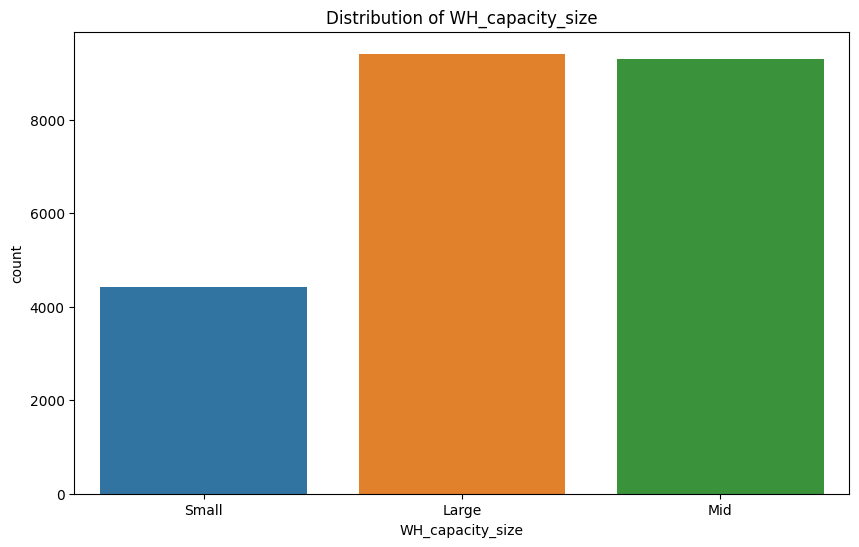

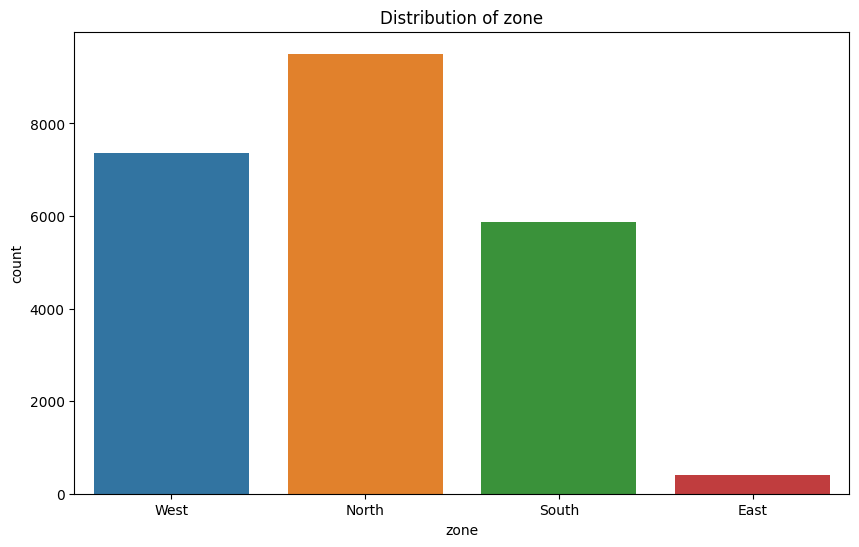

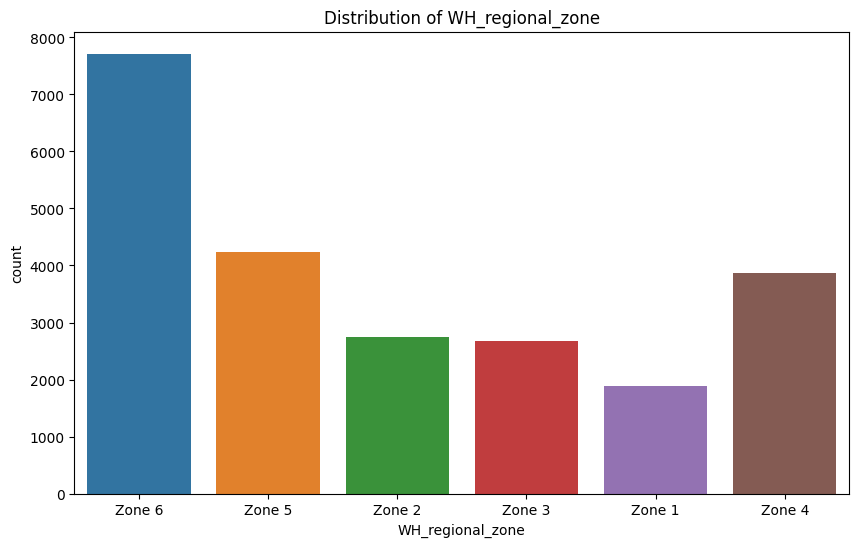

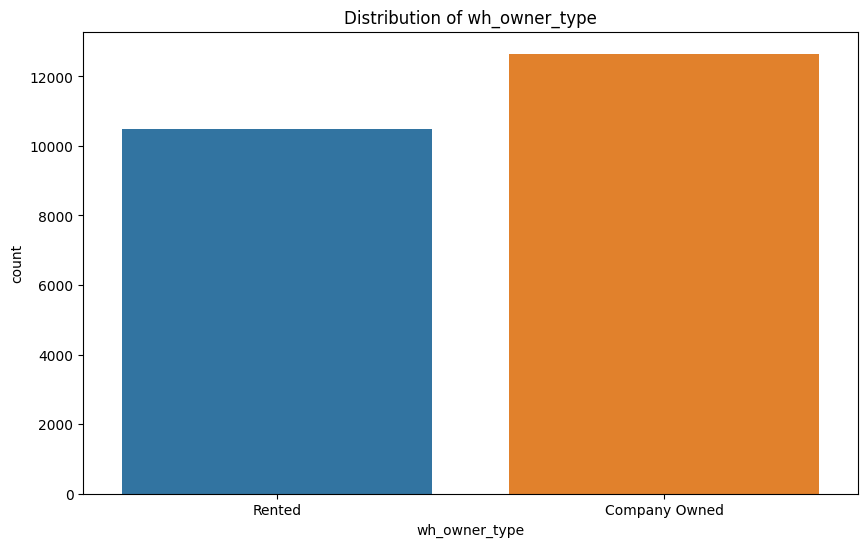

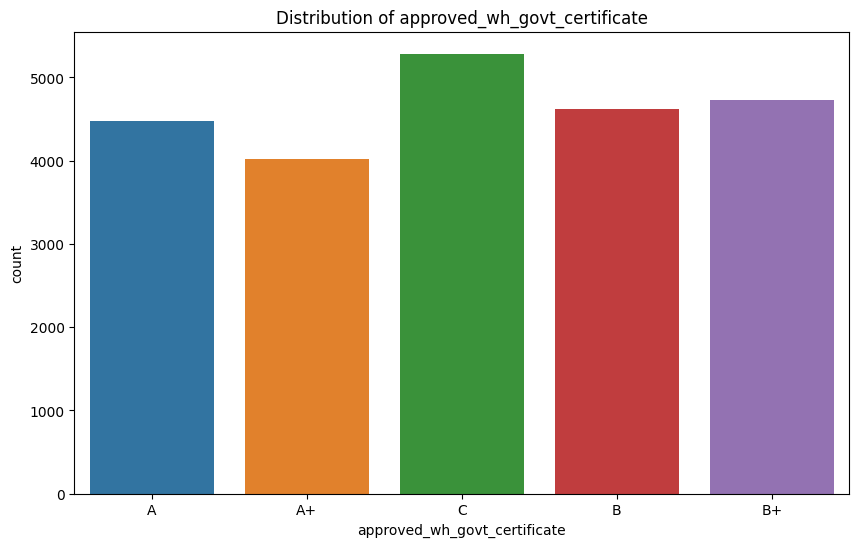

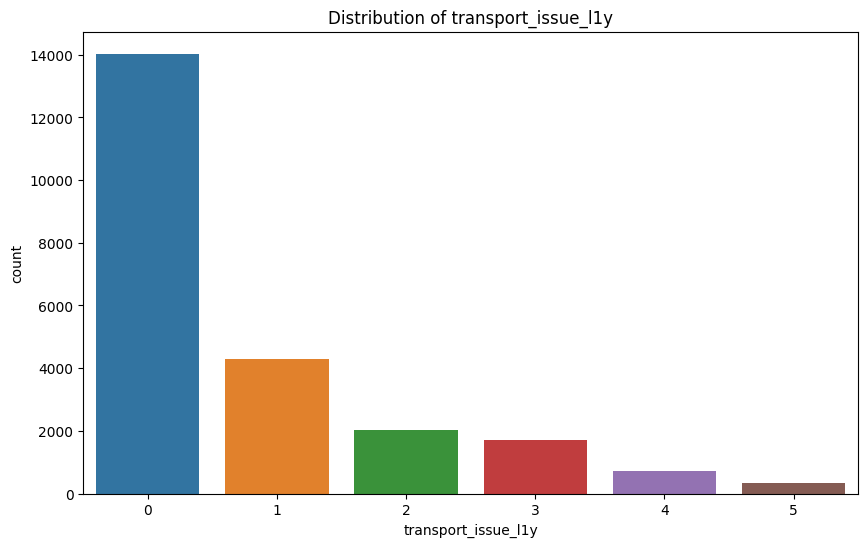

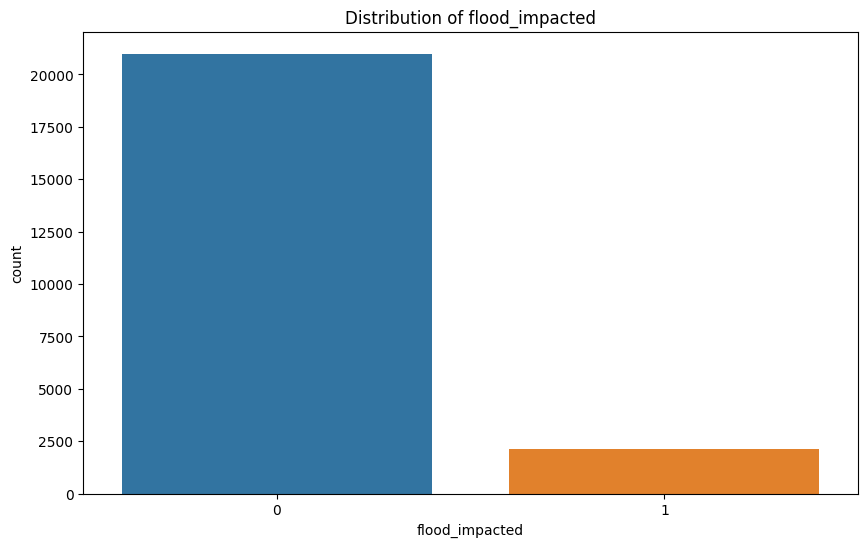

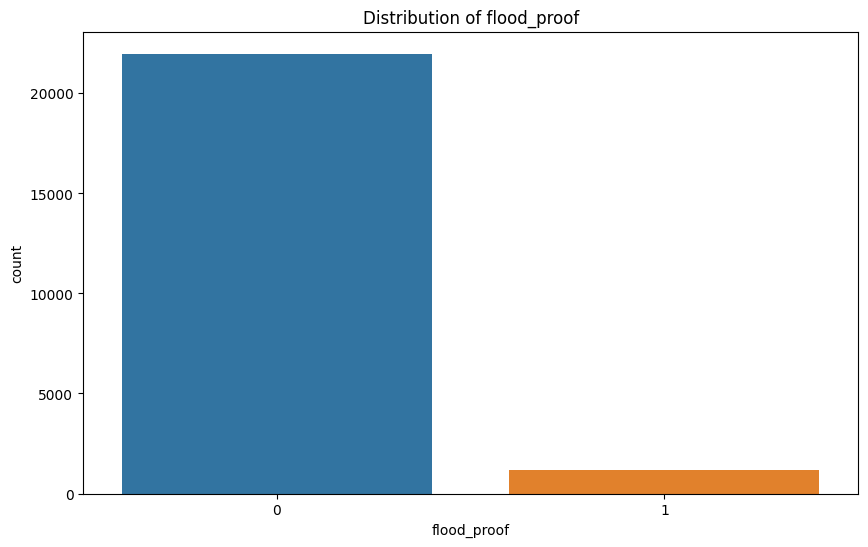

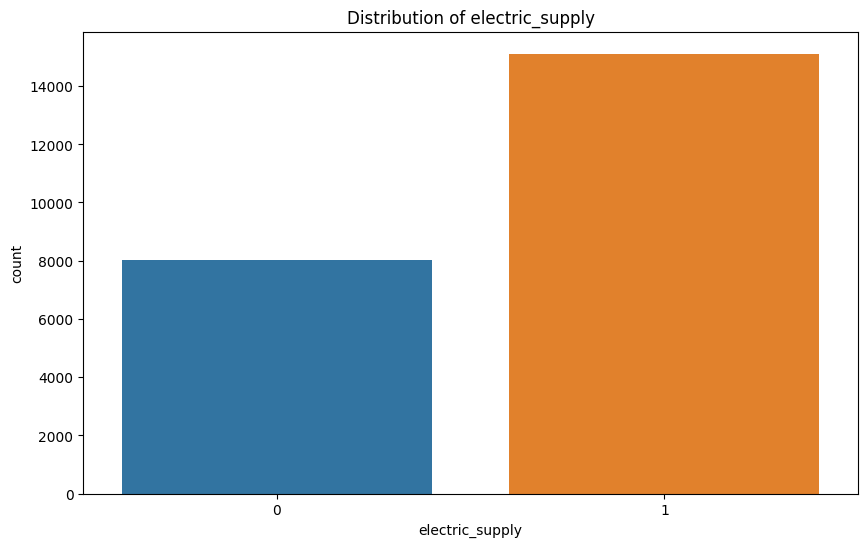

In [29]:
categorical_attributes = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
                           'wh_owner_type', 'approved_wh_govt_certificate', 'transport_issue_l1y',
                           'flood_impacted', 'flood_proof', 'electric_supply']
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=attribute, data=df_x)
    plt.title(f'Distribution of {attribute}')
    plt.show()

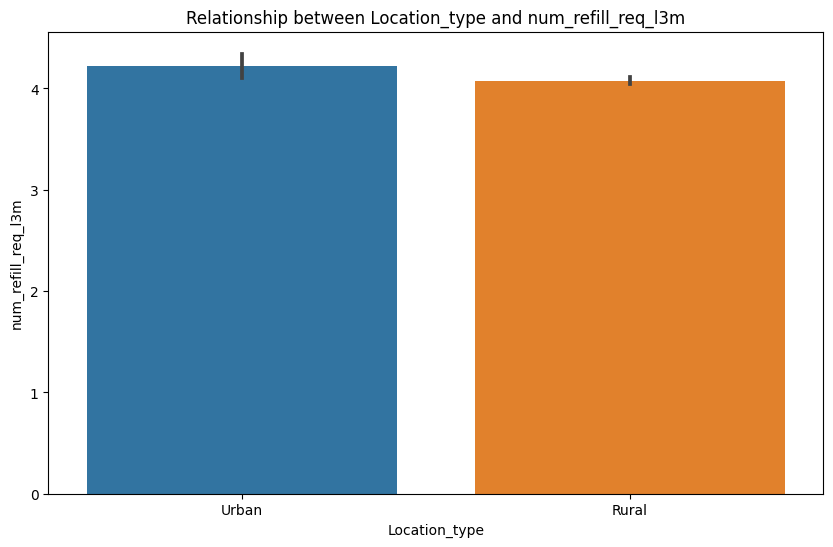

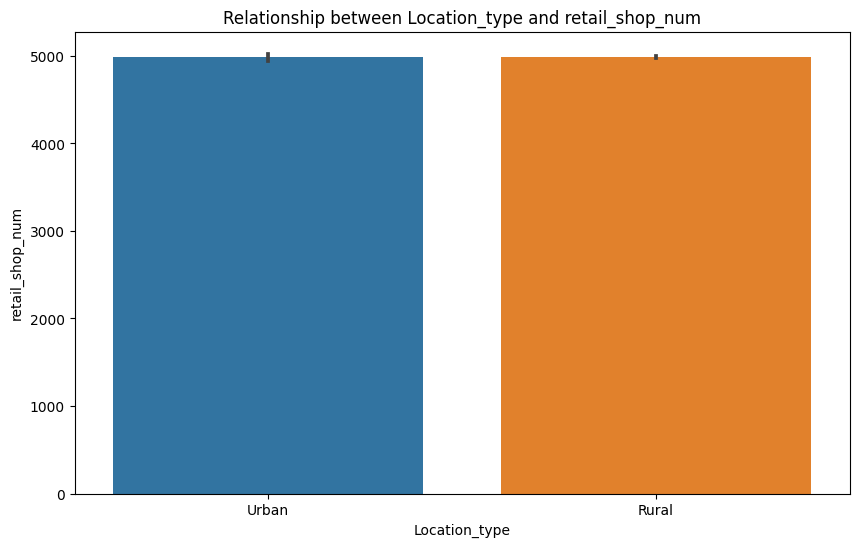

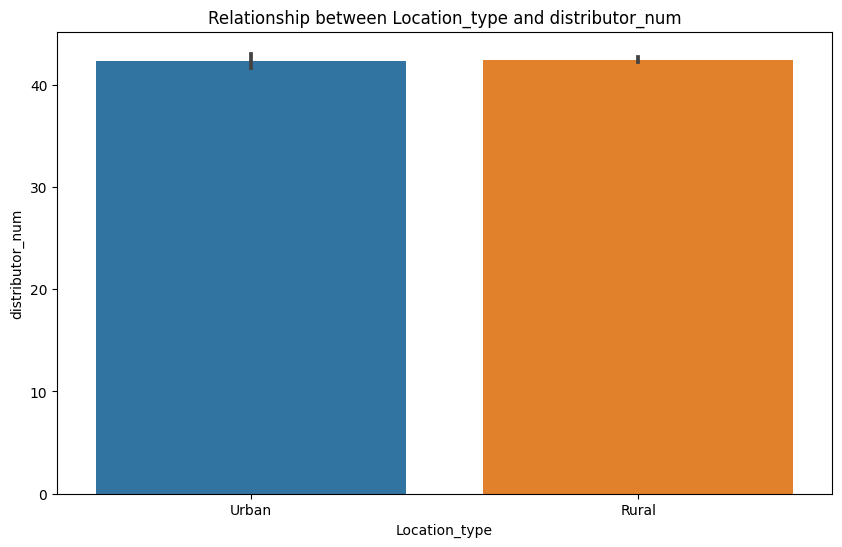

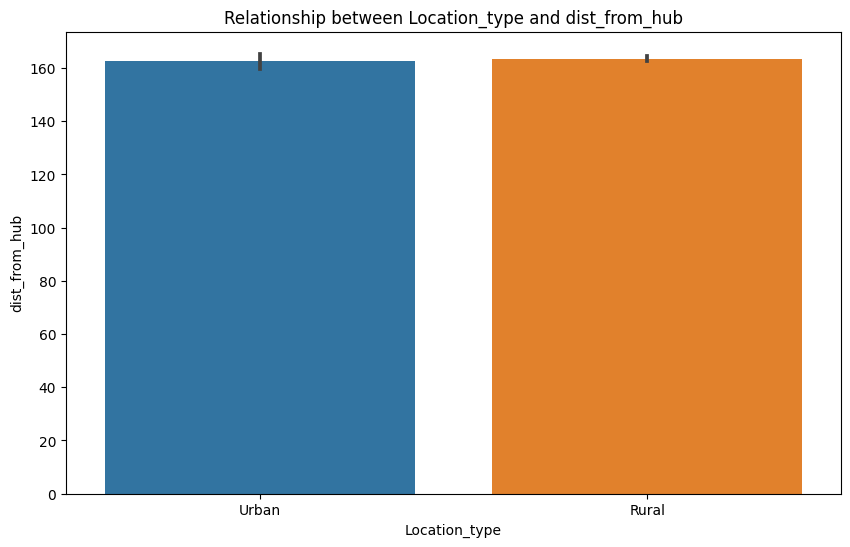

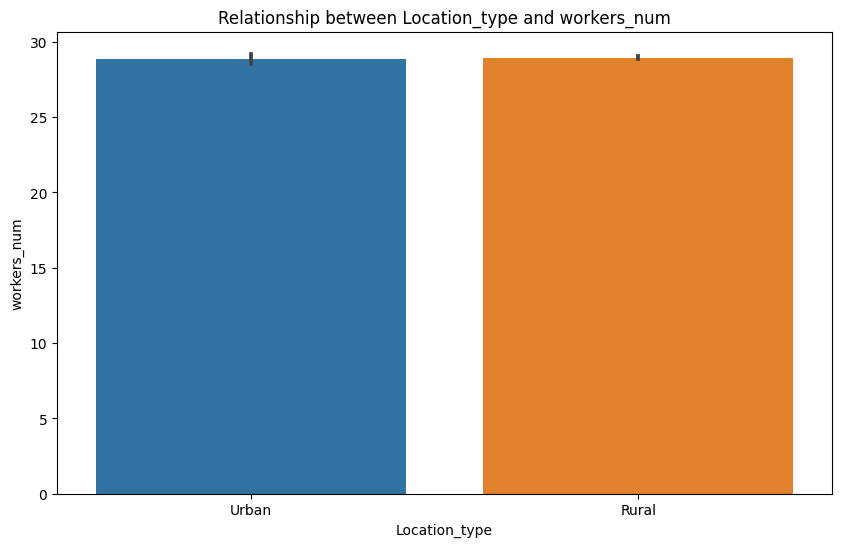

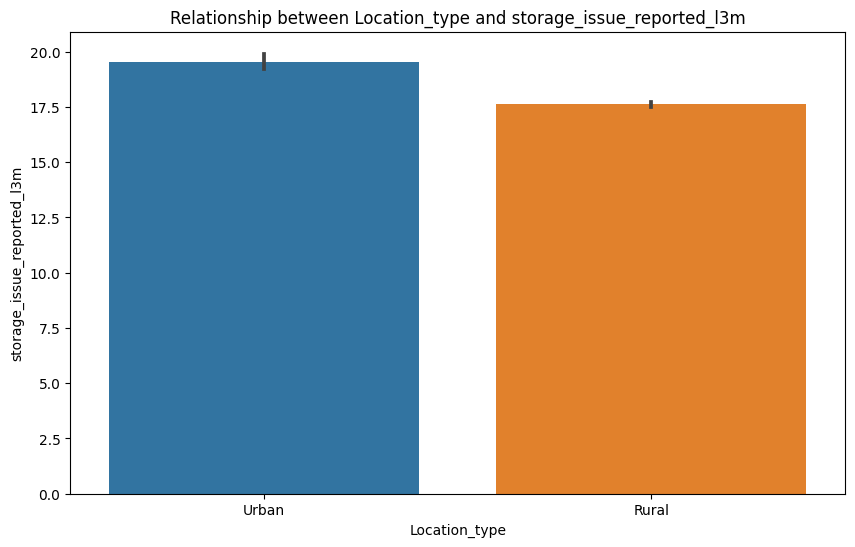

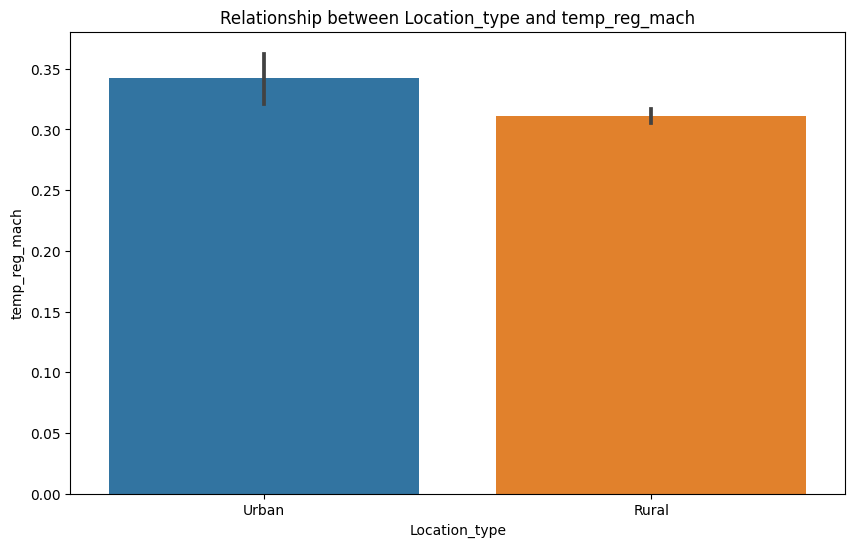

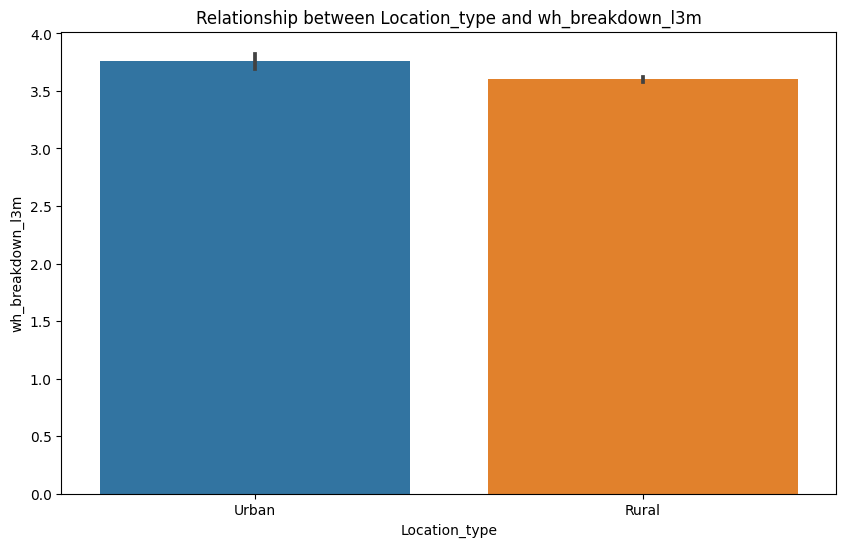

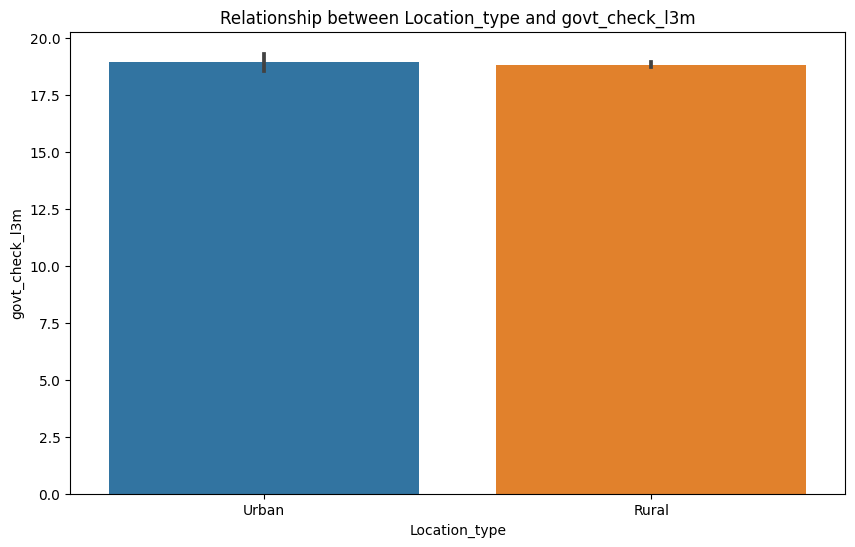

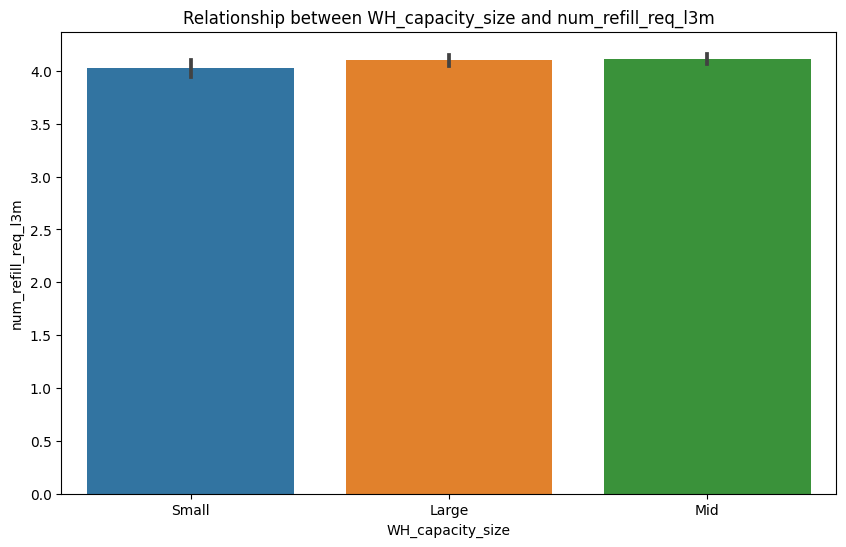

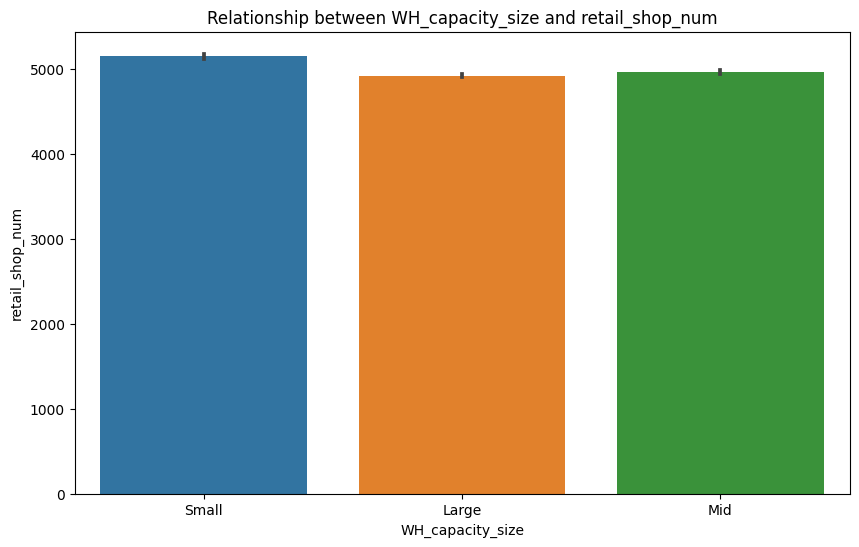

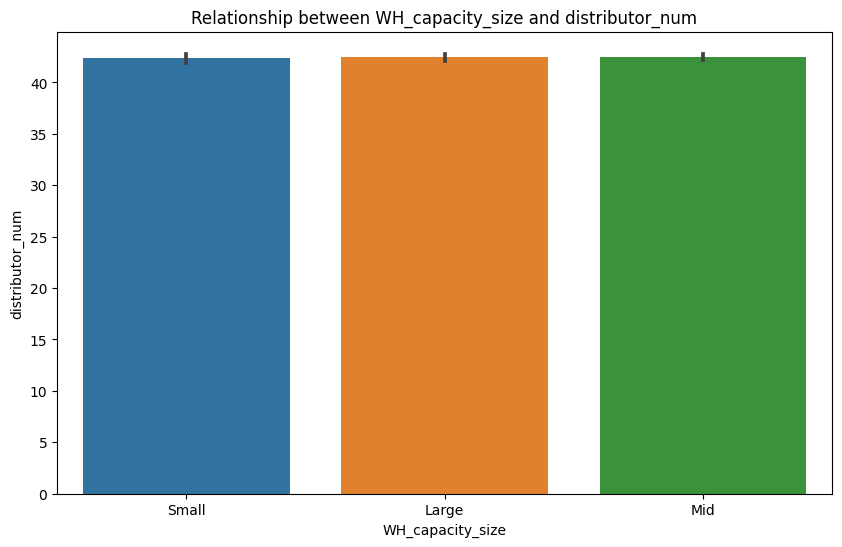

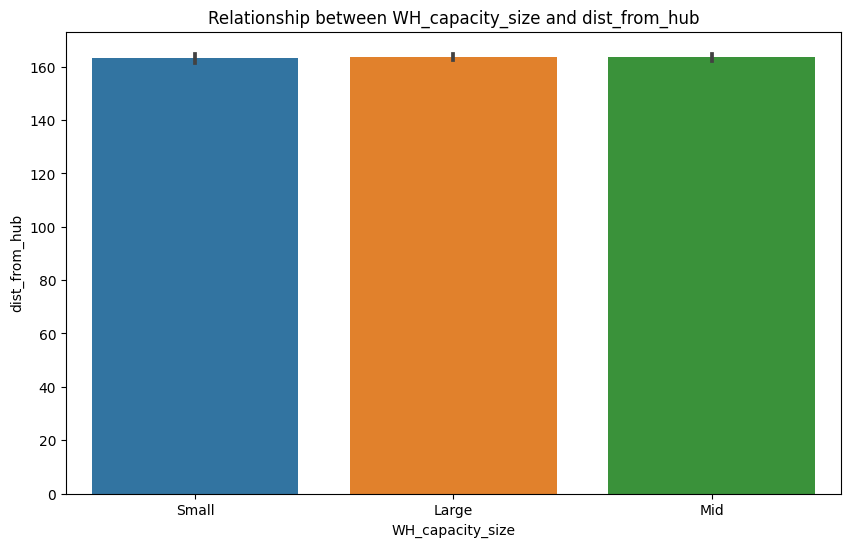

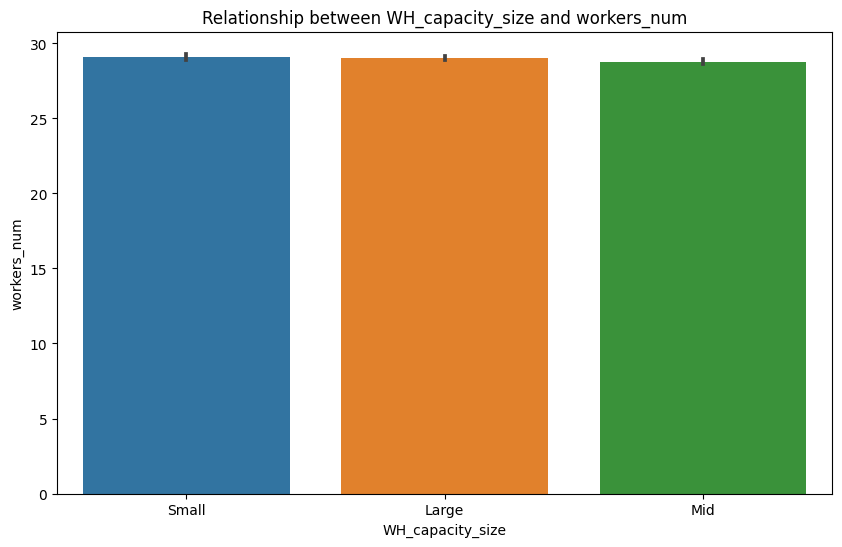

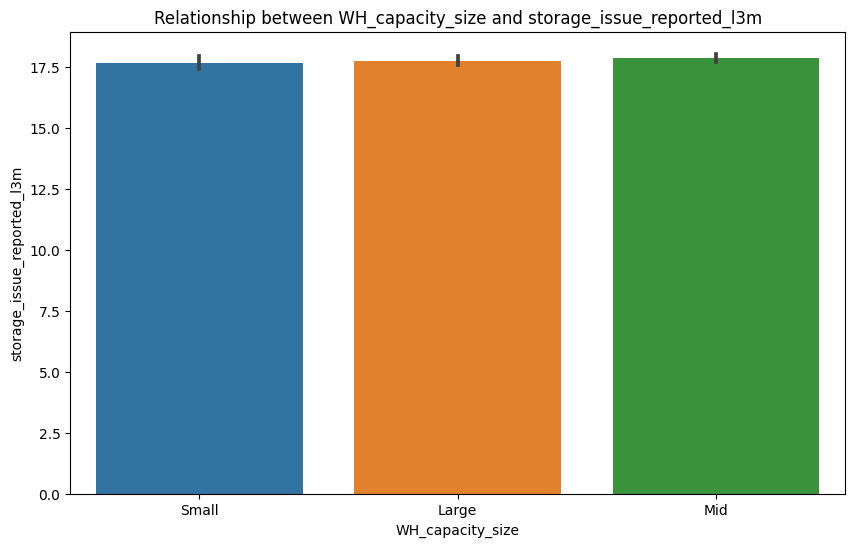

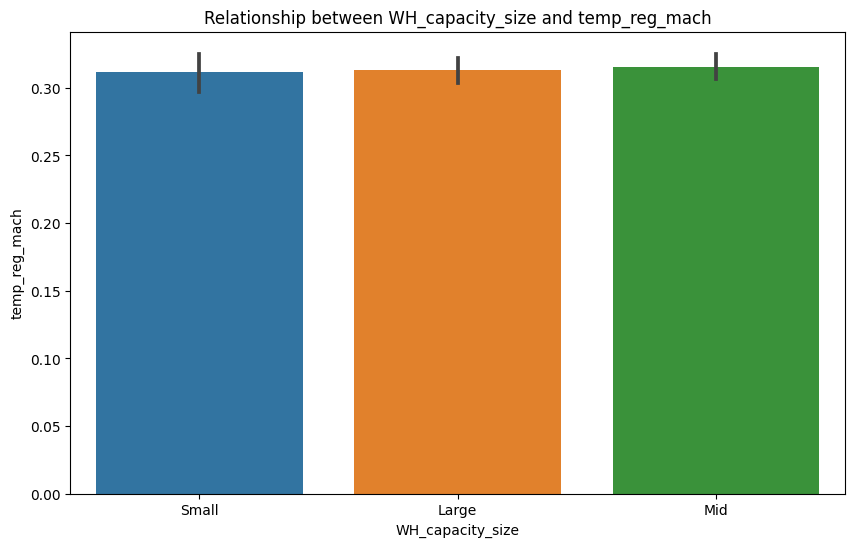

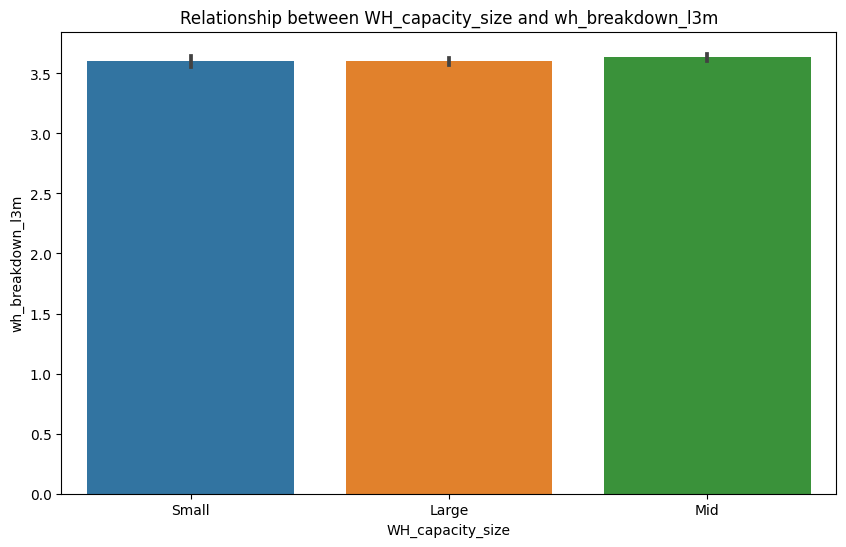

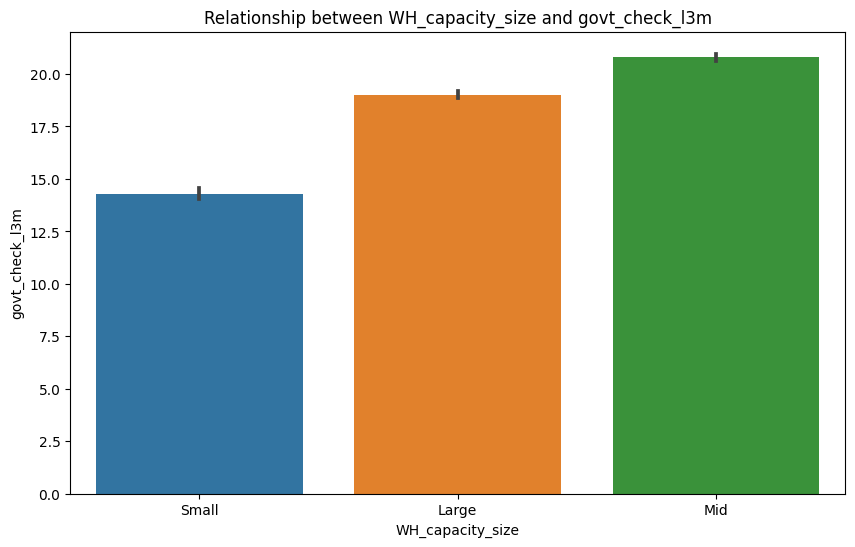

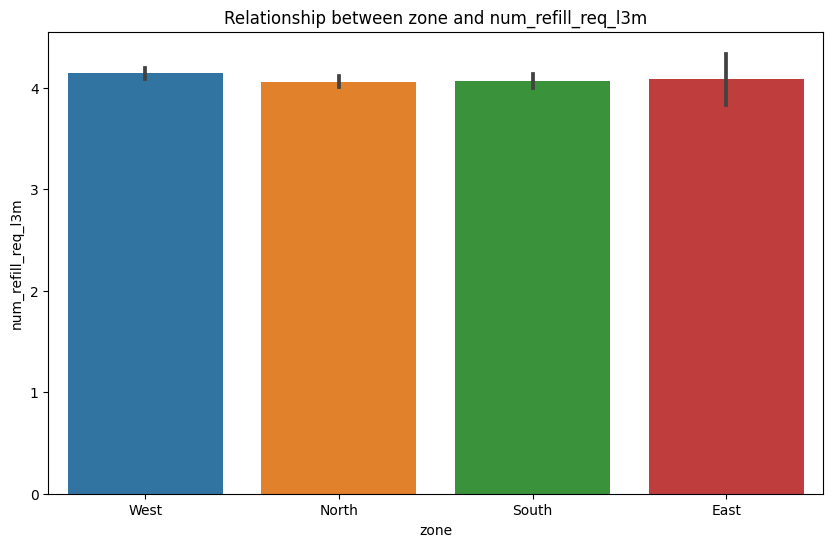

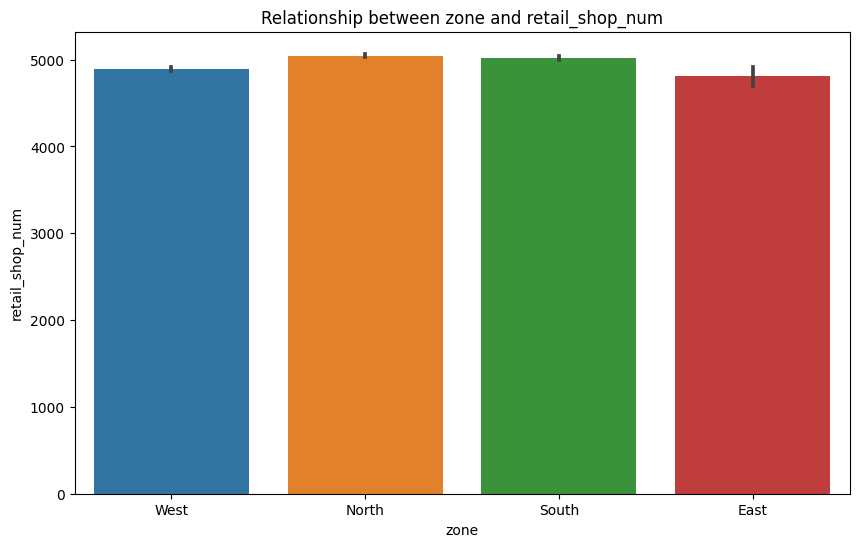

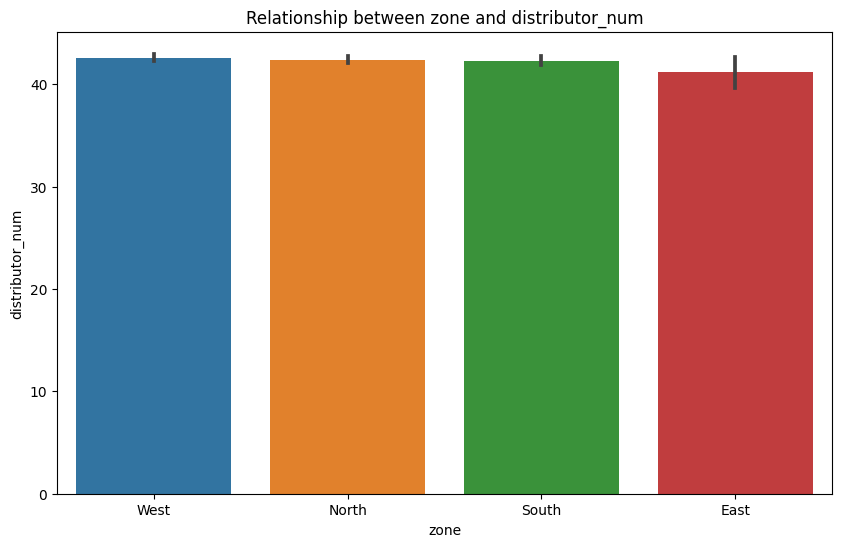

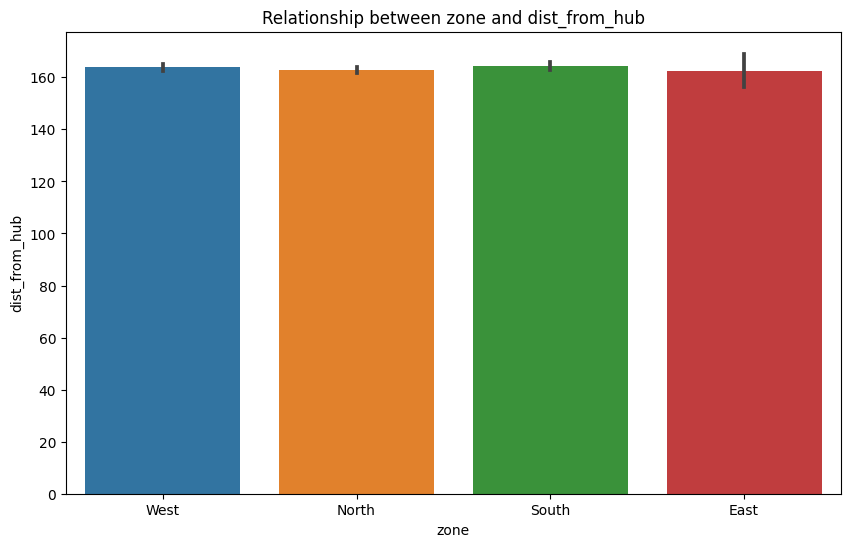

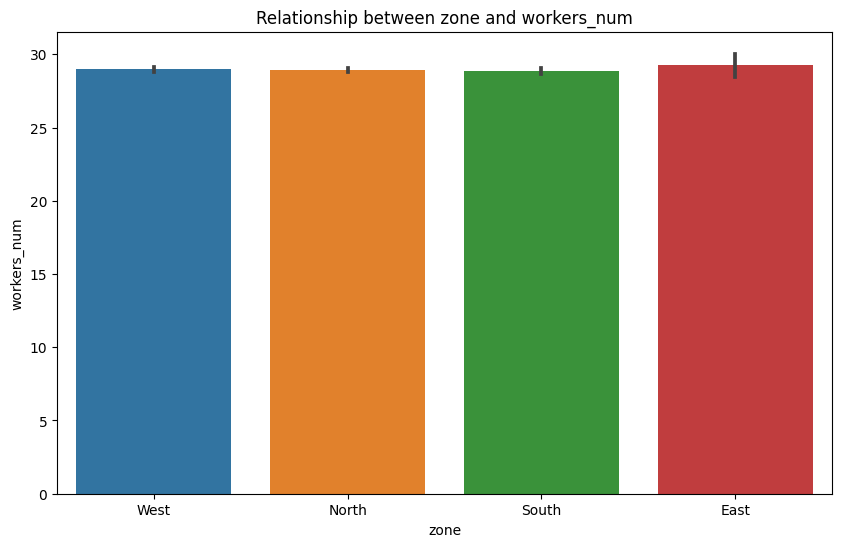

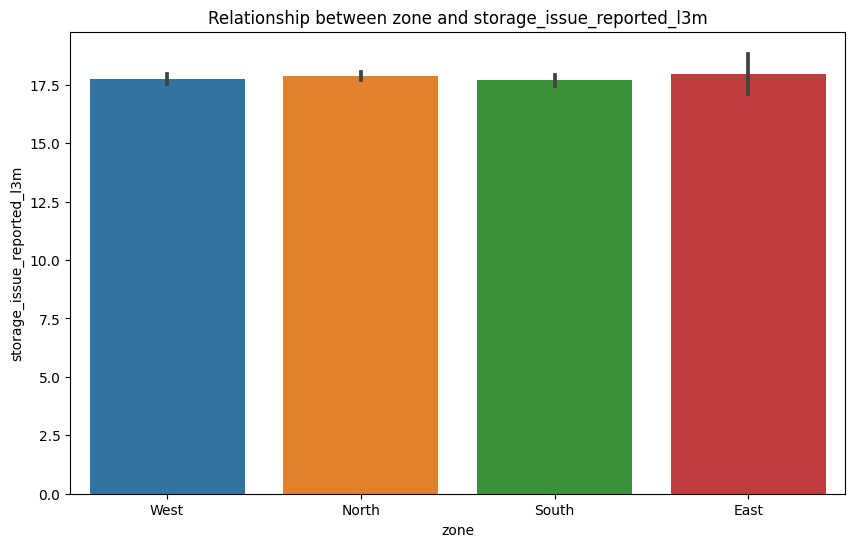

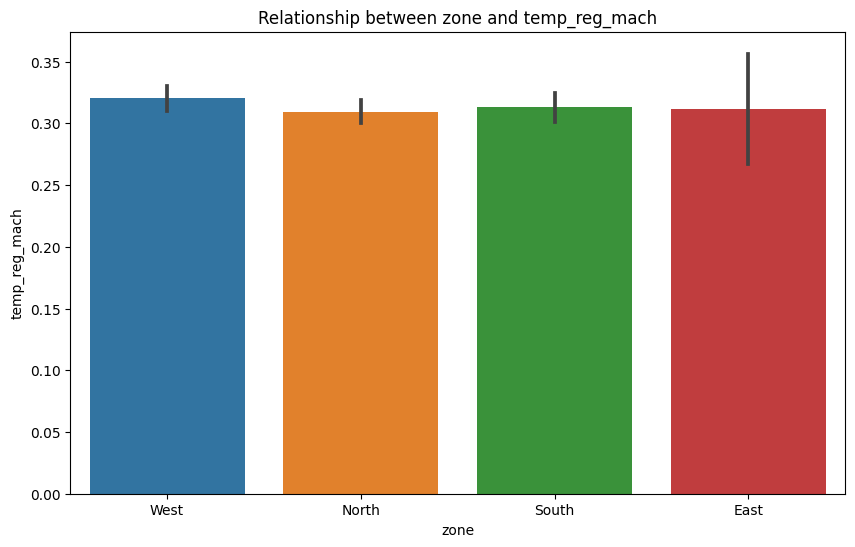

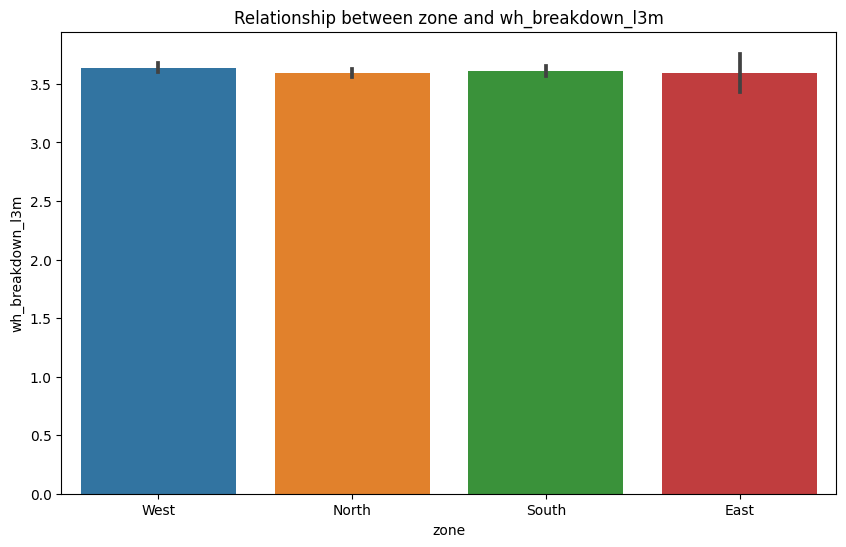

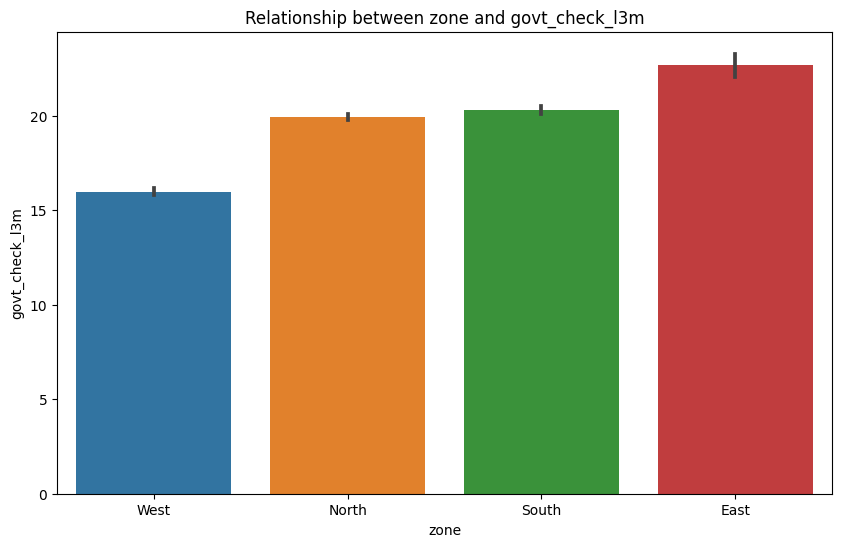

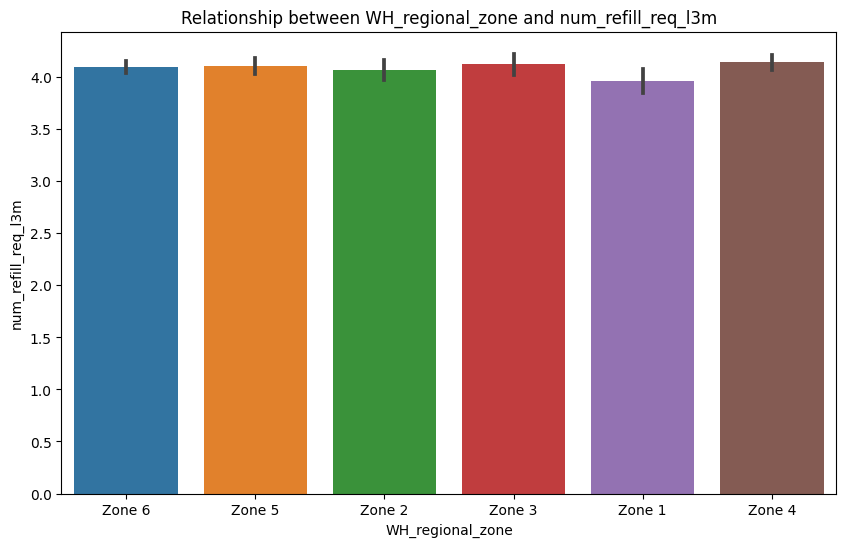

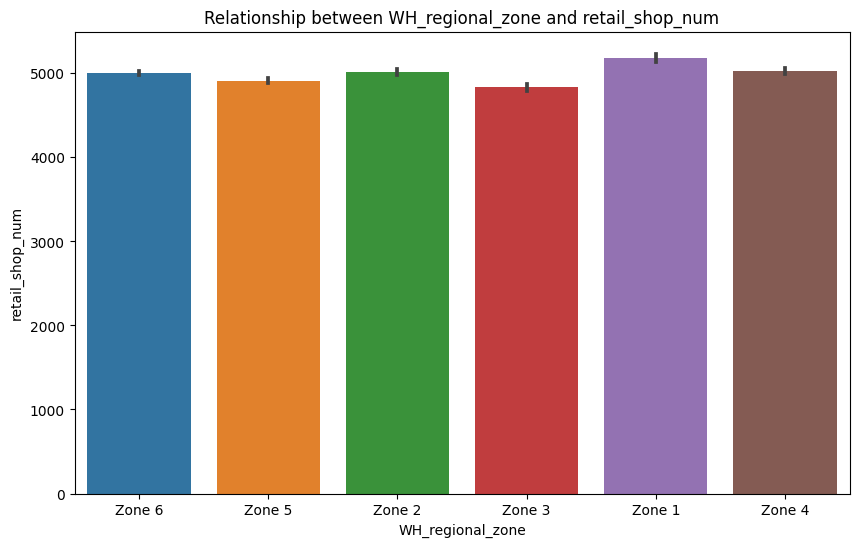

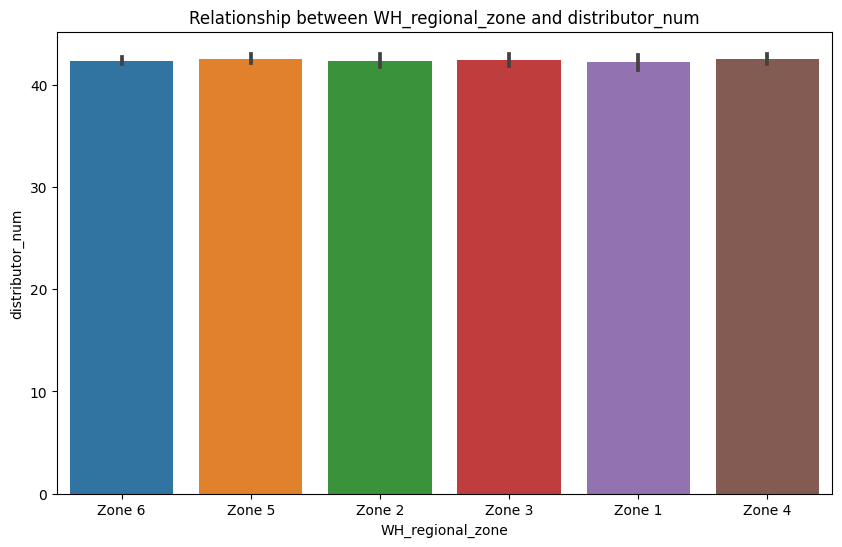

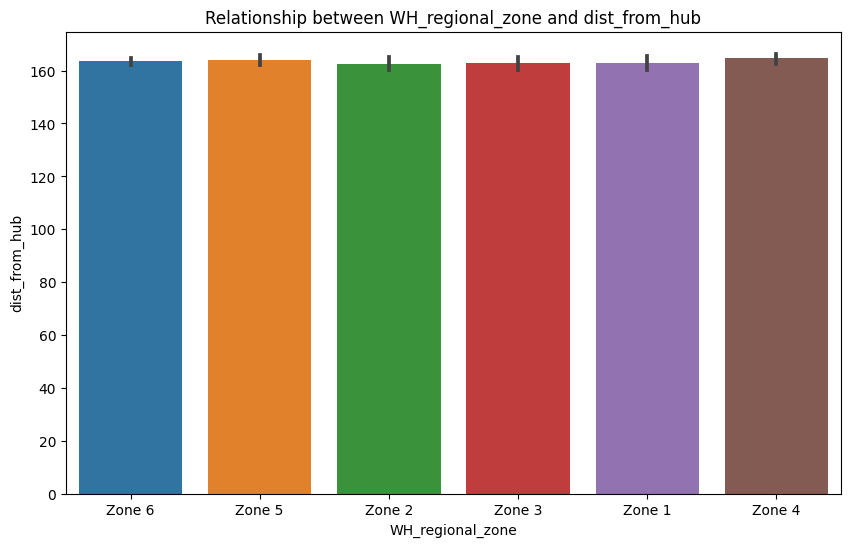

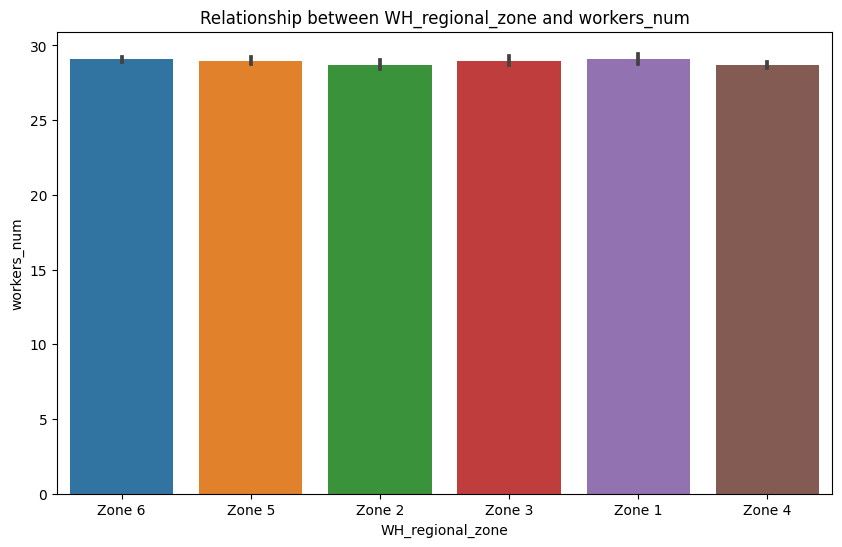

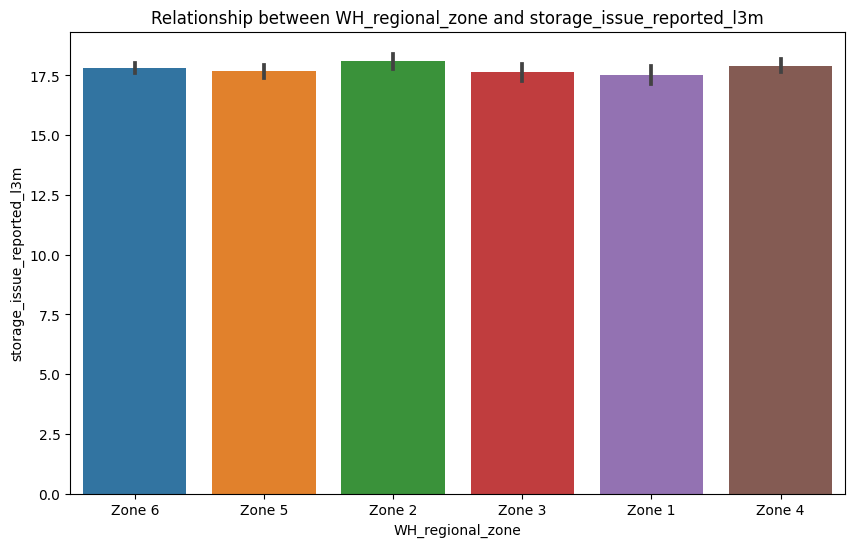

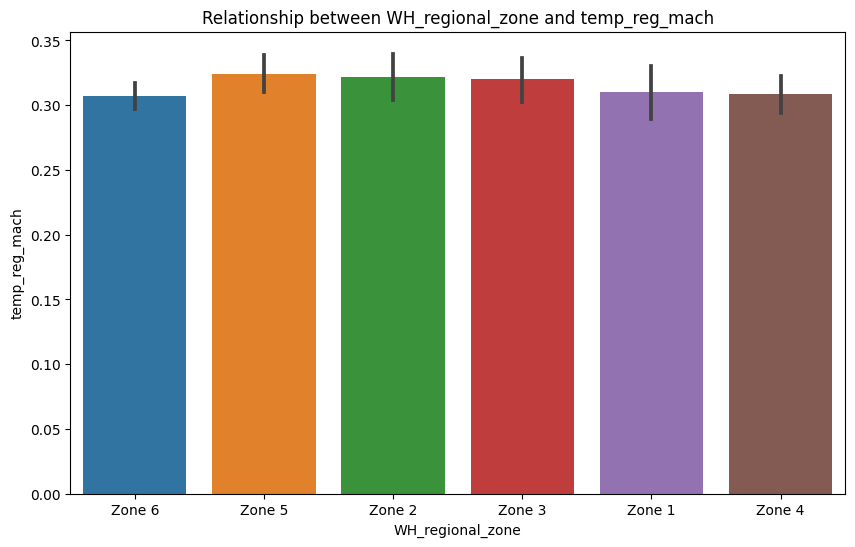

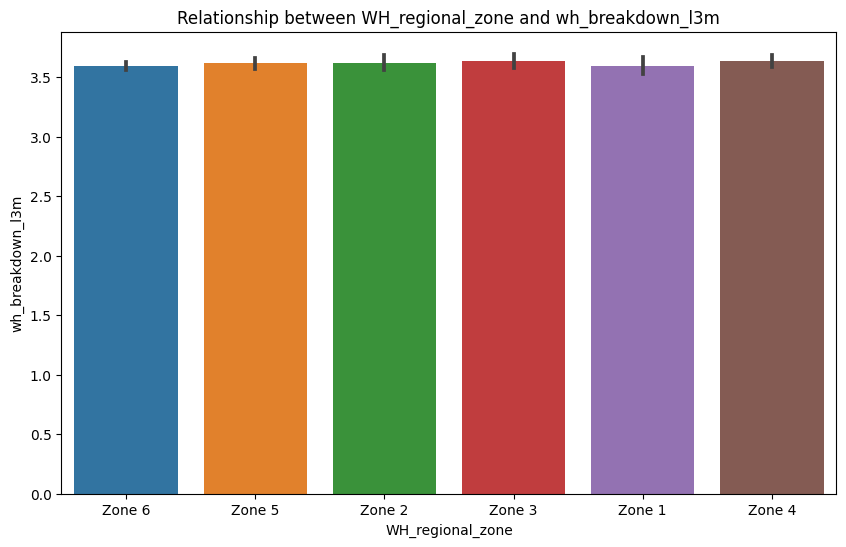

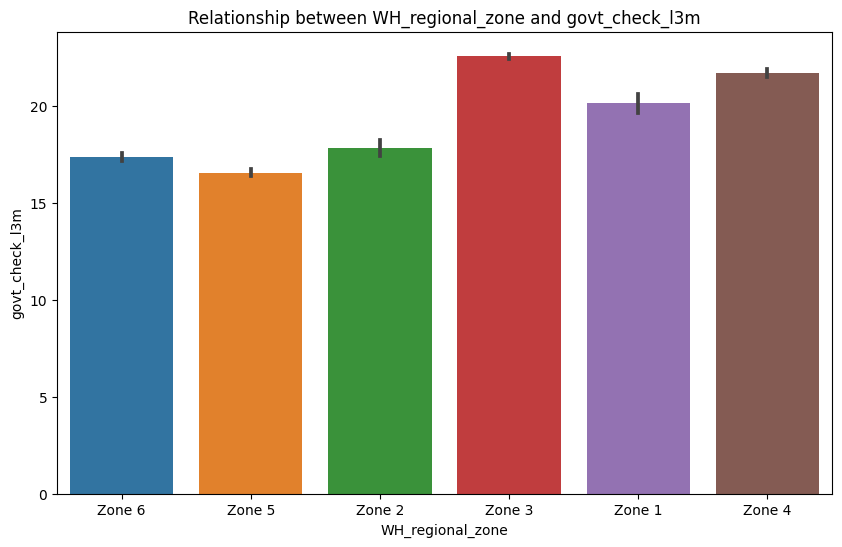

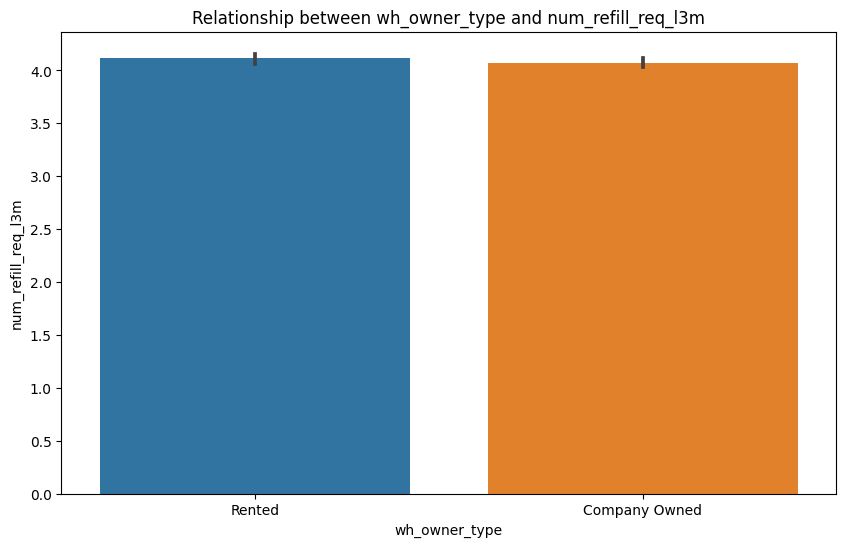

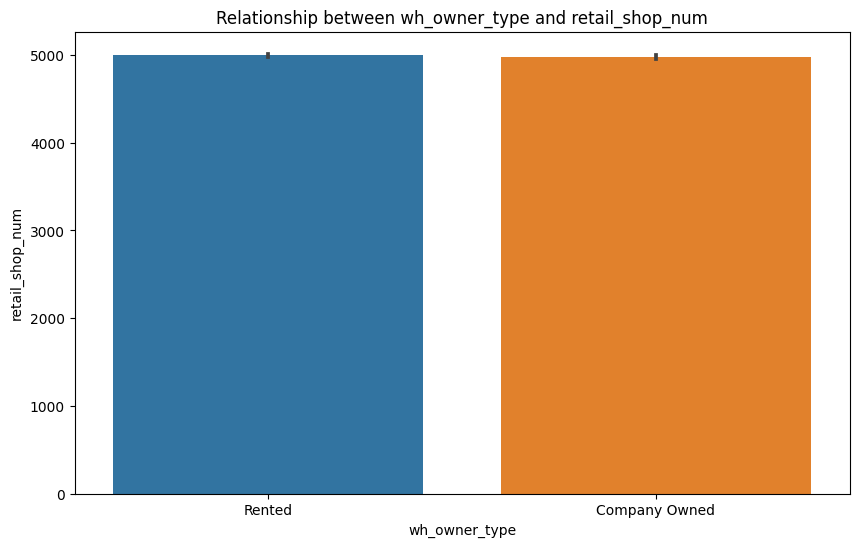

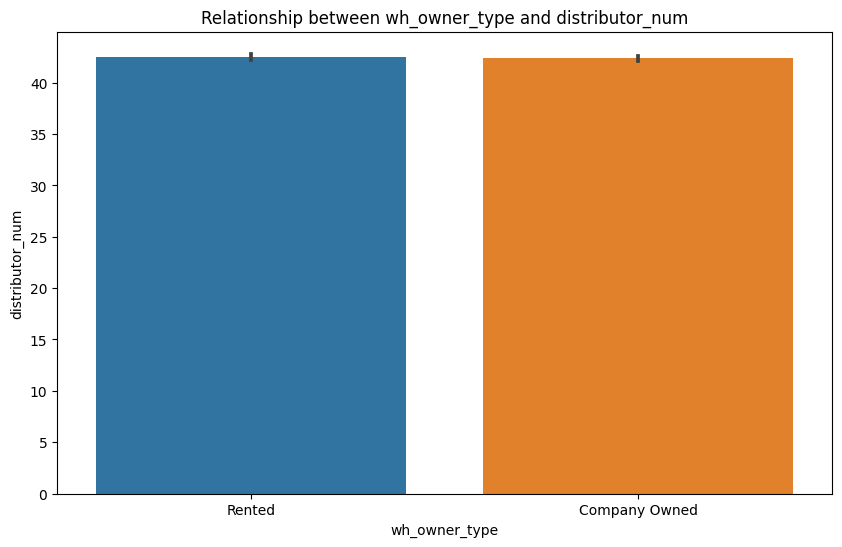

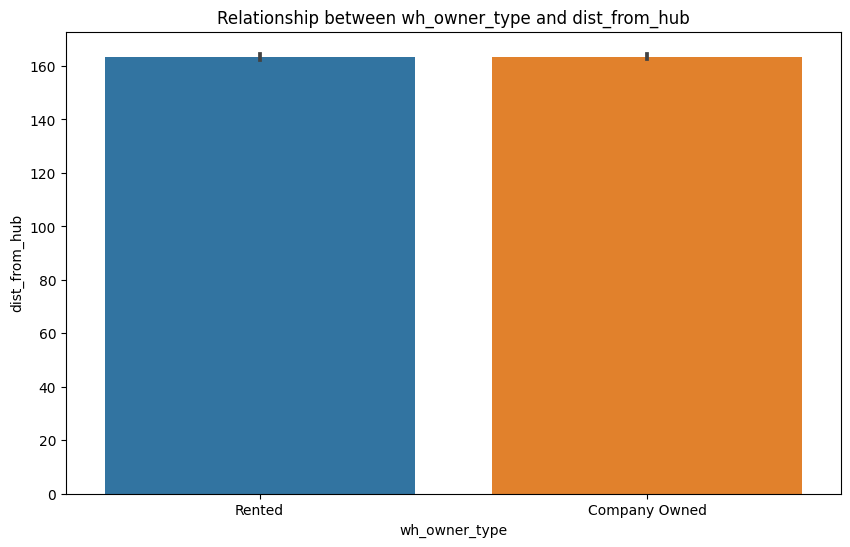

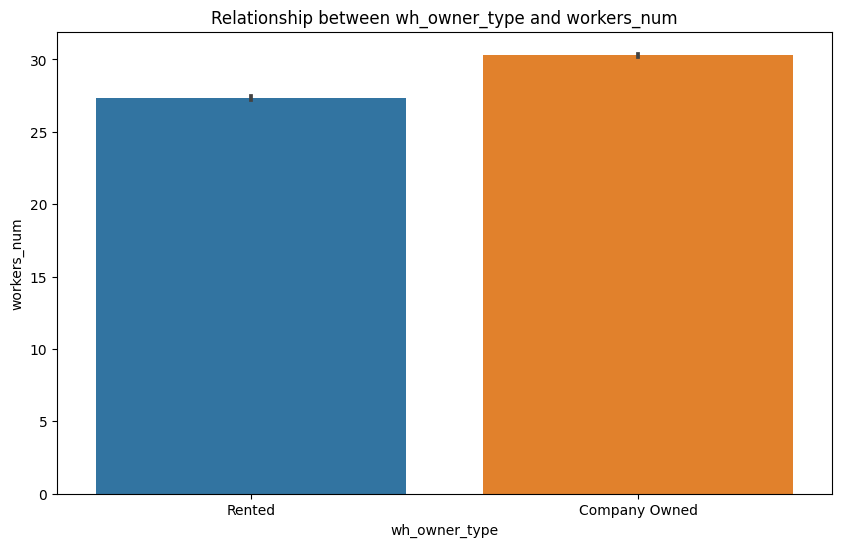

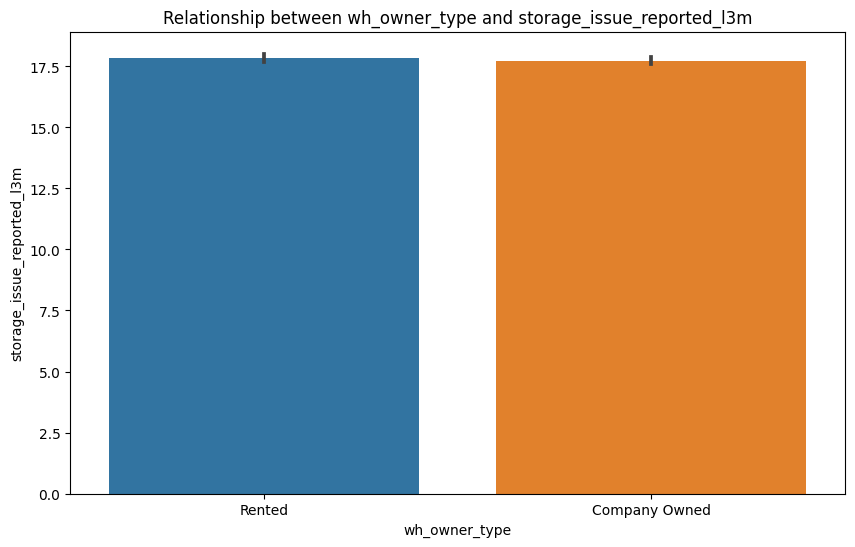

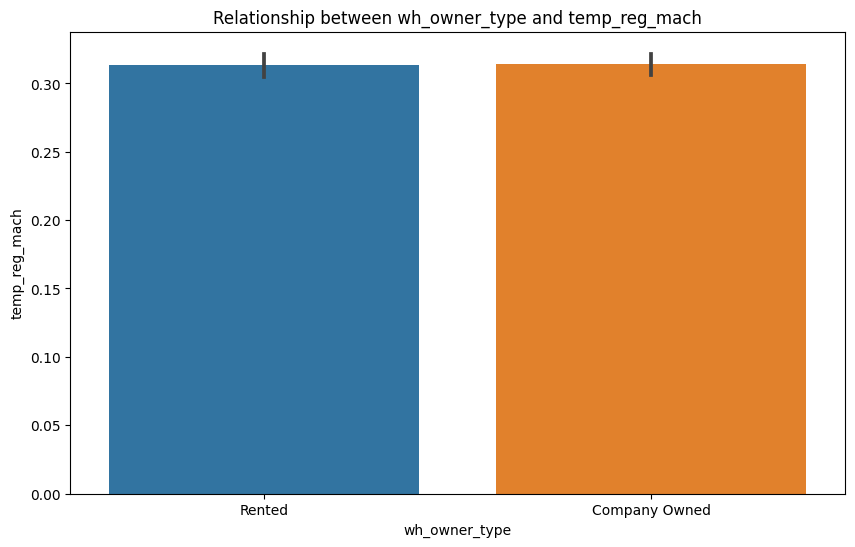

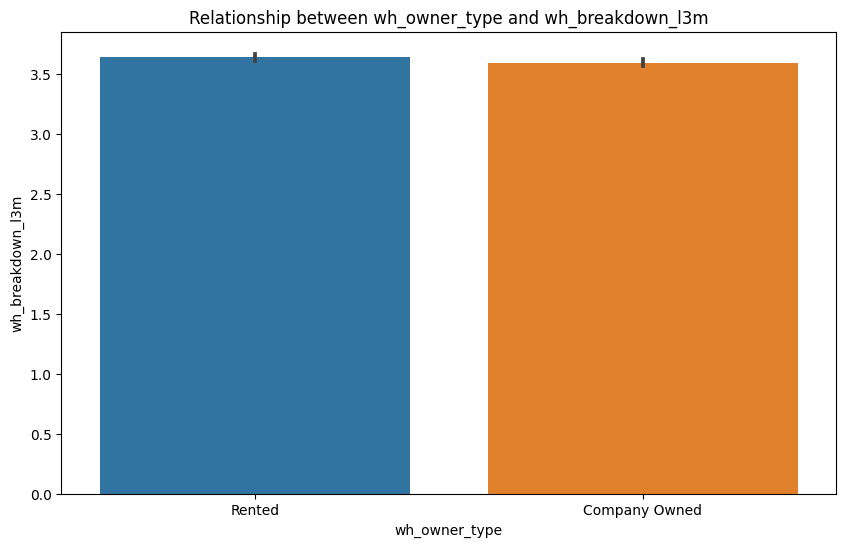

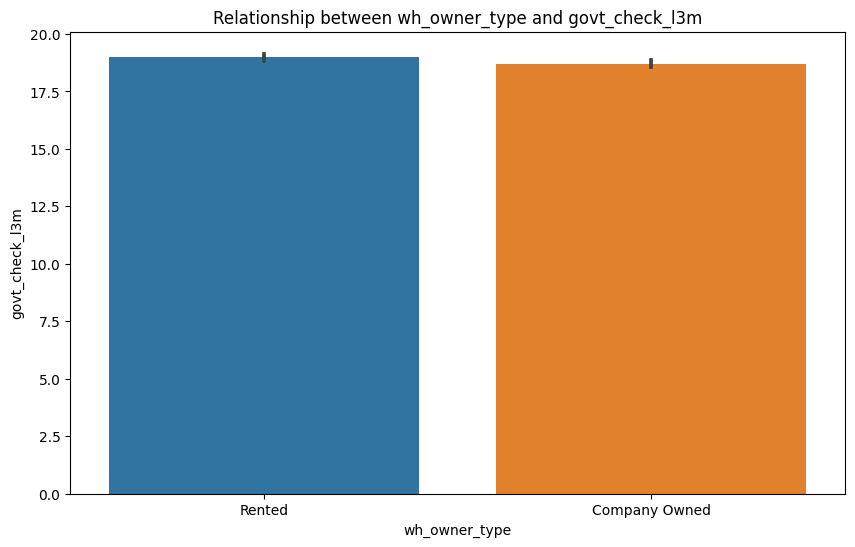

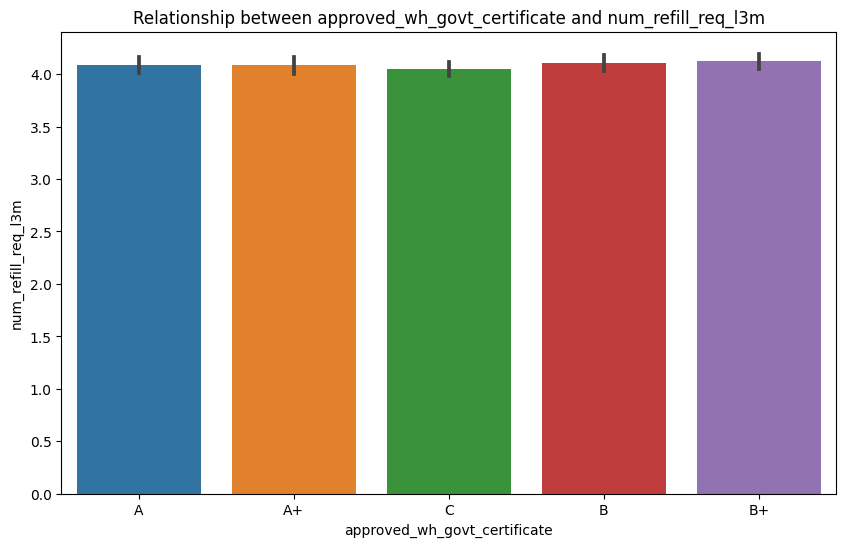

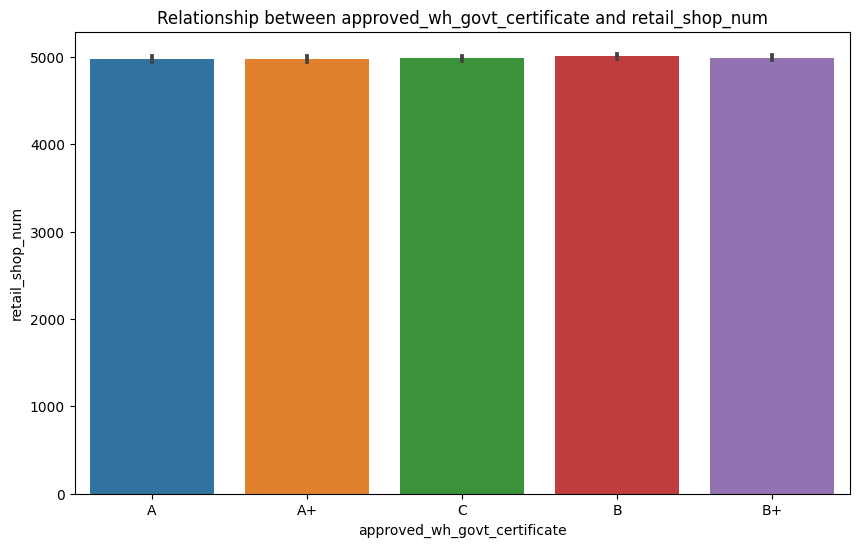

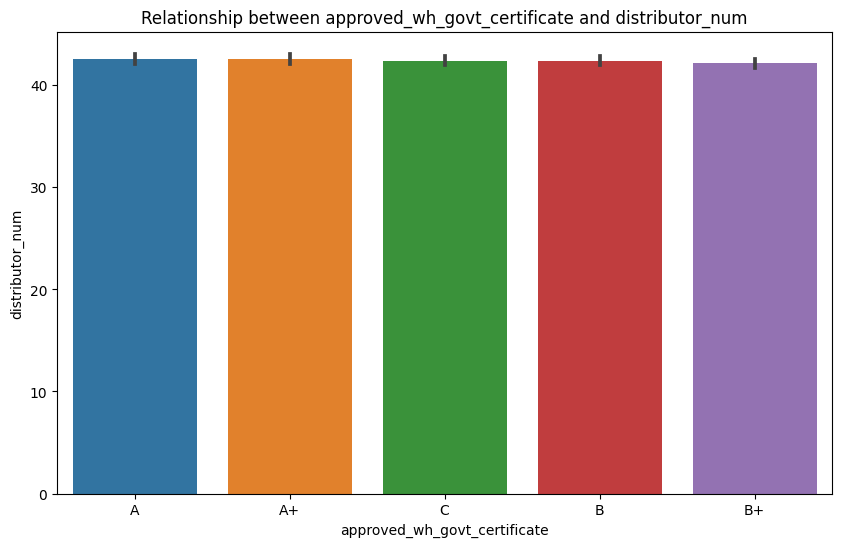

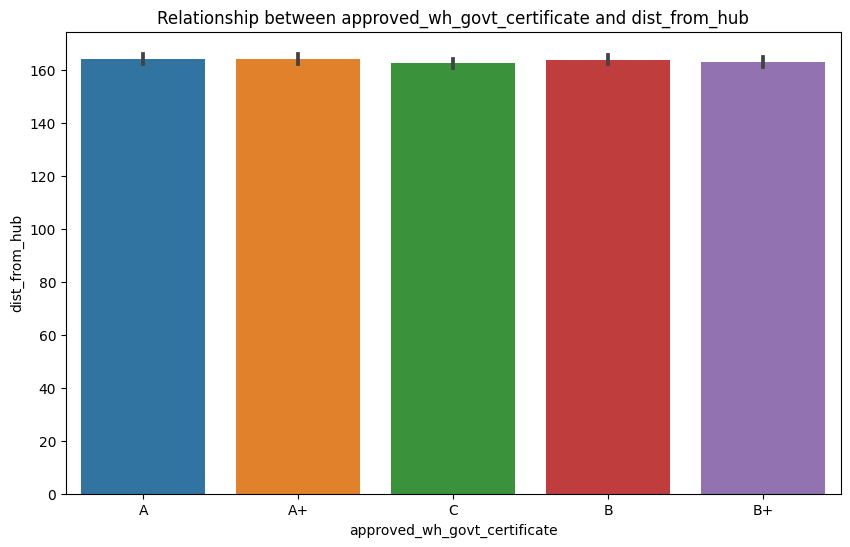

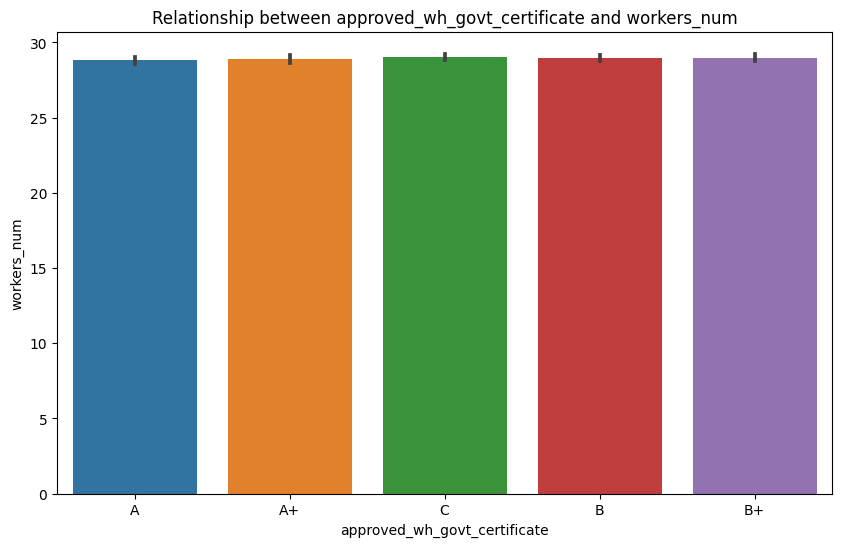

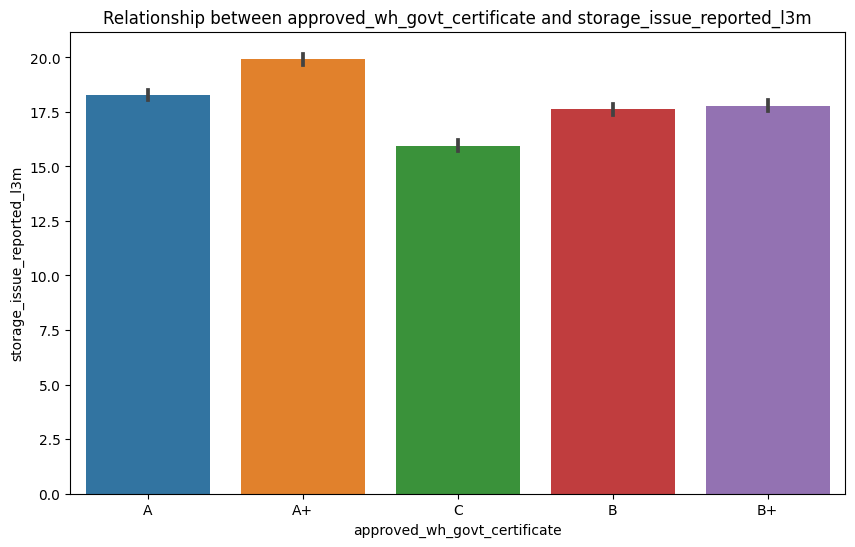

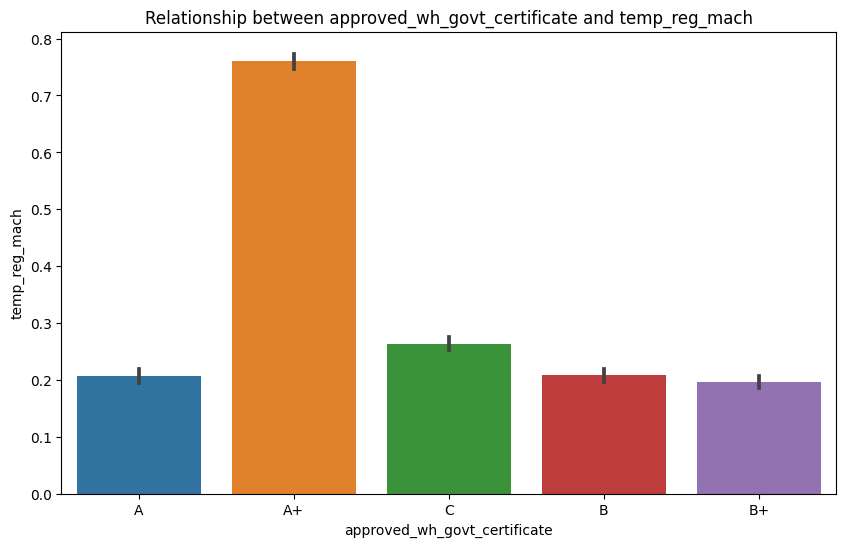

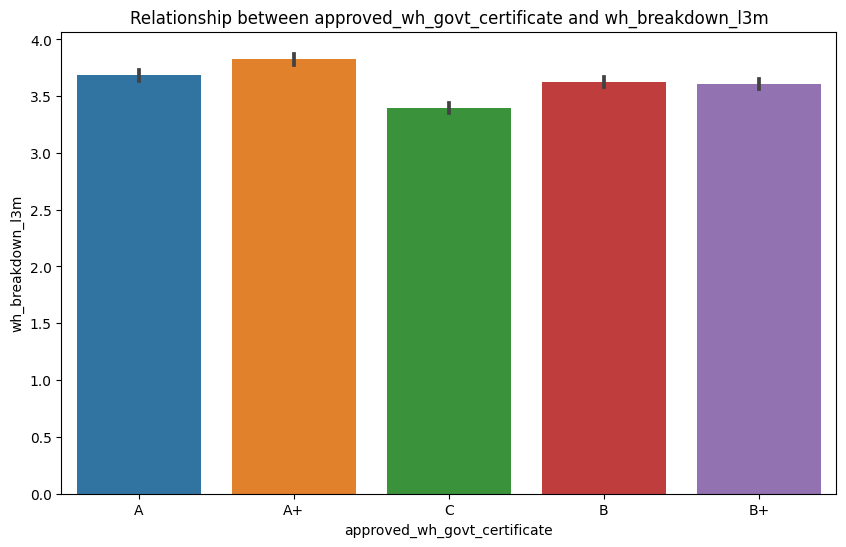

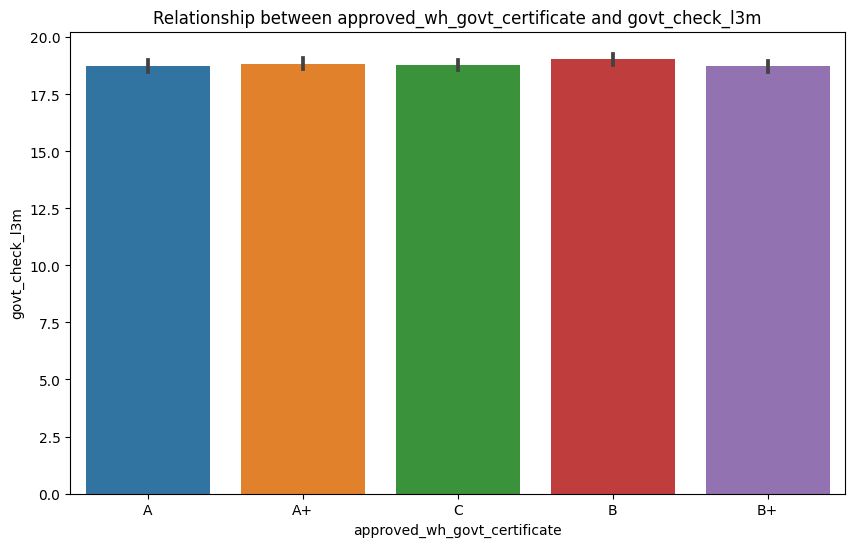

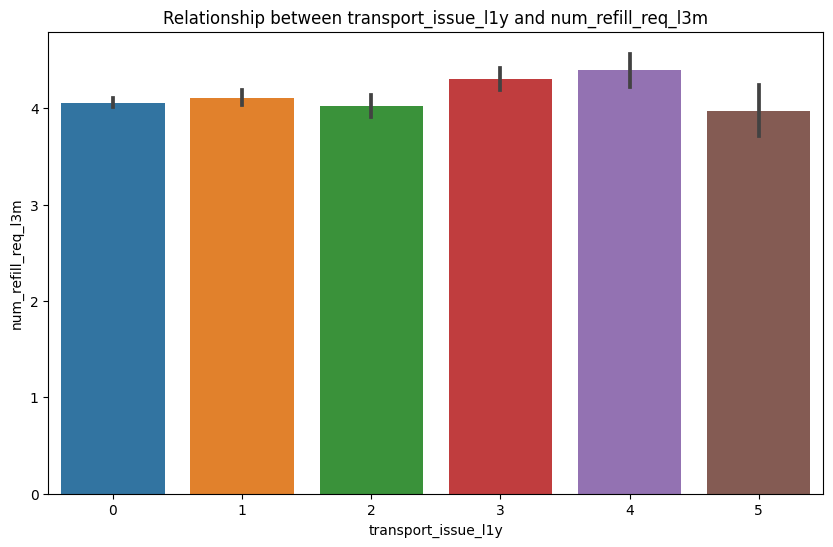

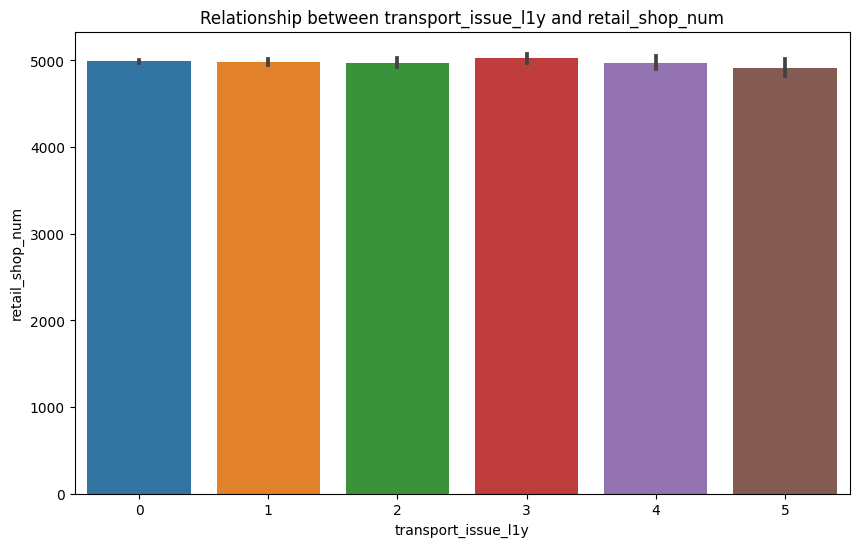

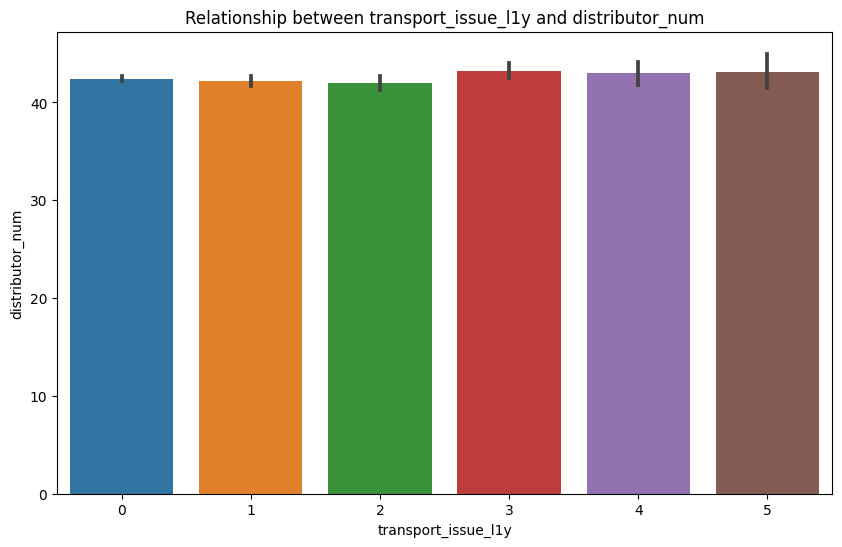

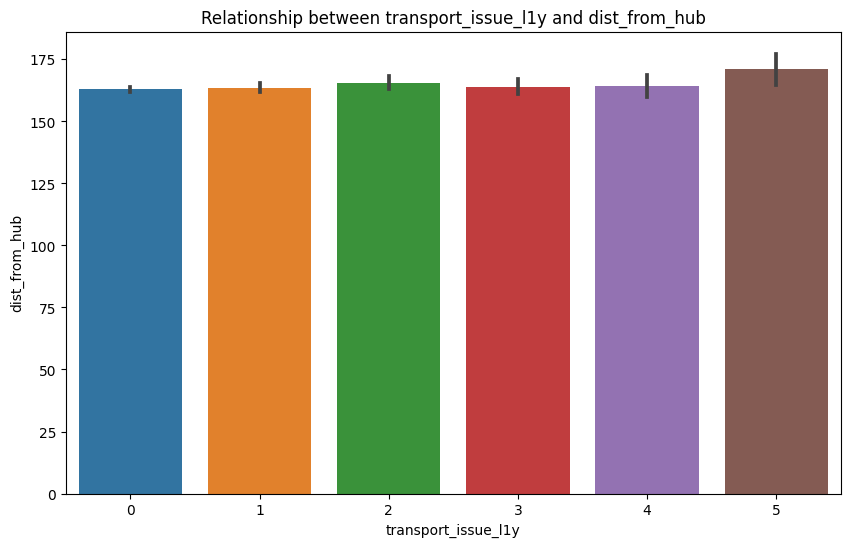

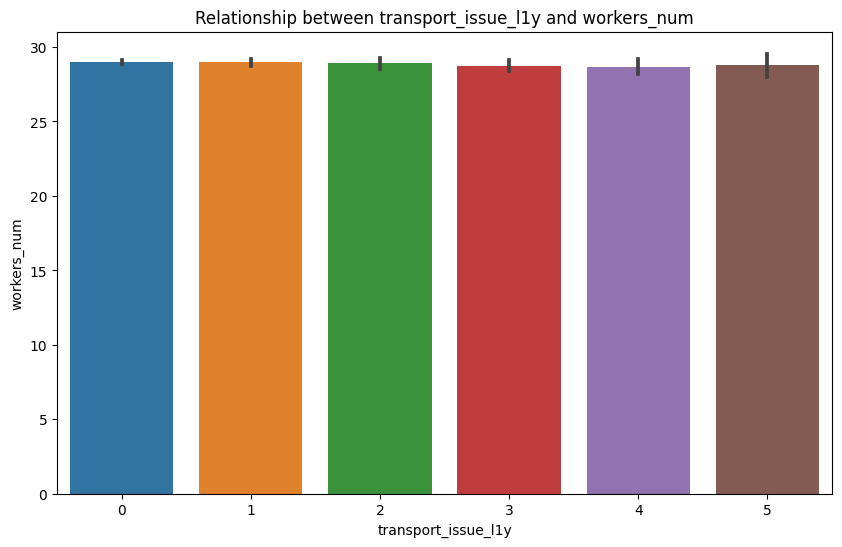

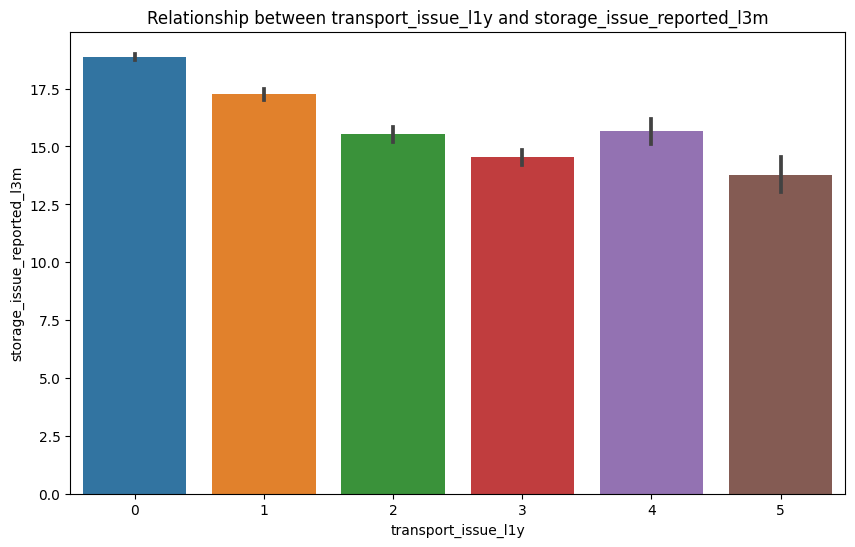

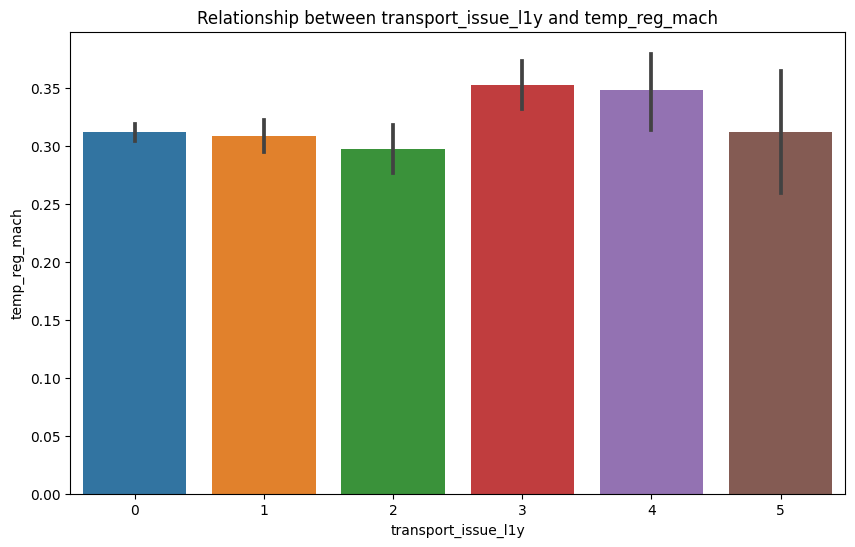

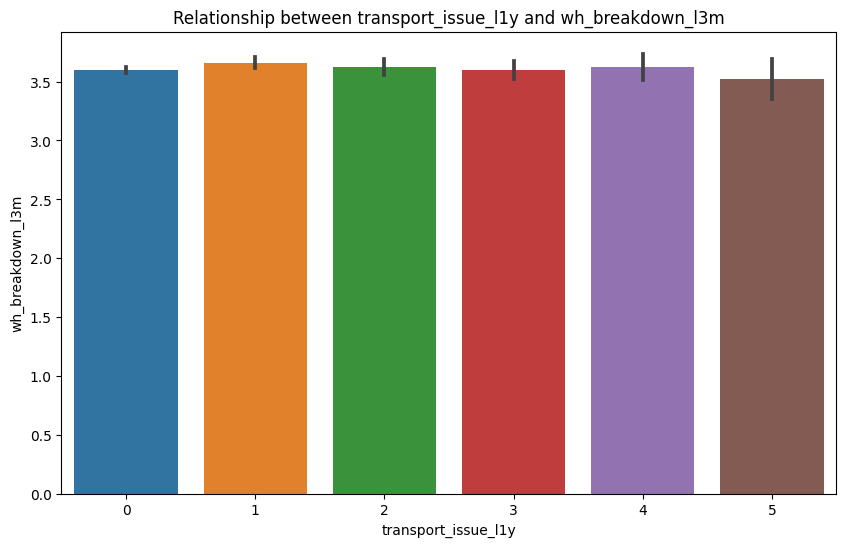

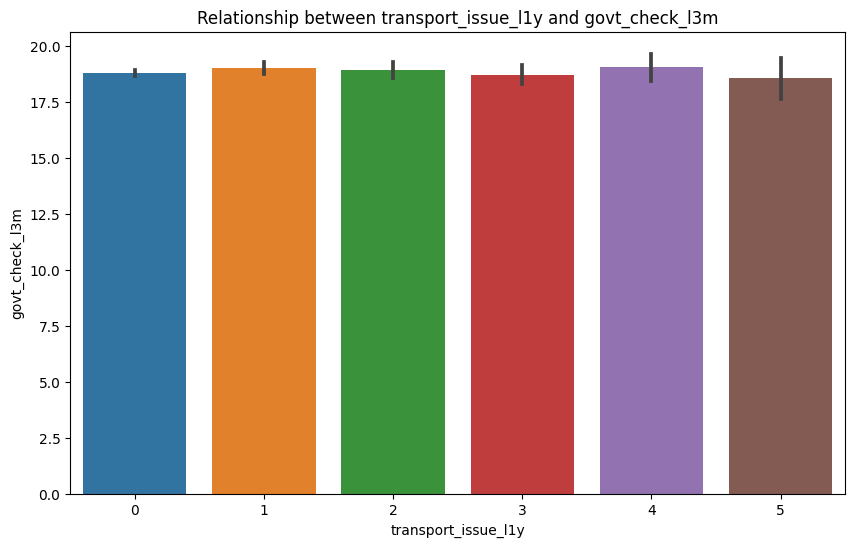

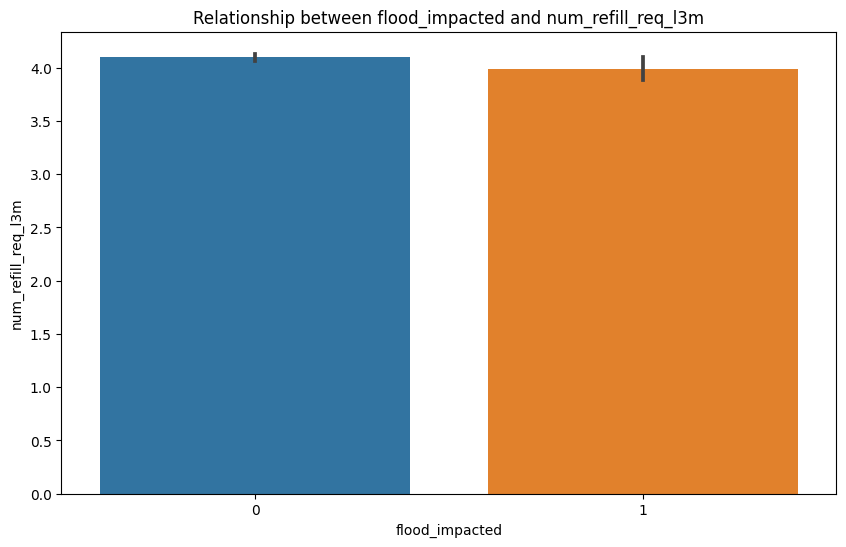

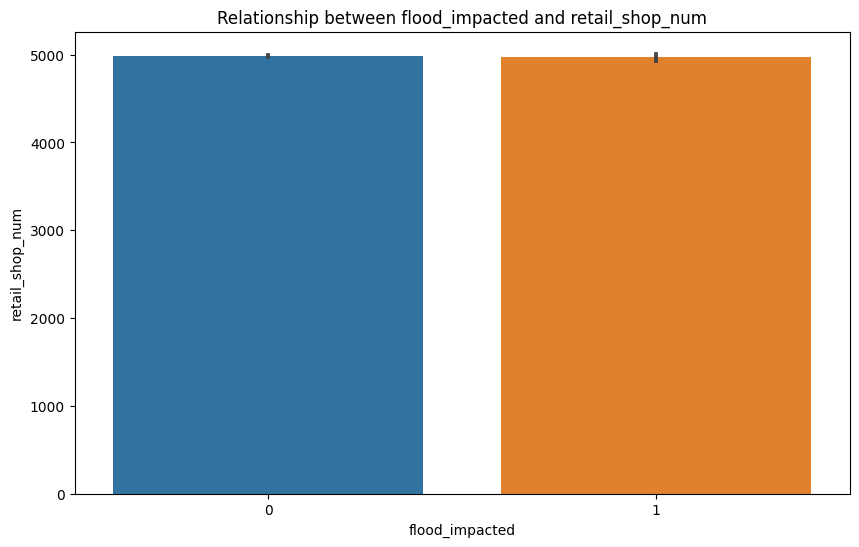

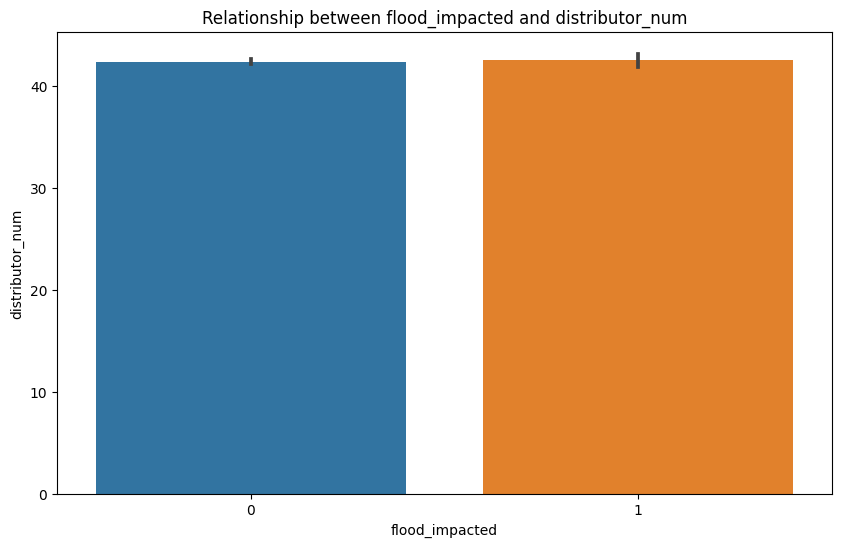

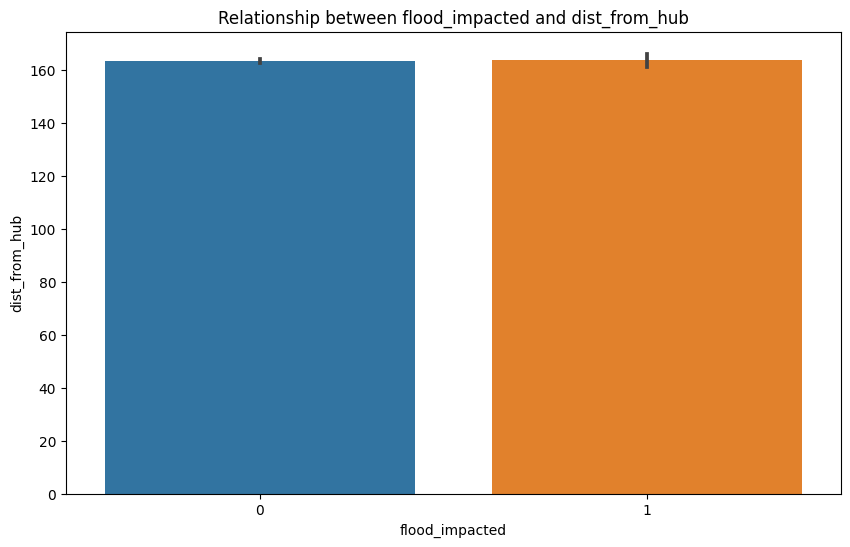

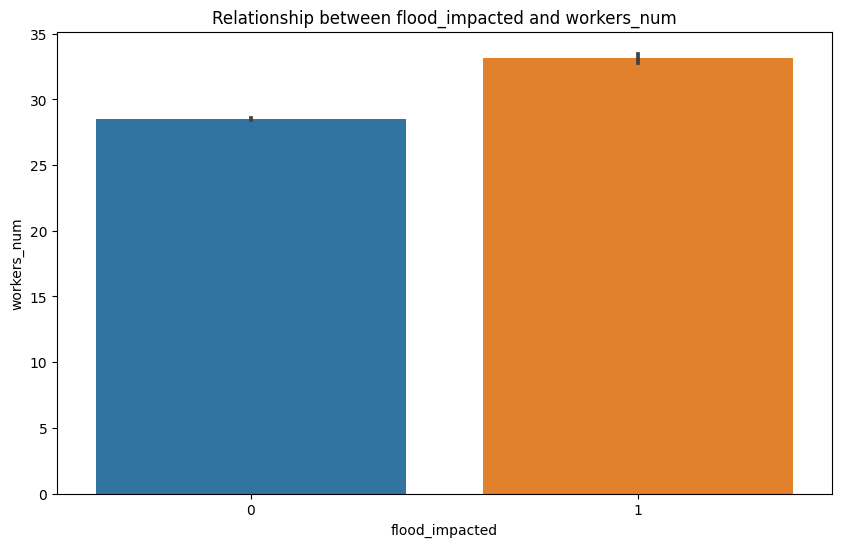

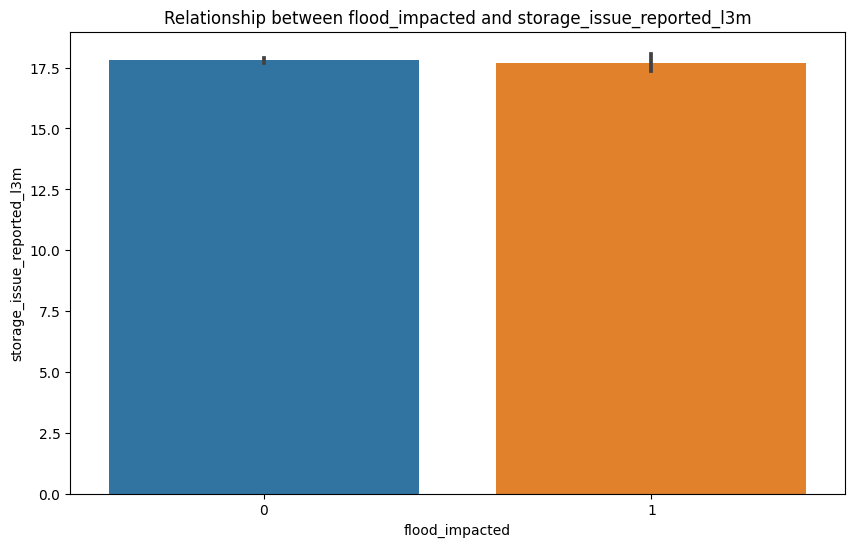

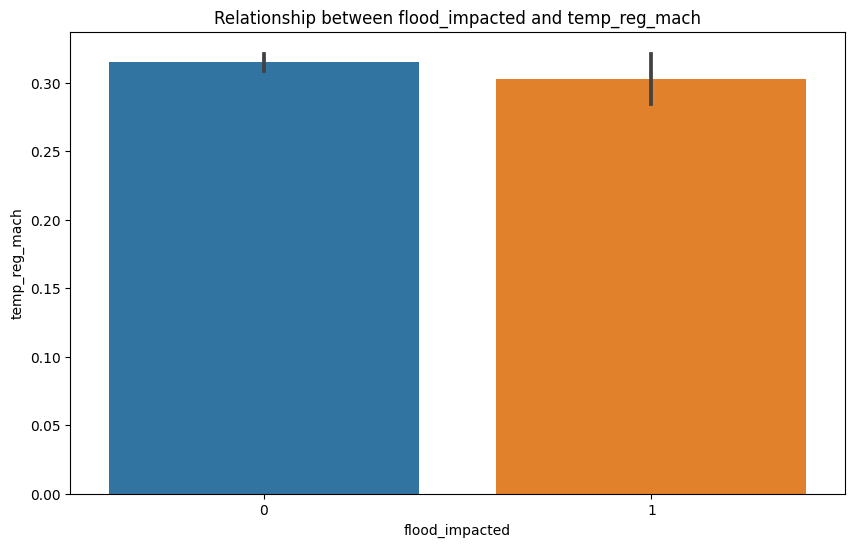

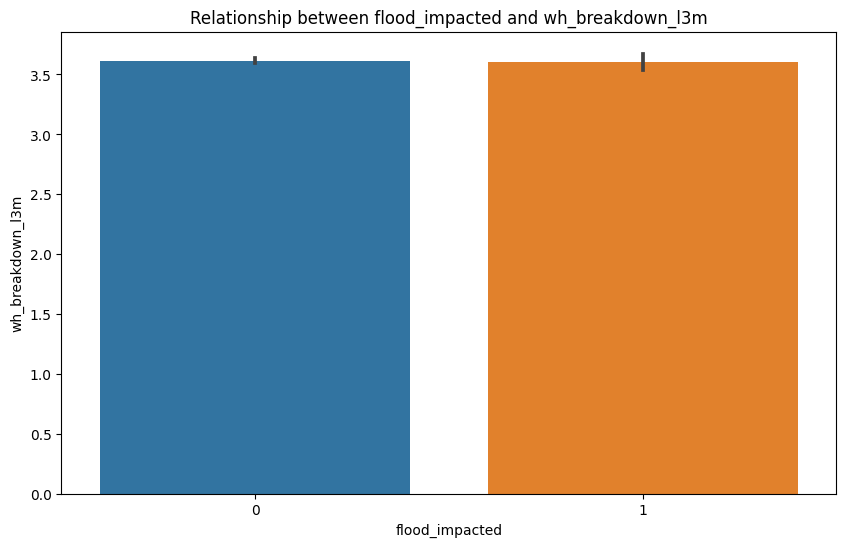

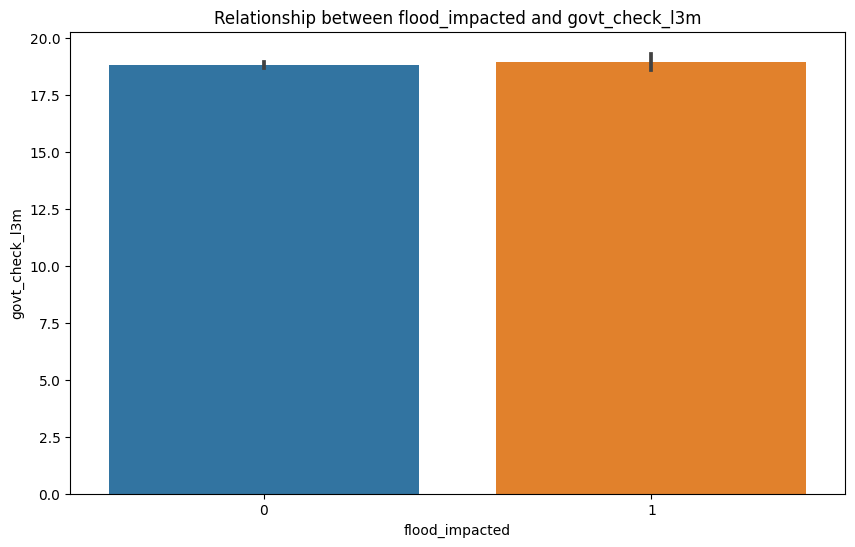

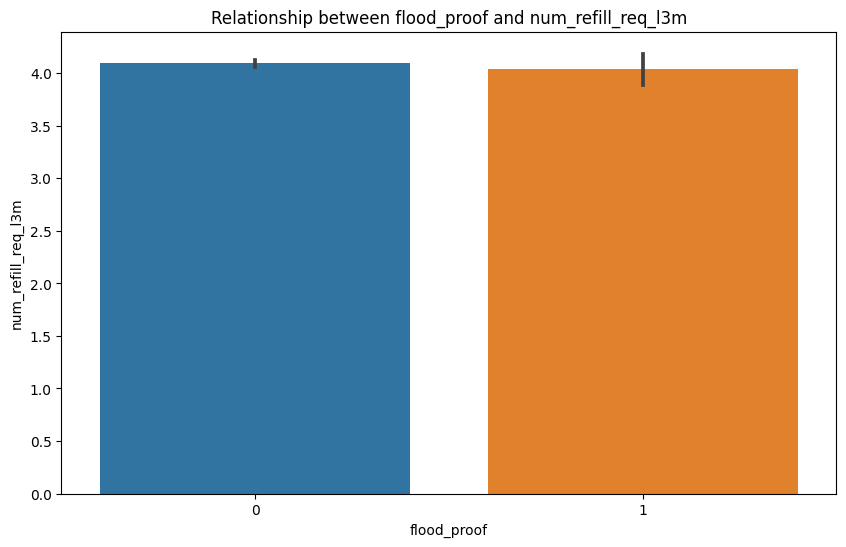

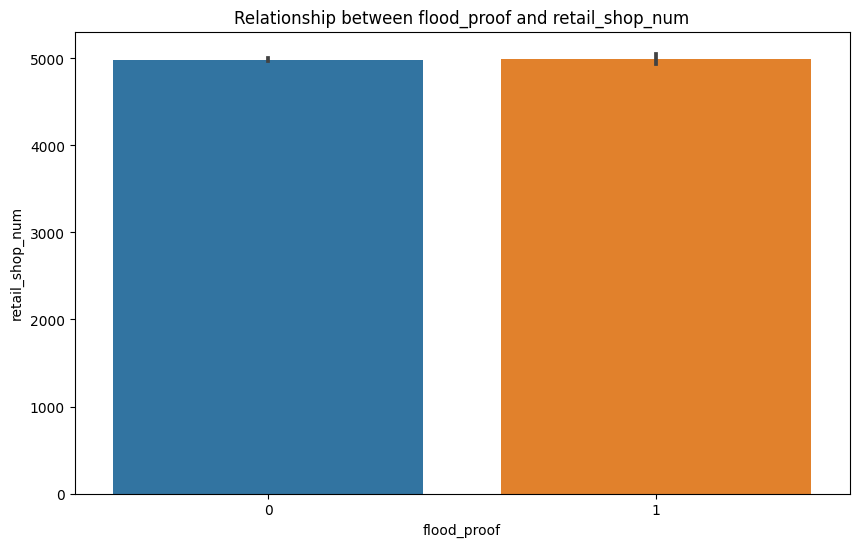

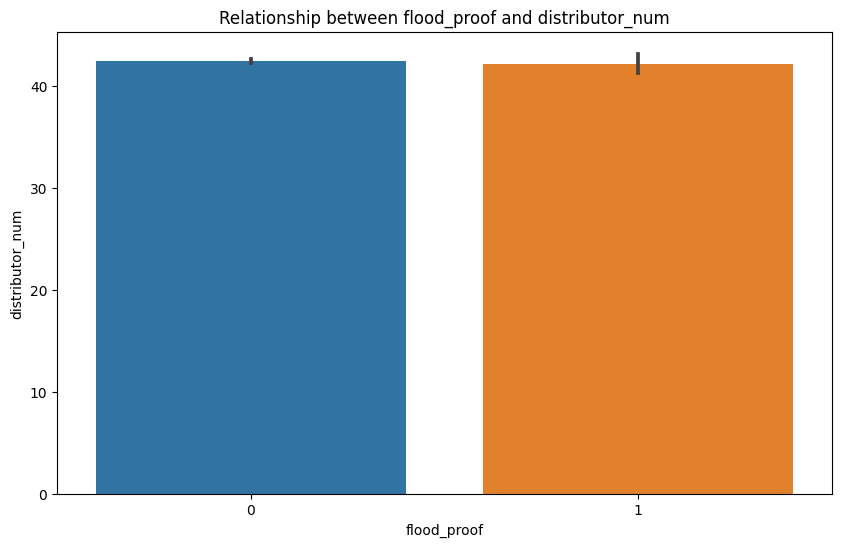

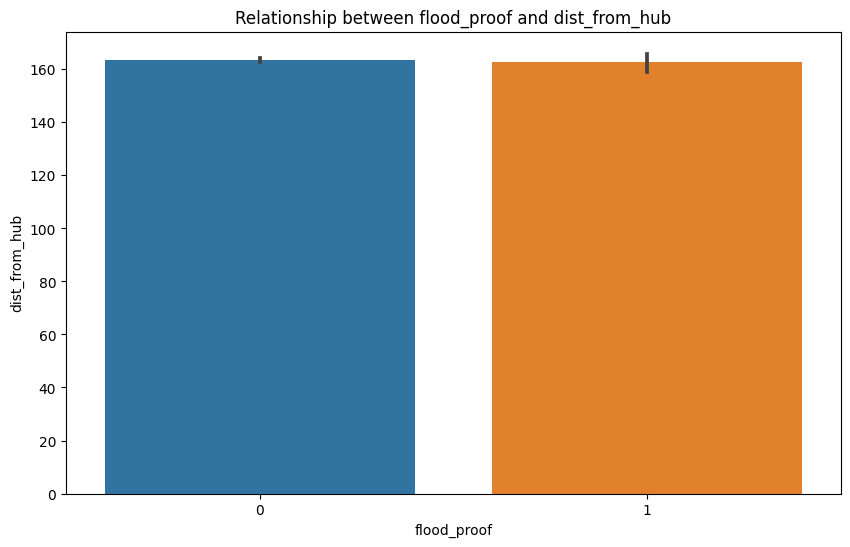

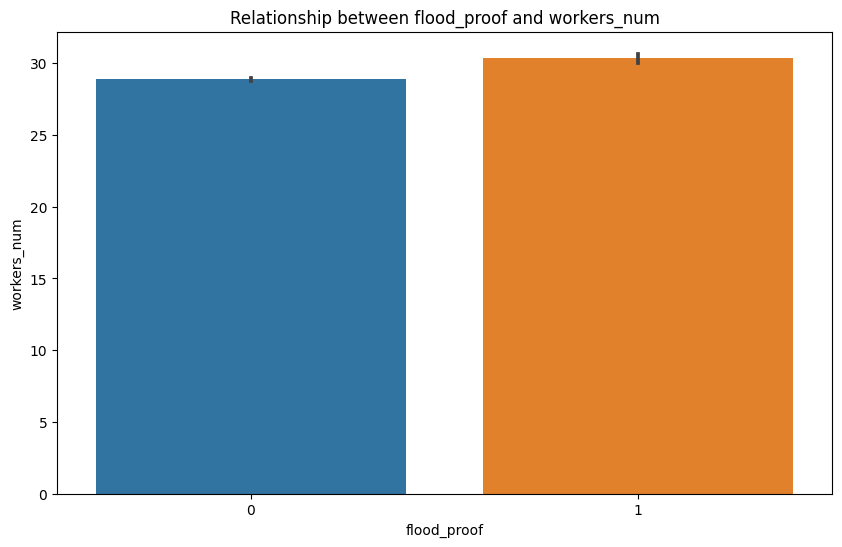

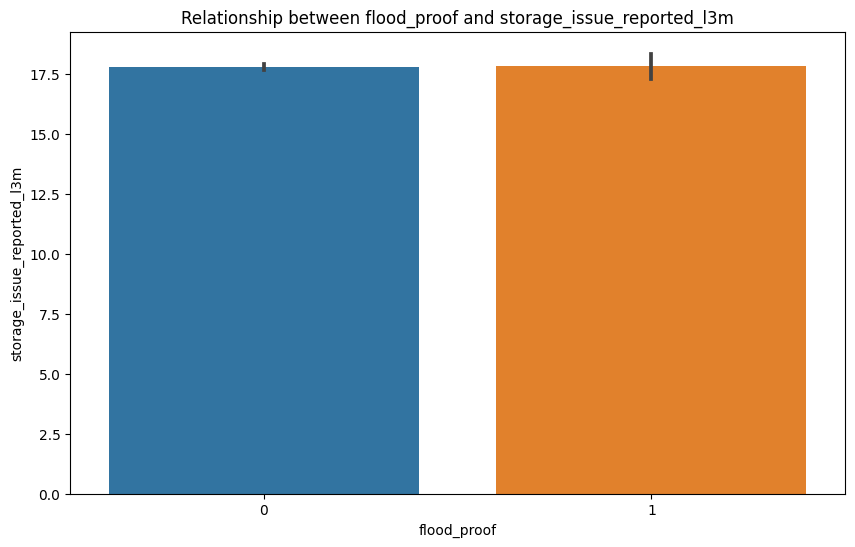

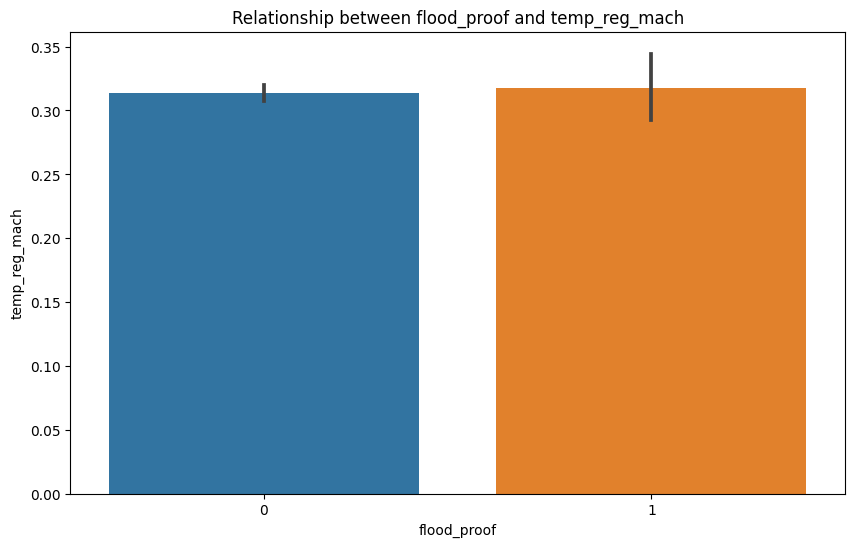

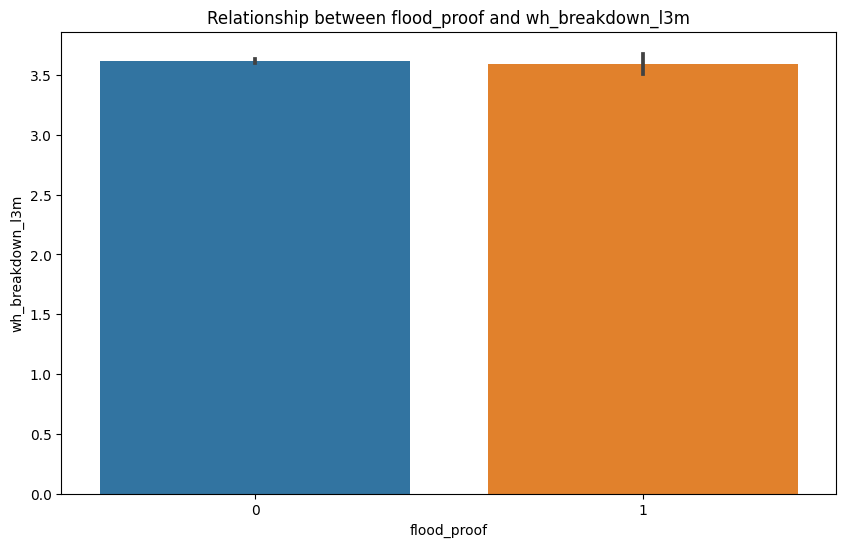

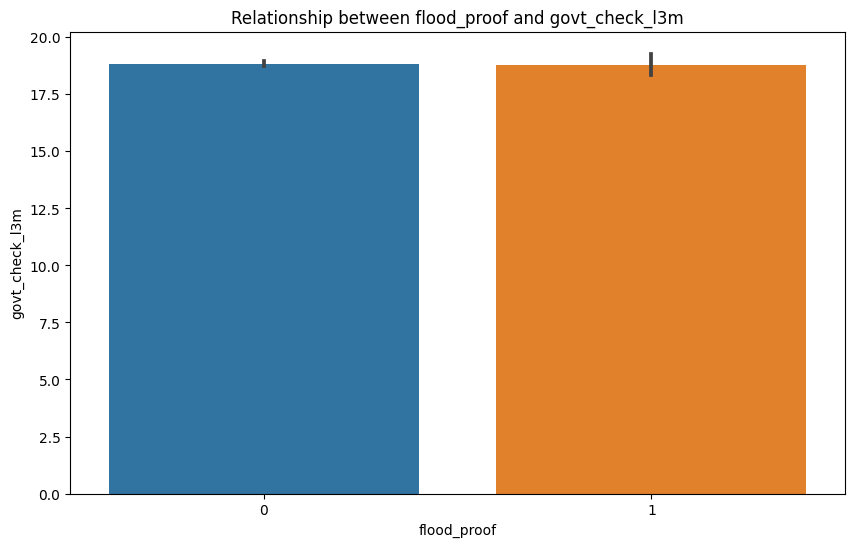

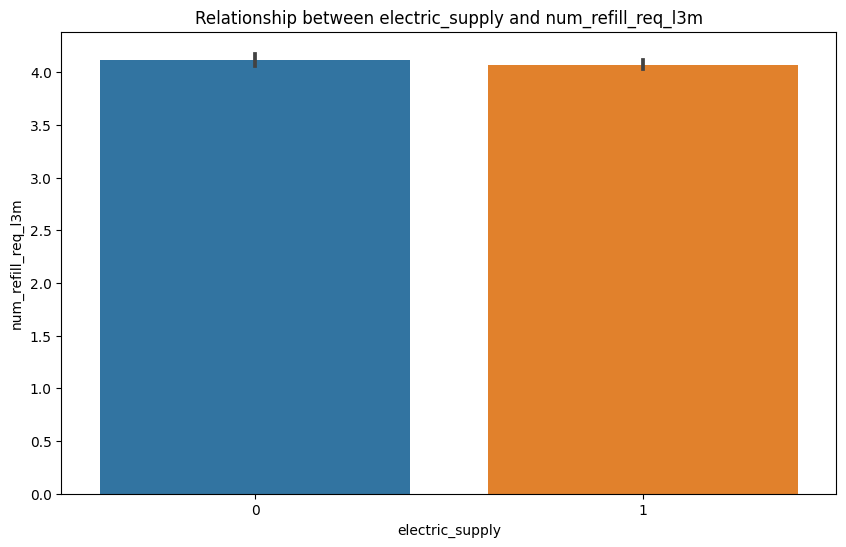

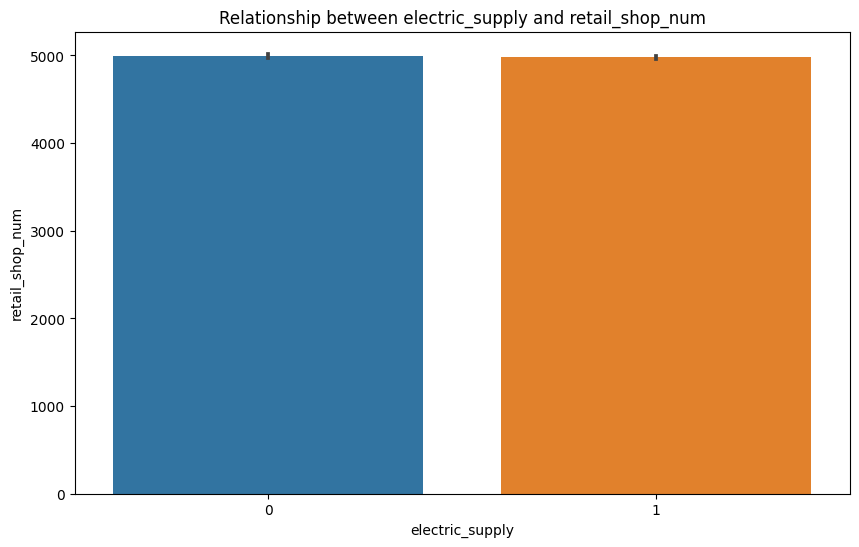

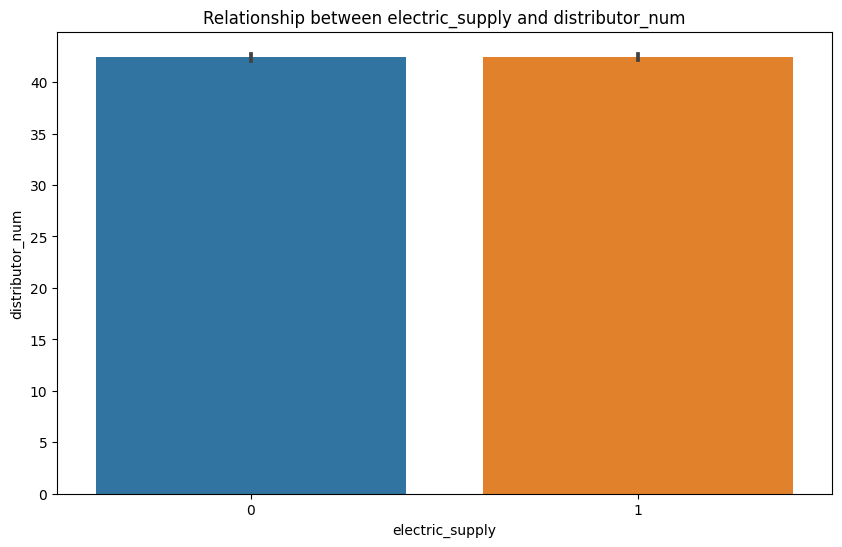

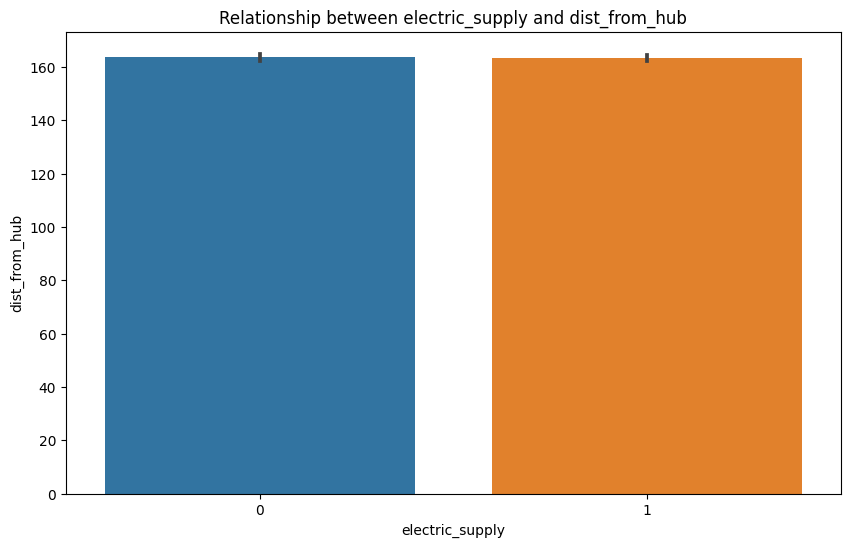

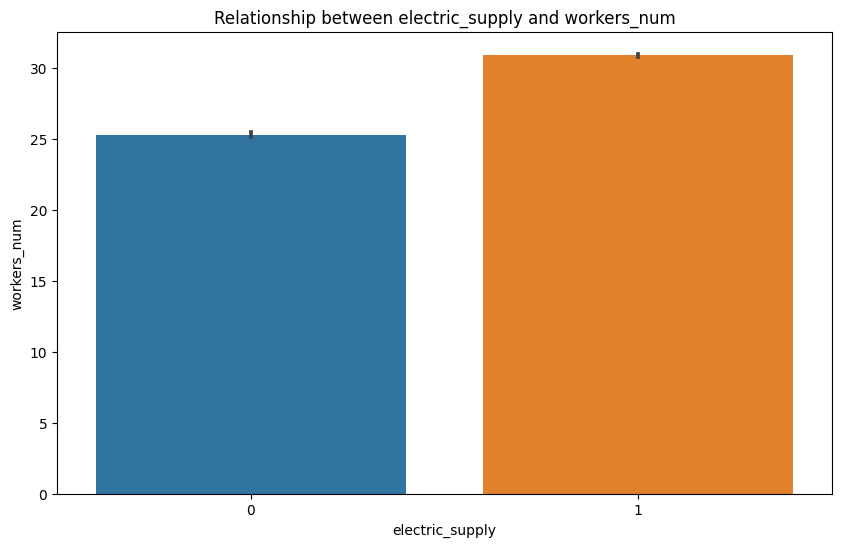

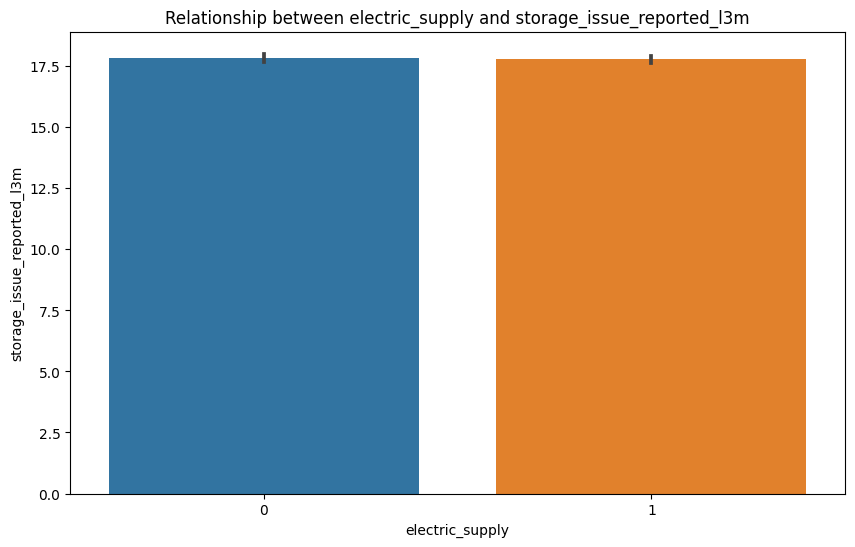

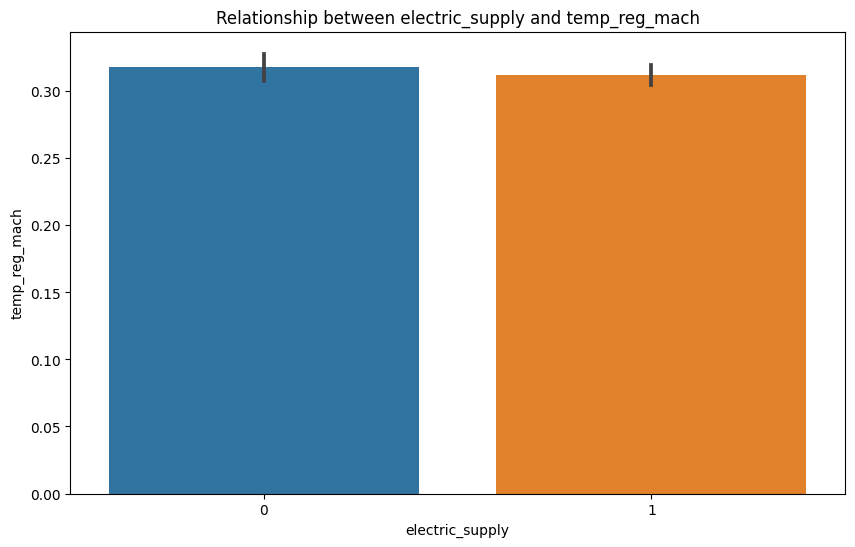

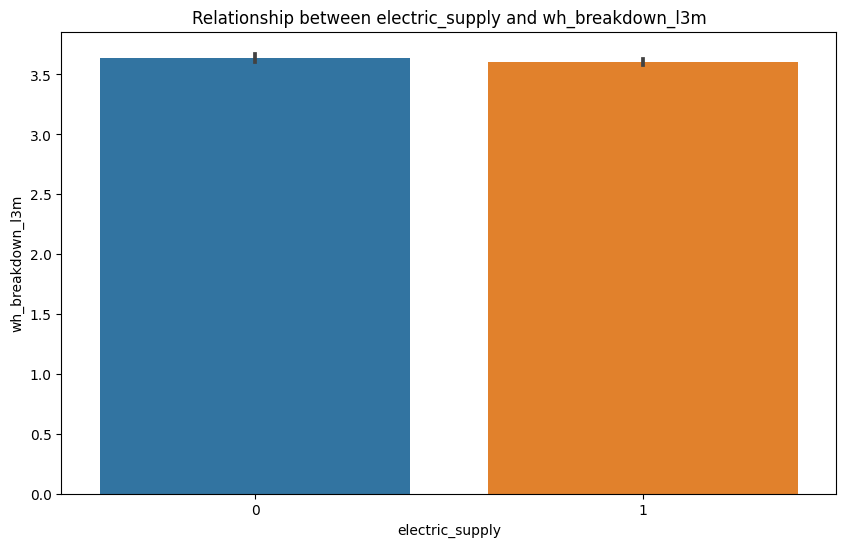

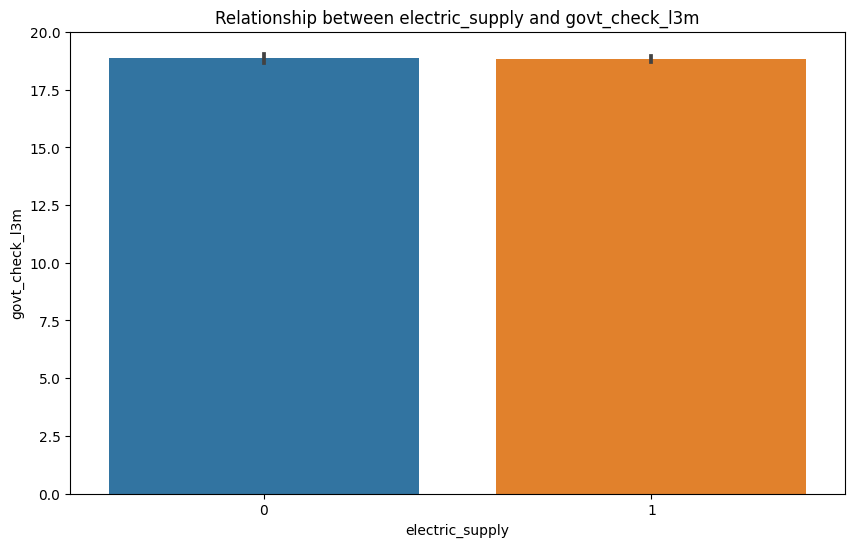

In [30]:
for cat_attribute in categorical_attributes:
    for cont_attribute in continuous_attributes:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cat_attribute, y=cont_attribute, data=df_x)
        plt.title(f'Relationship between {cat_attribute} and {cont_attribute}')
        plt.show()

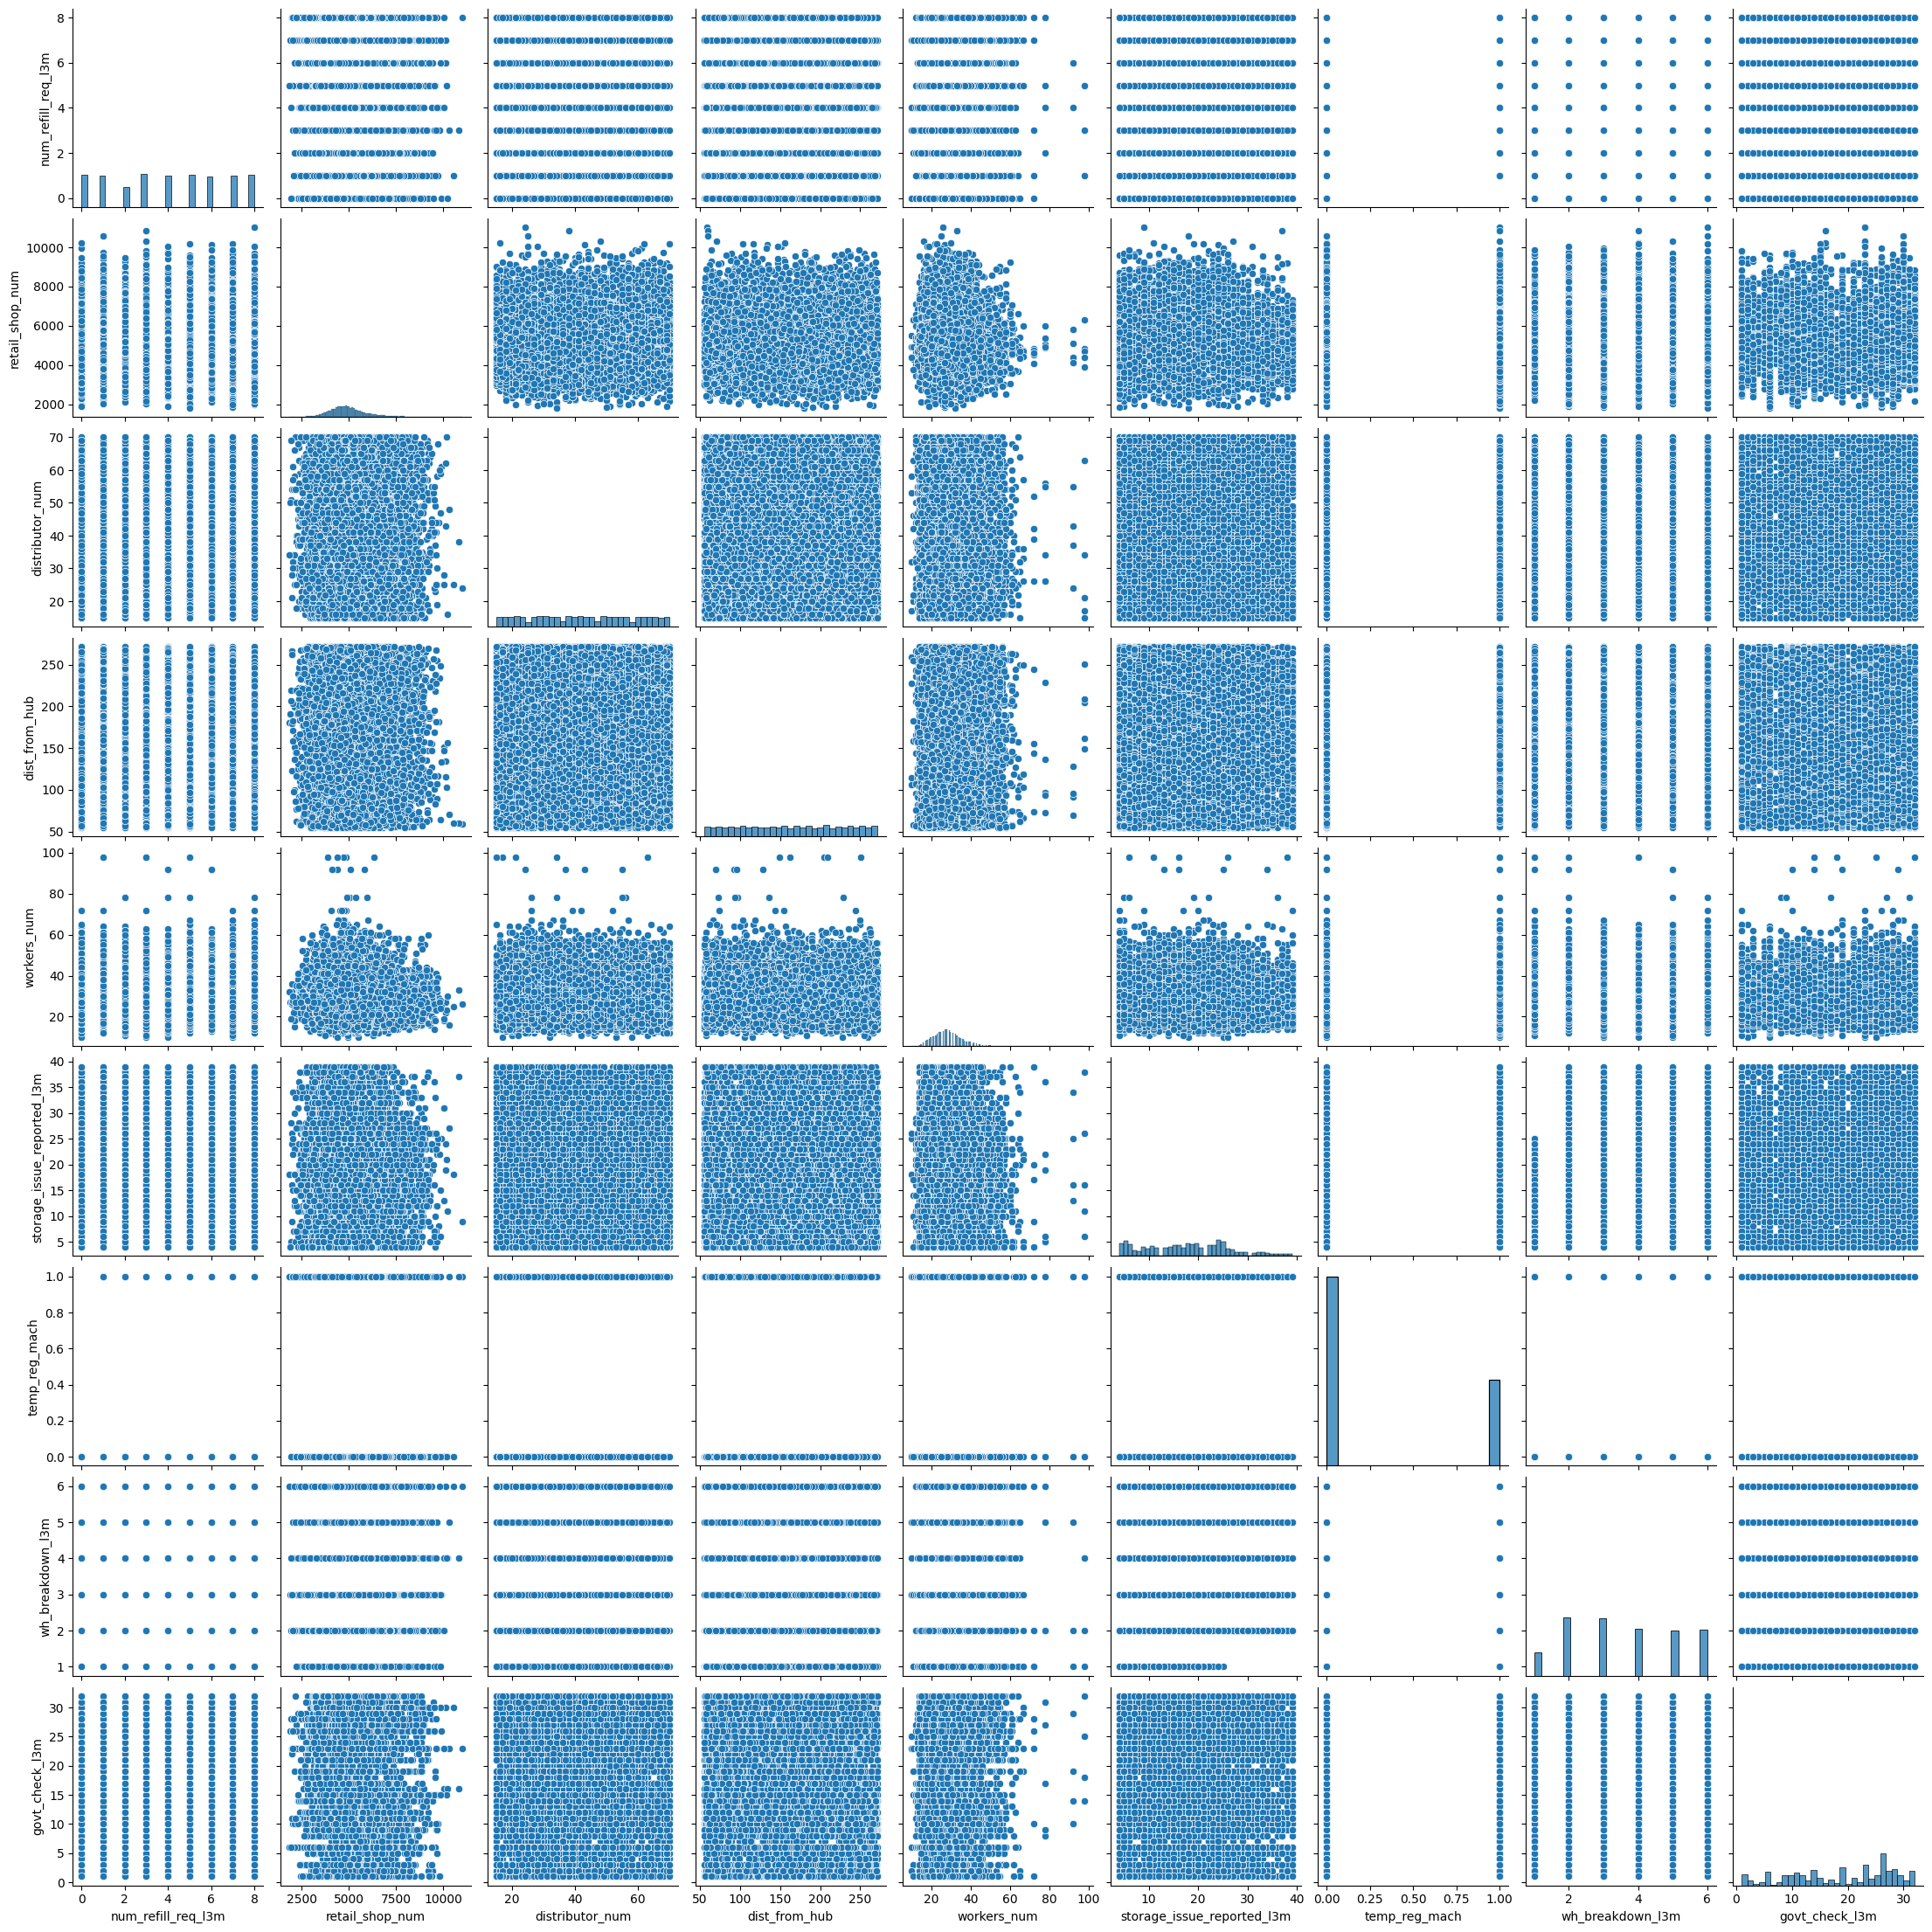

In [31]:
sns.pairplot(df_x[continuous_attributes])
plt.show()

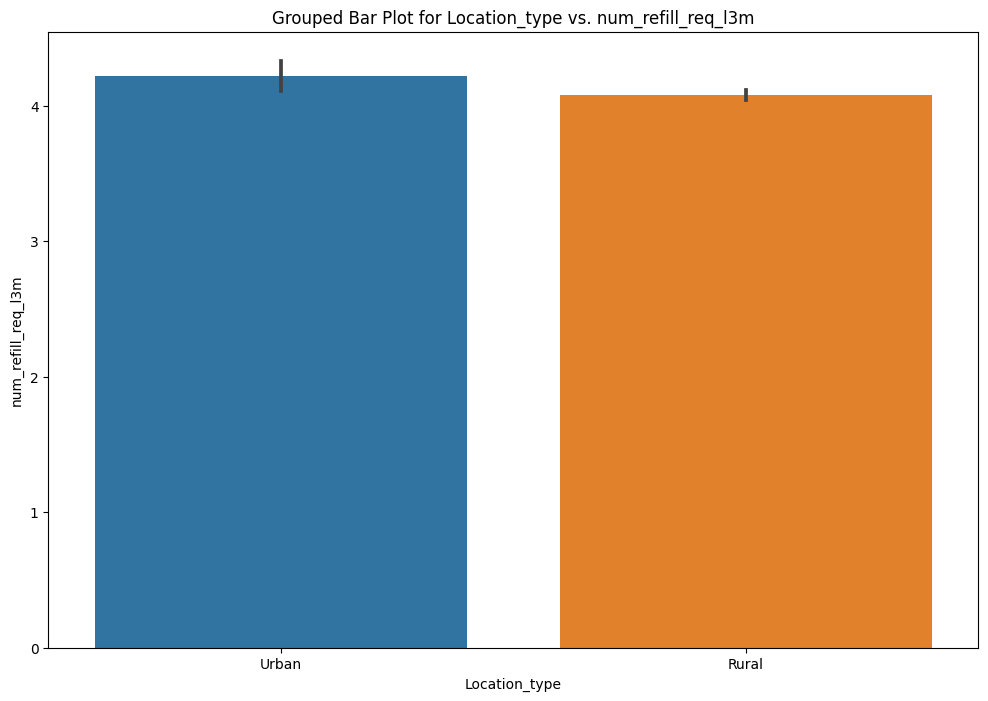

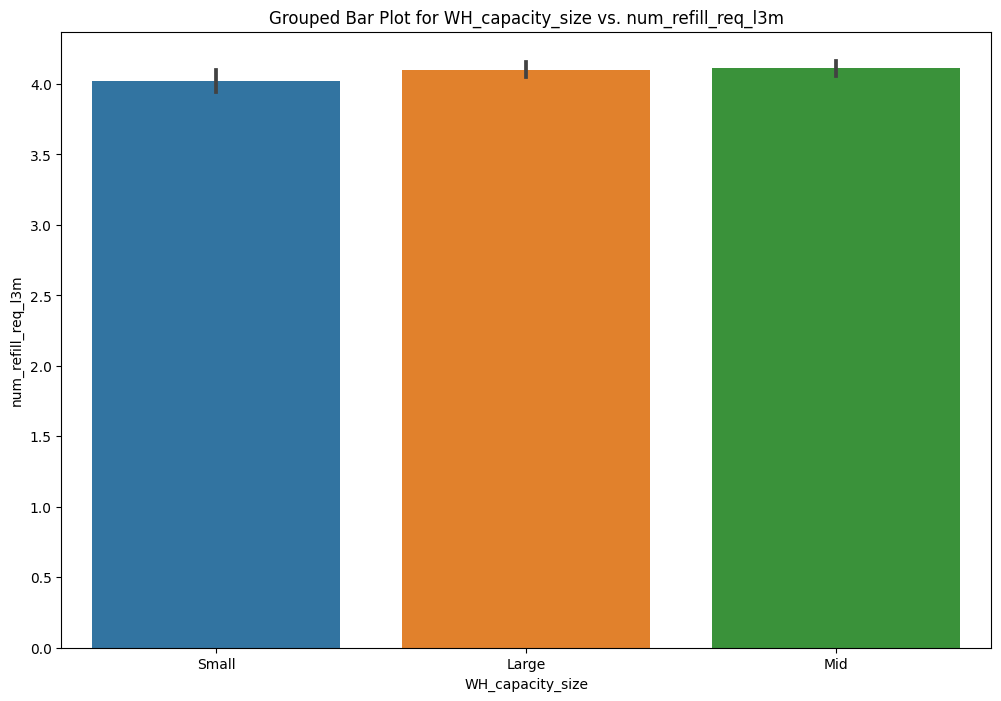

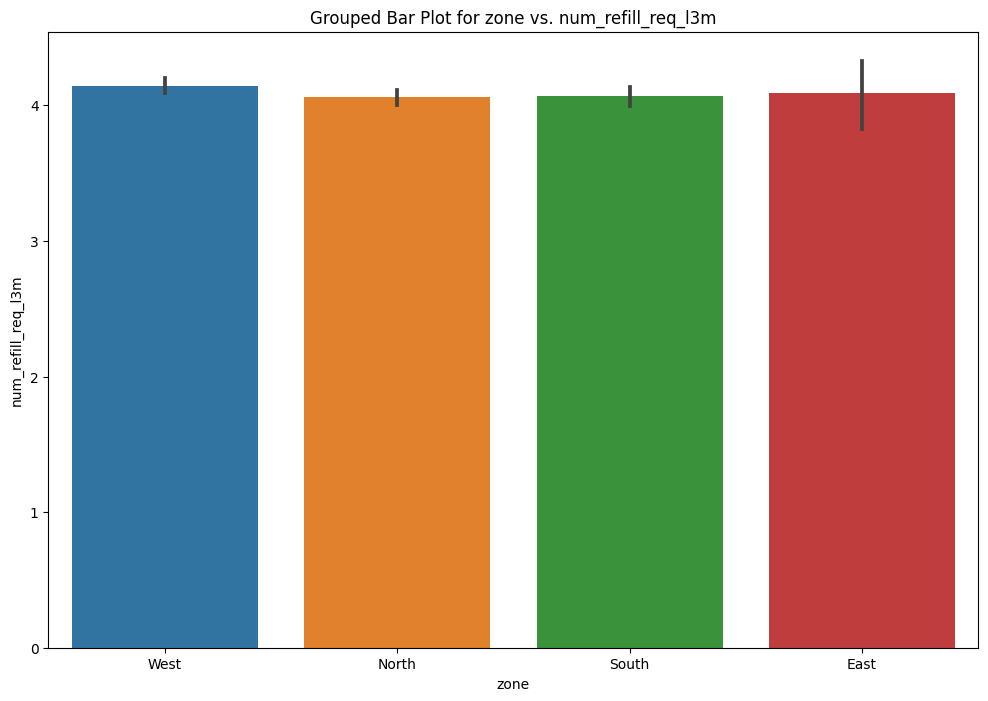

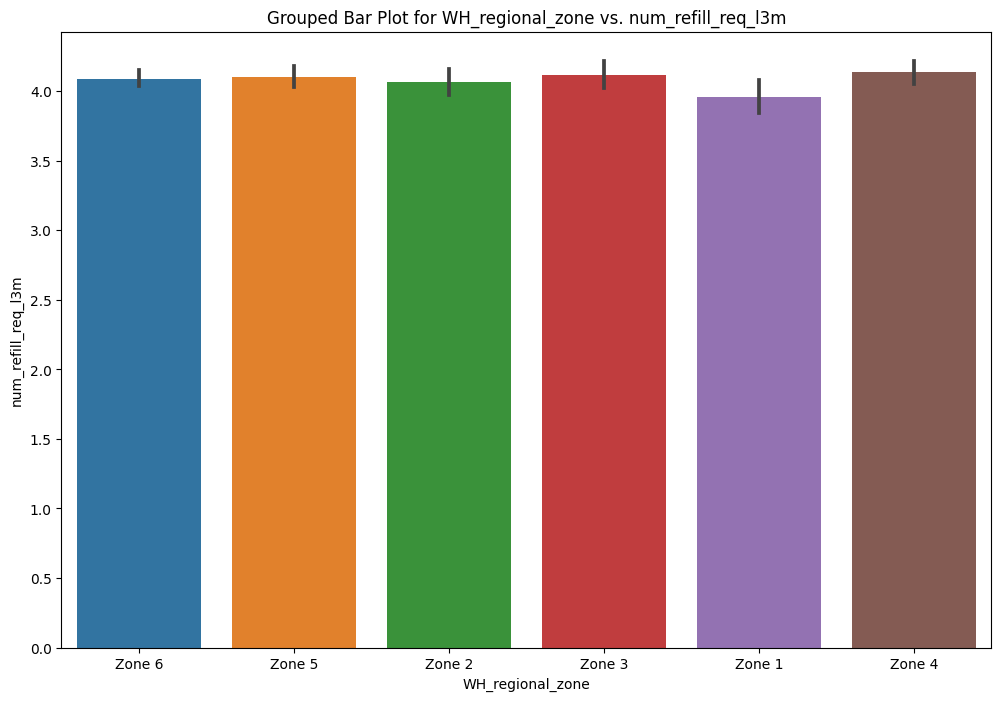

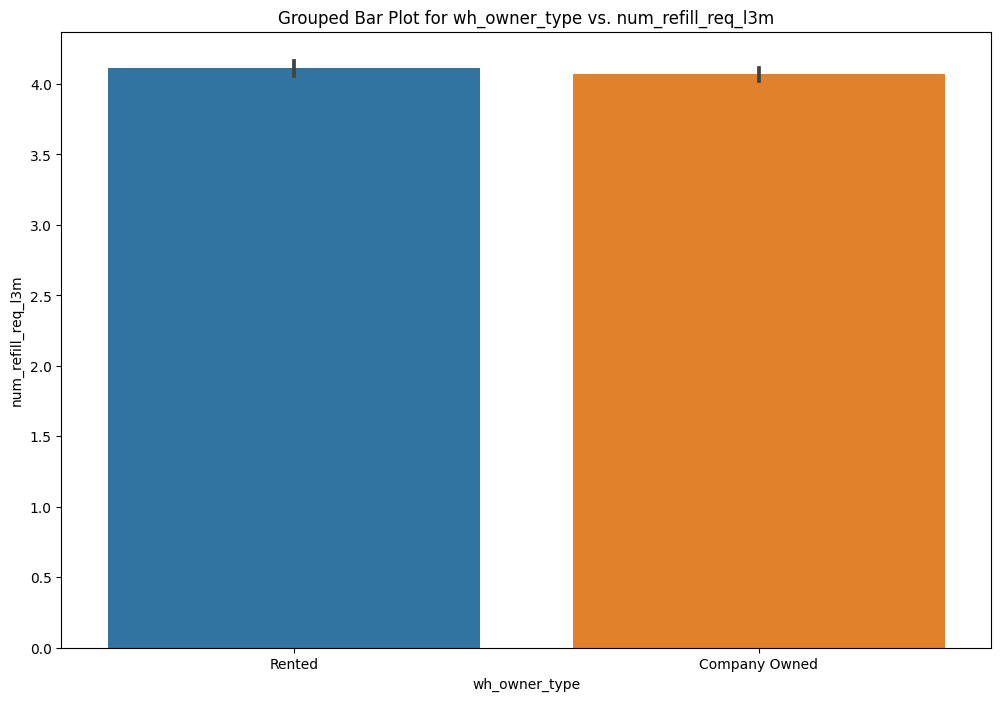

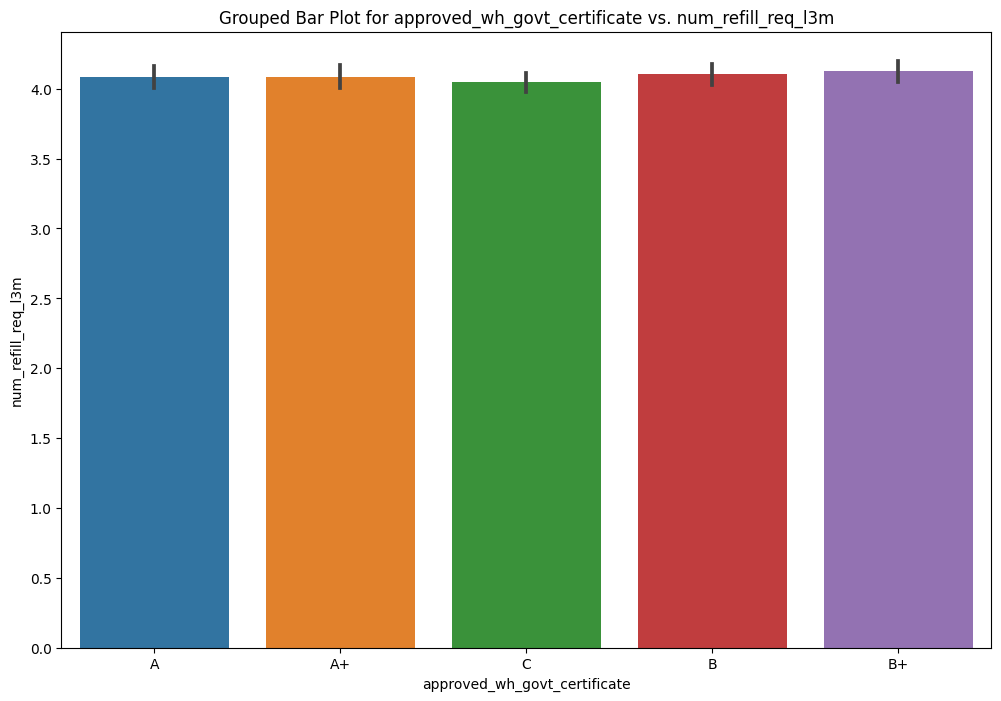

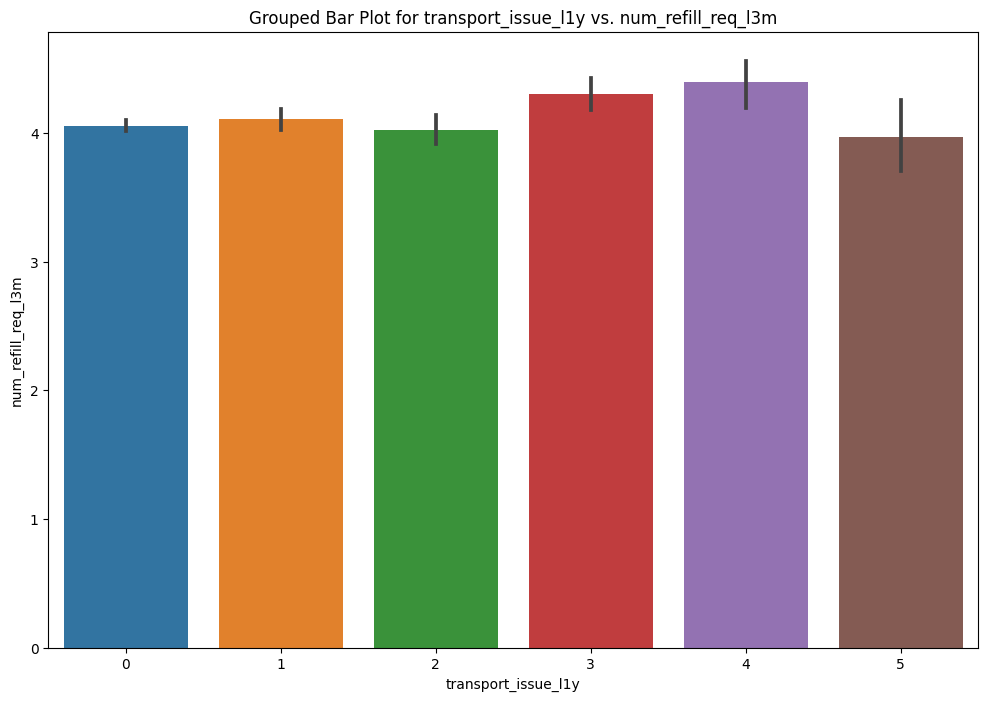

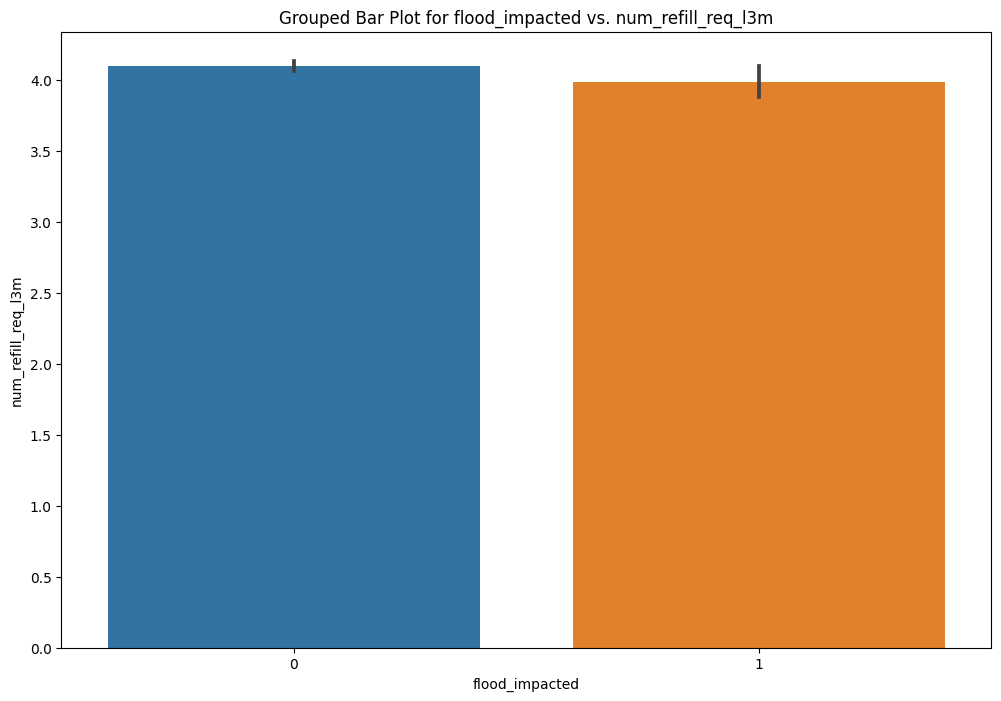

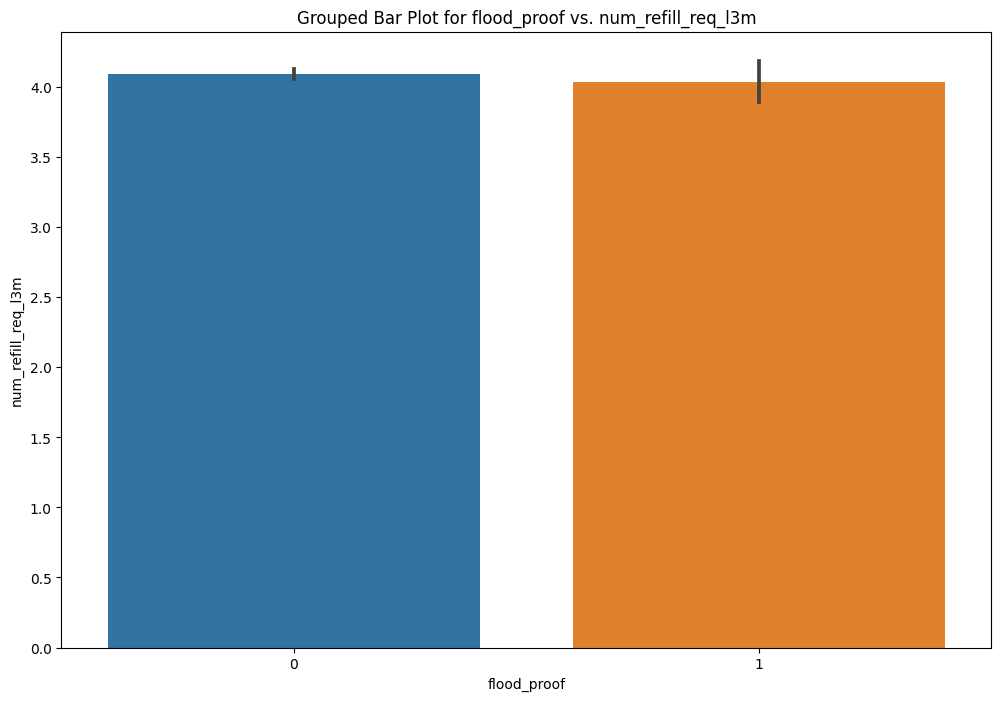

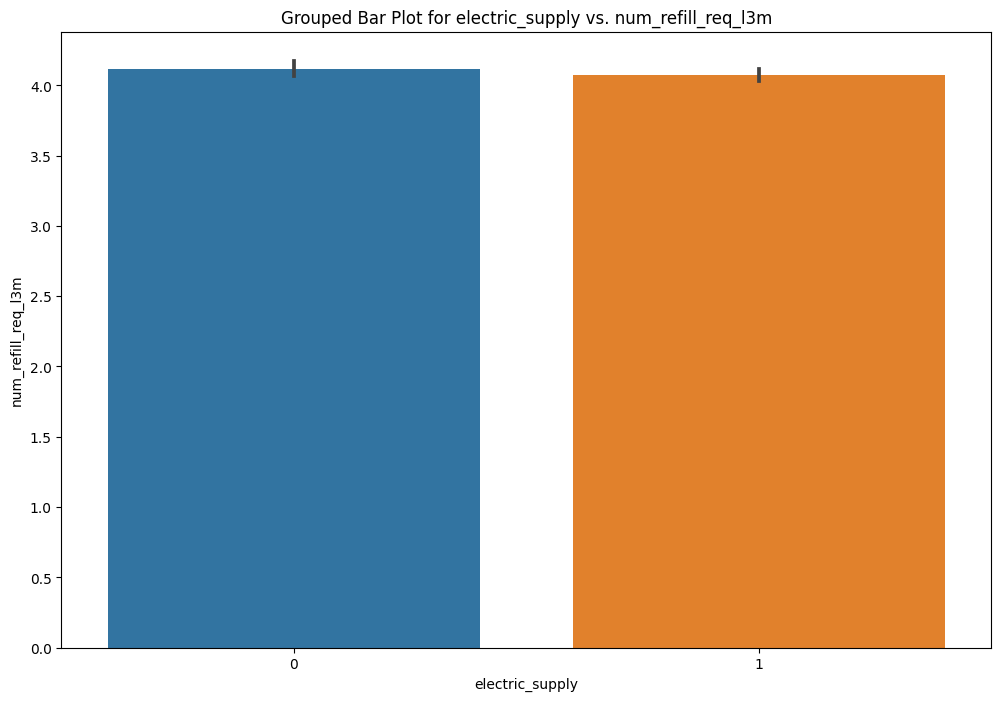

In [32]:
for cat_attribute in categorical_attributes:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=cat_attribute, y='num_refill_req_l3m', data=df_x, estimator=np.mean)
    plt.title(f'Grouped Bar Plot for {cat_attribute} vs. num_refill_req_l3m')
    plt.show()

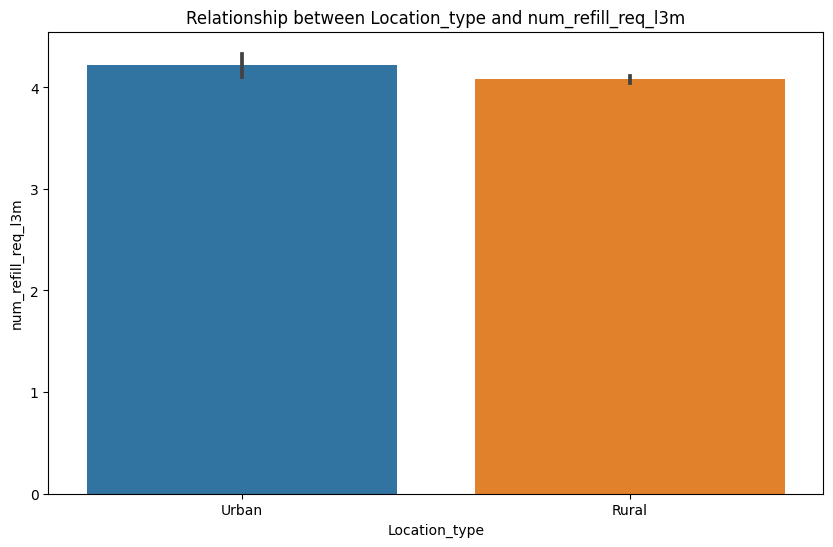

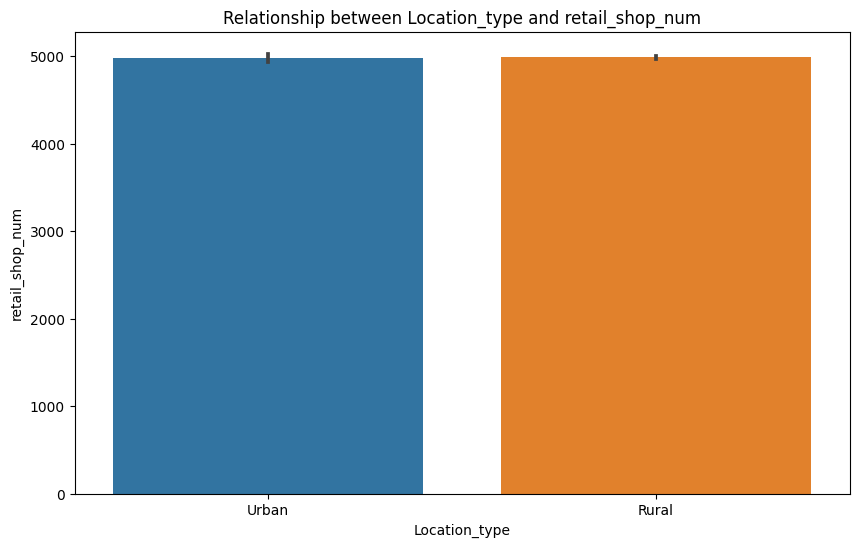

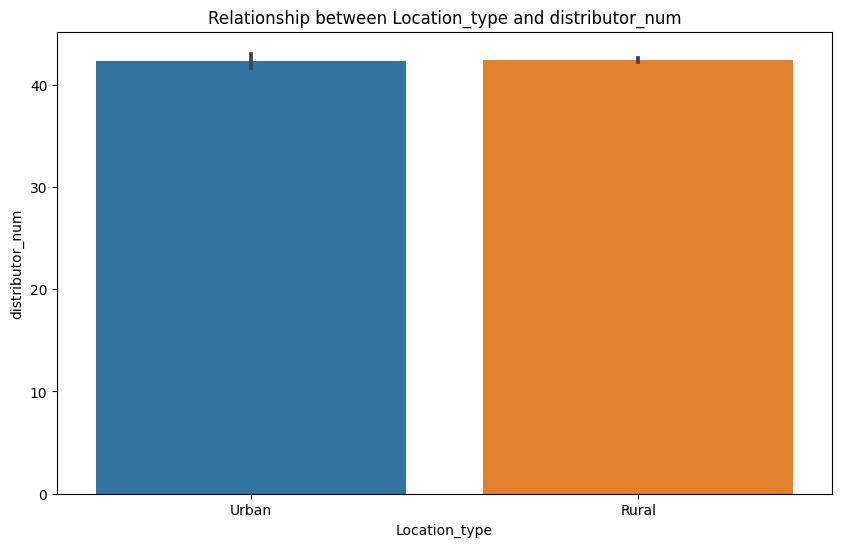

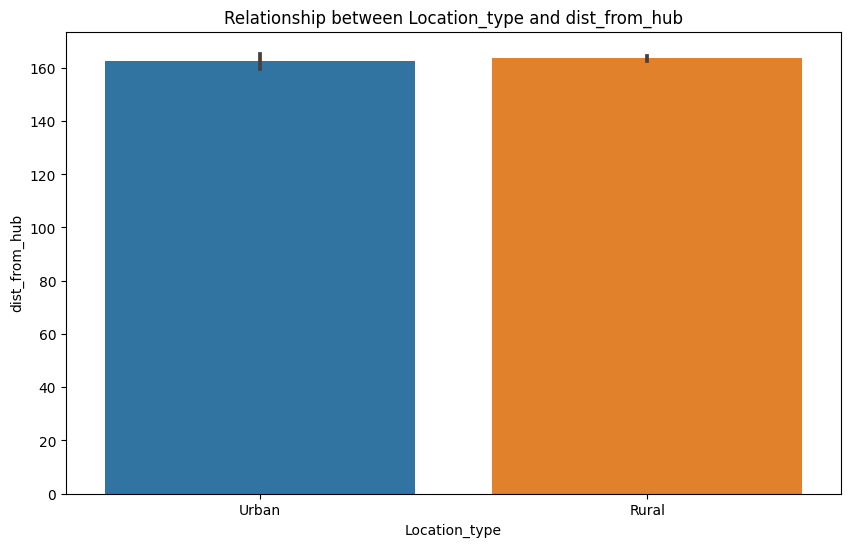

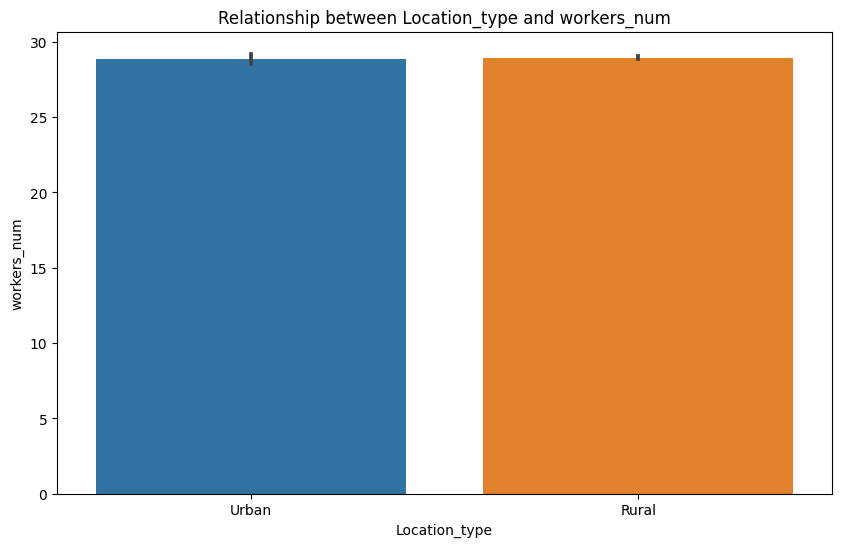

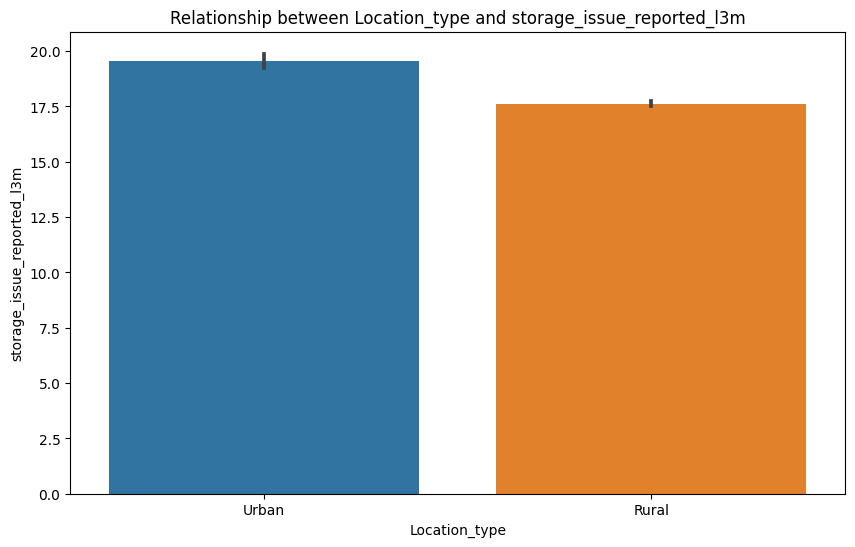

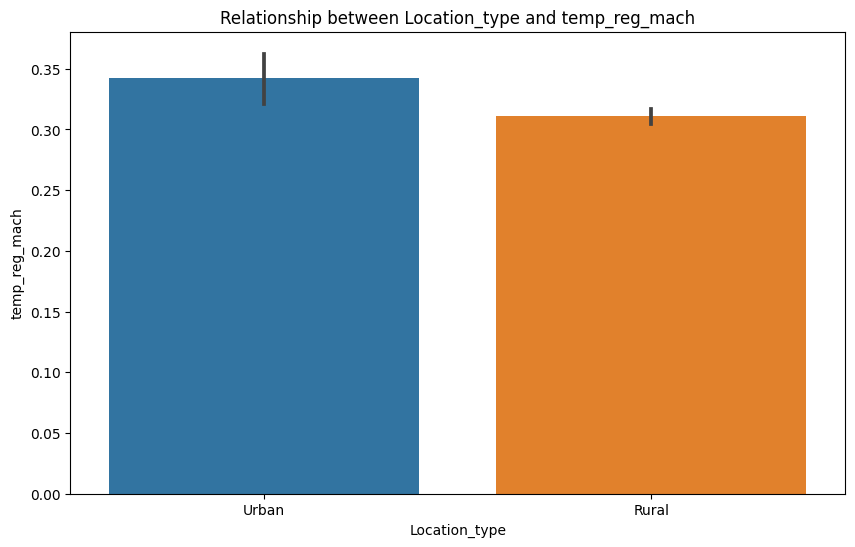

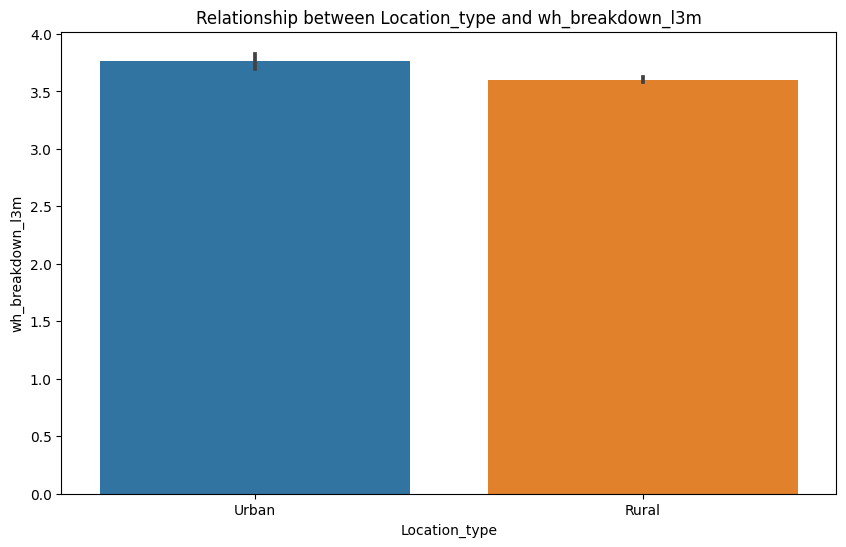

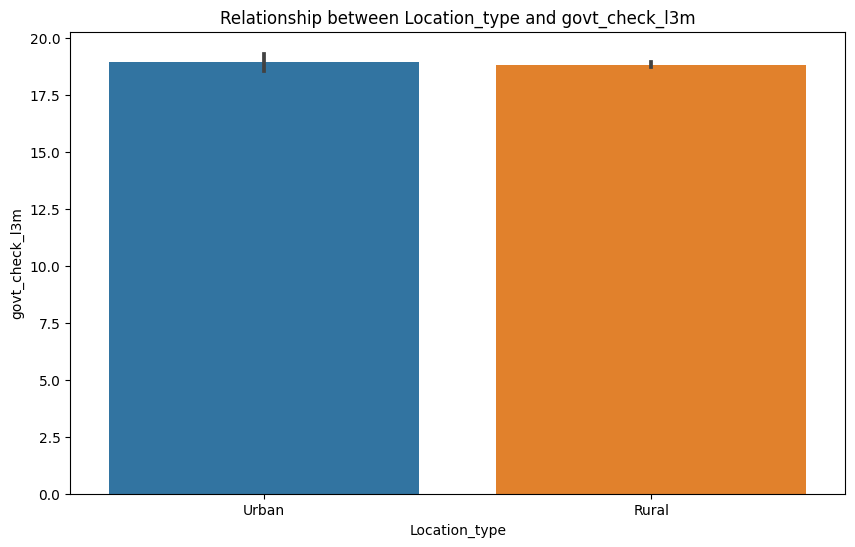

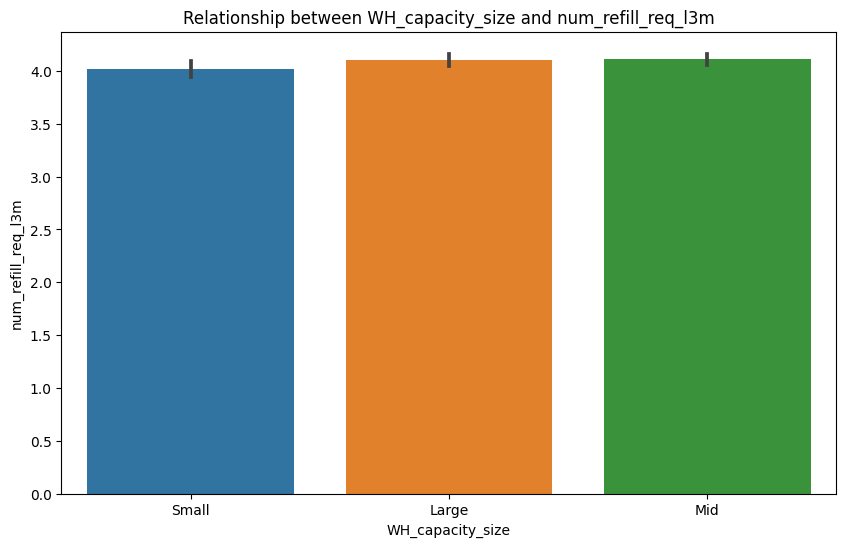

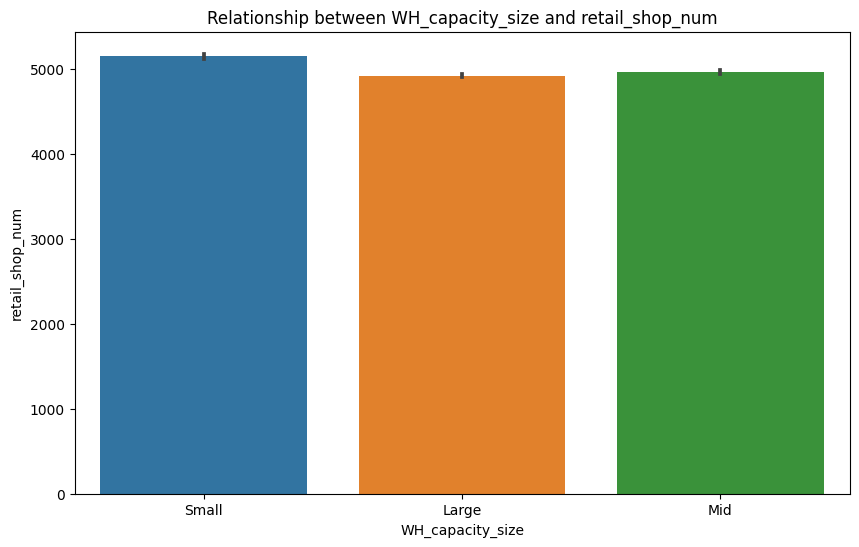

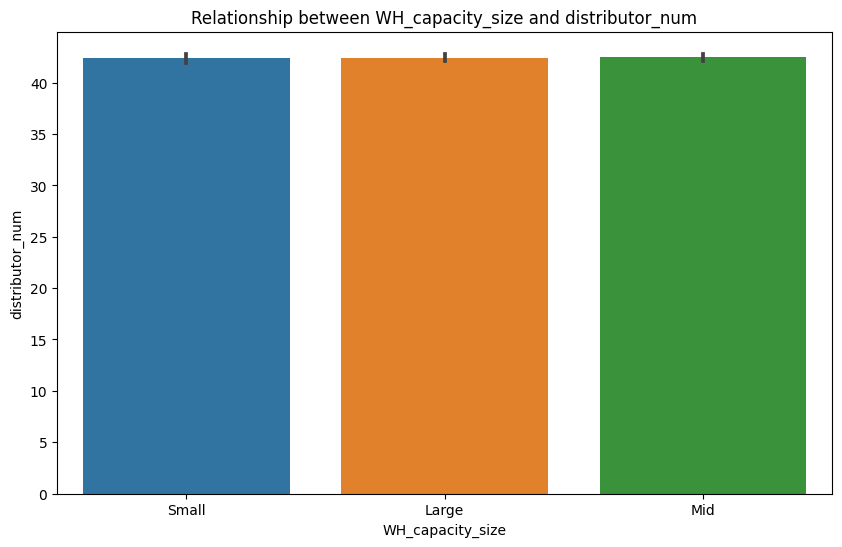

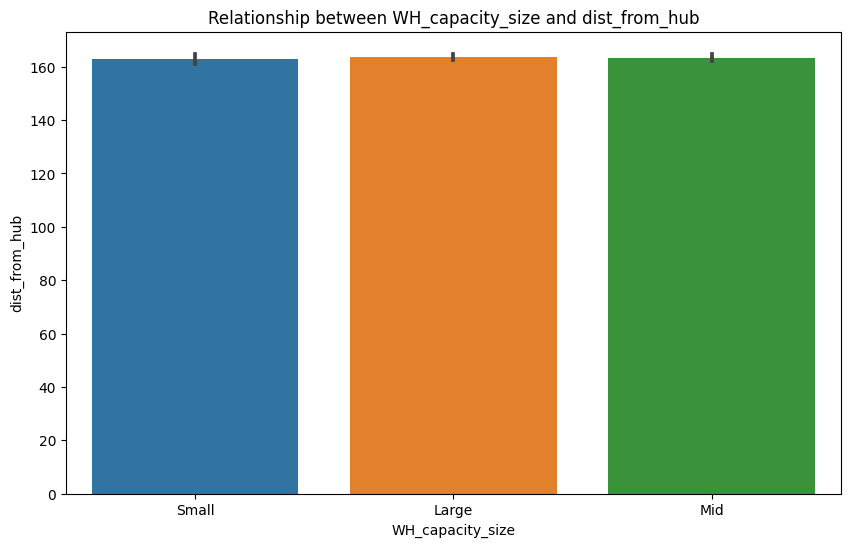

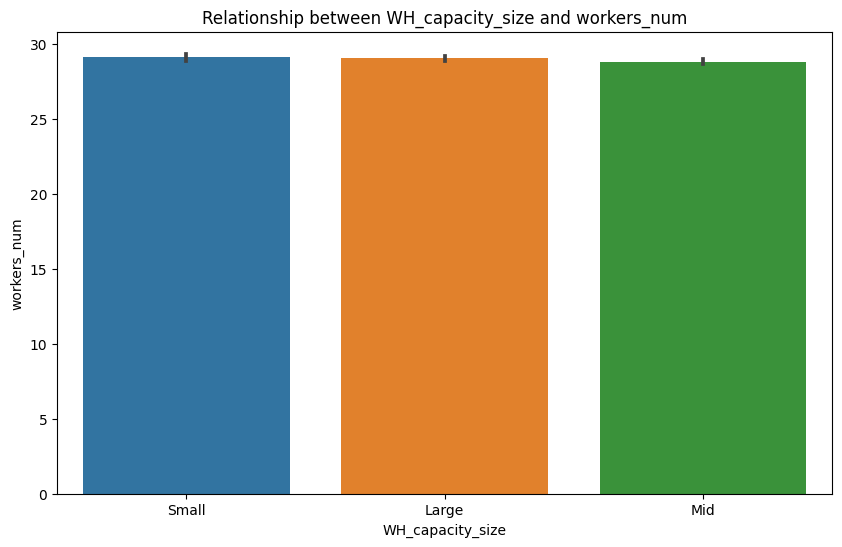

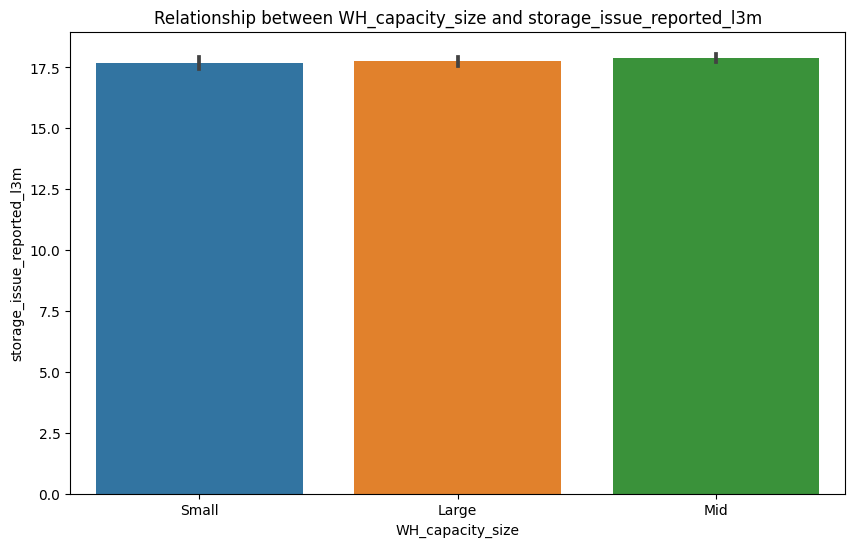

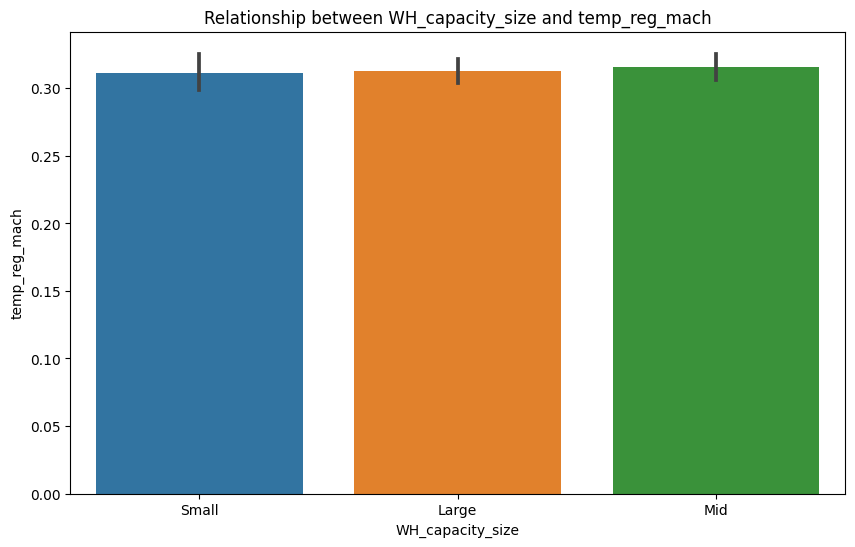

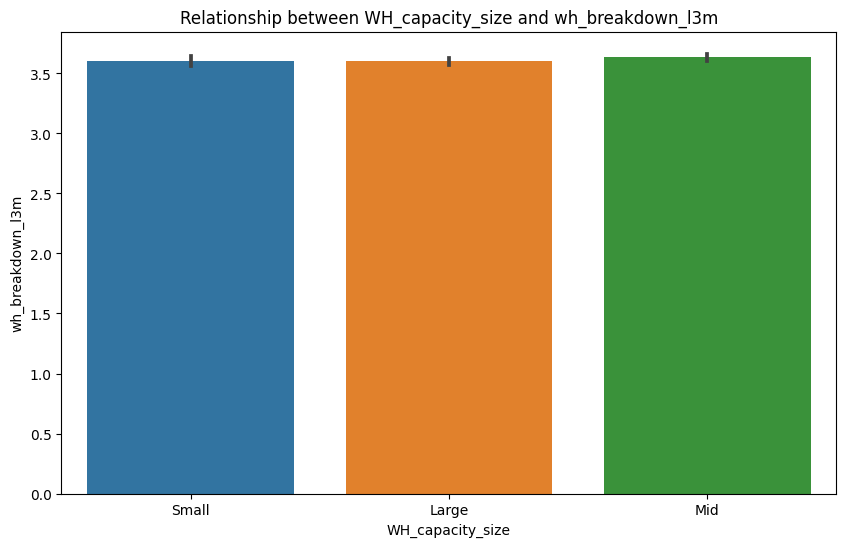

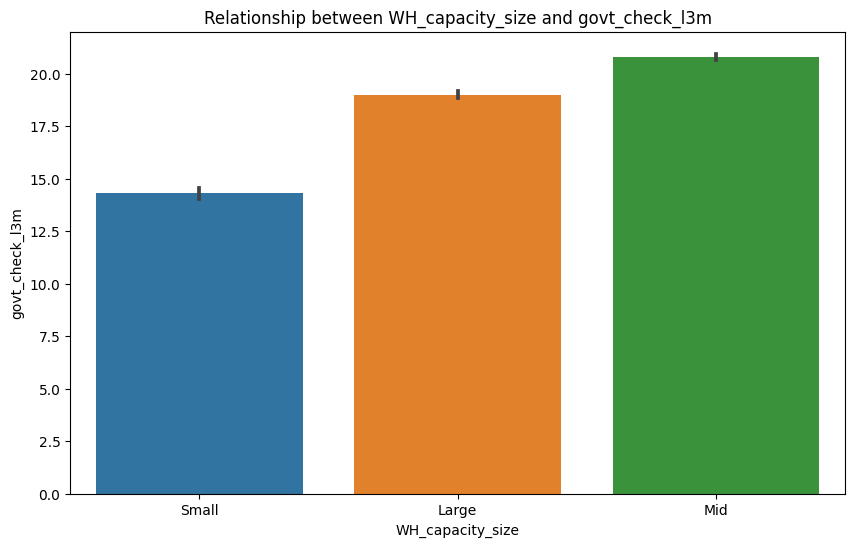

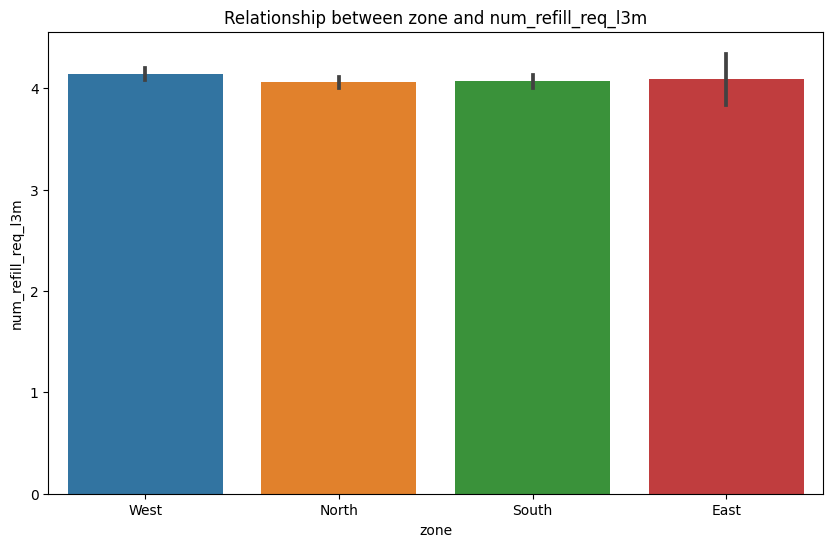

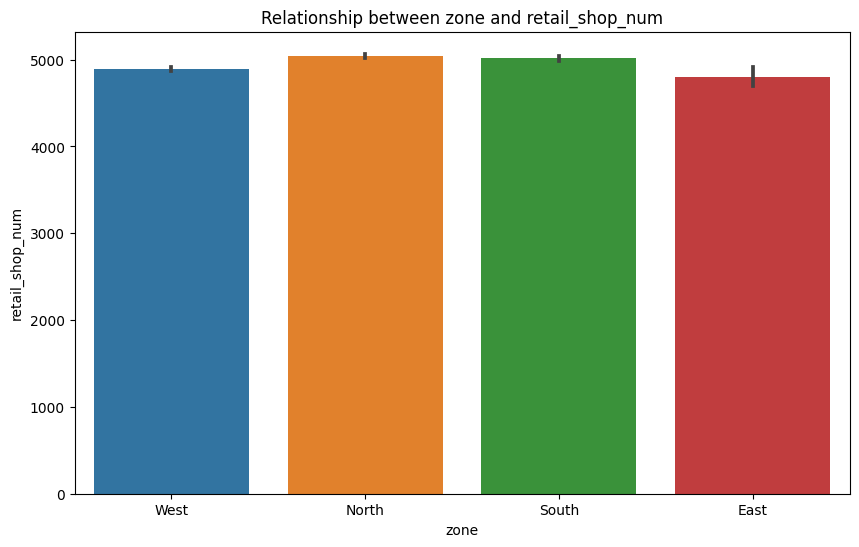

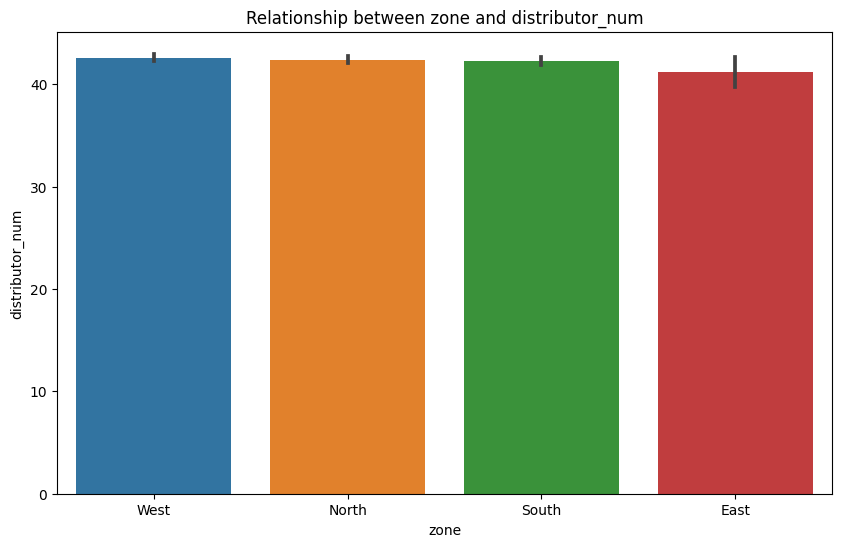

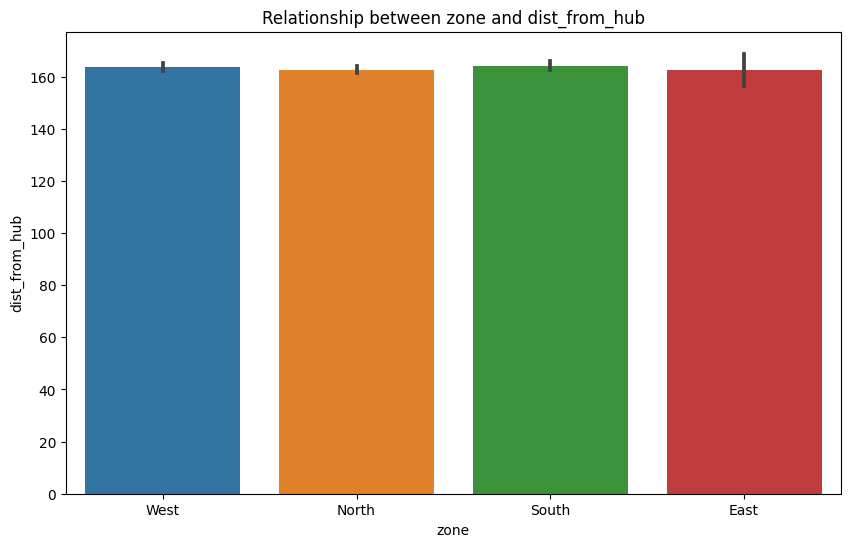

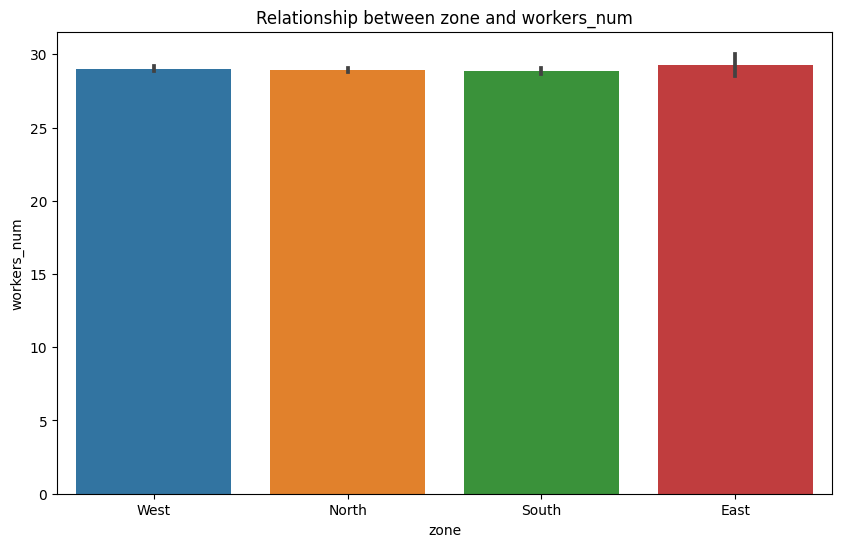

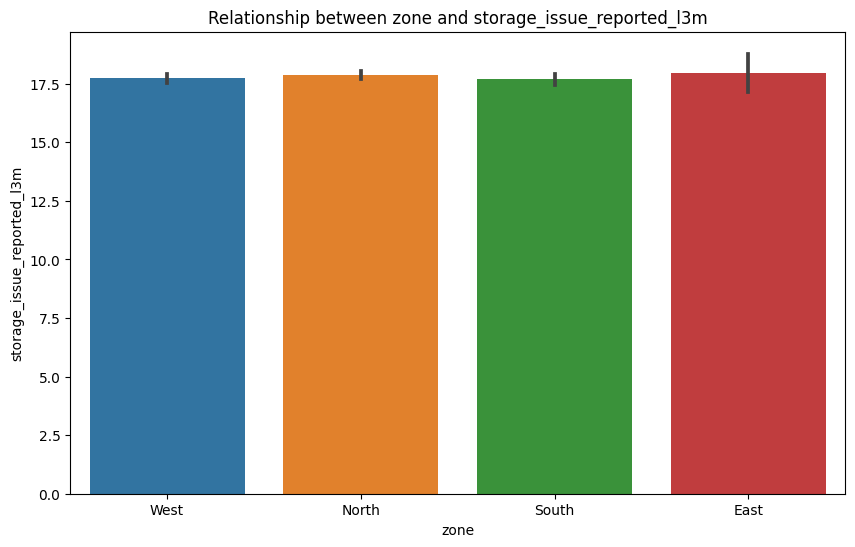

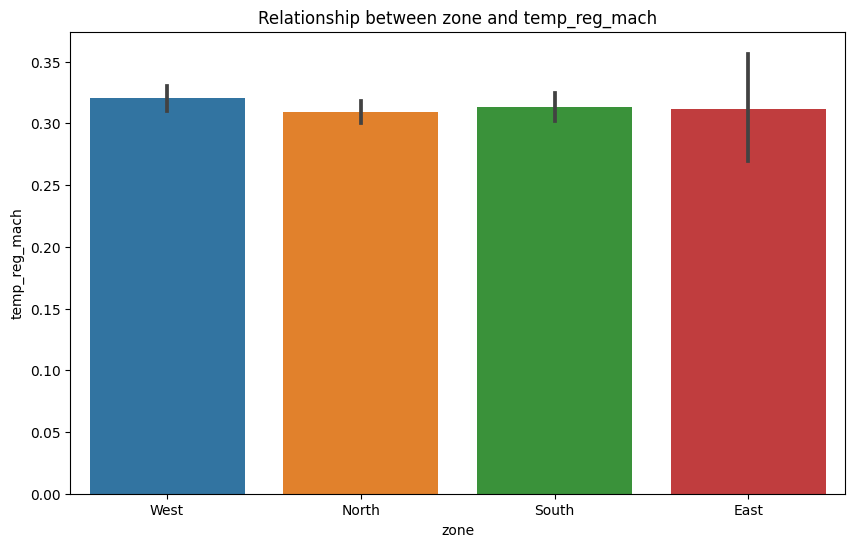

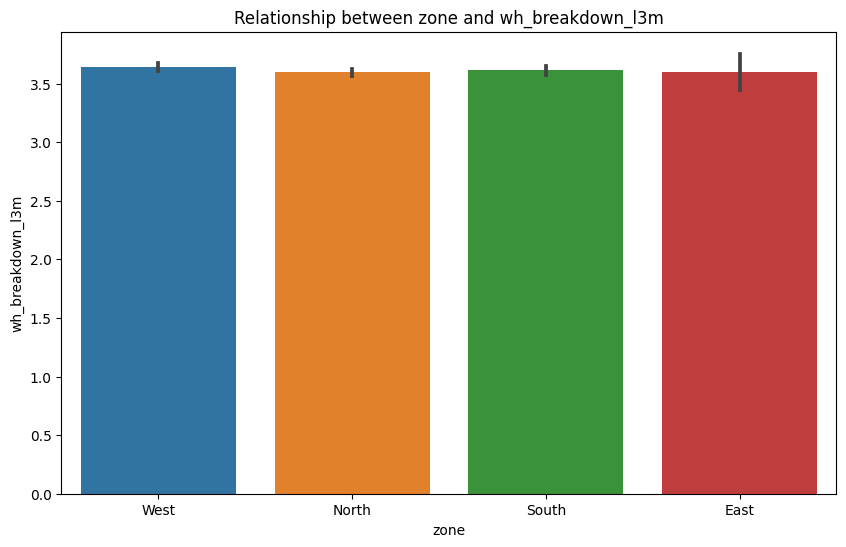

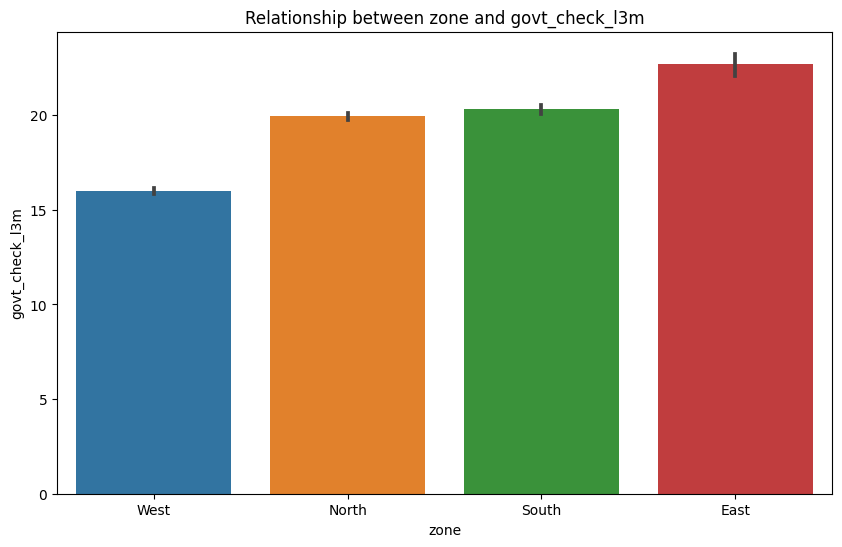

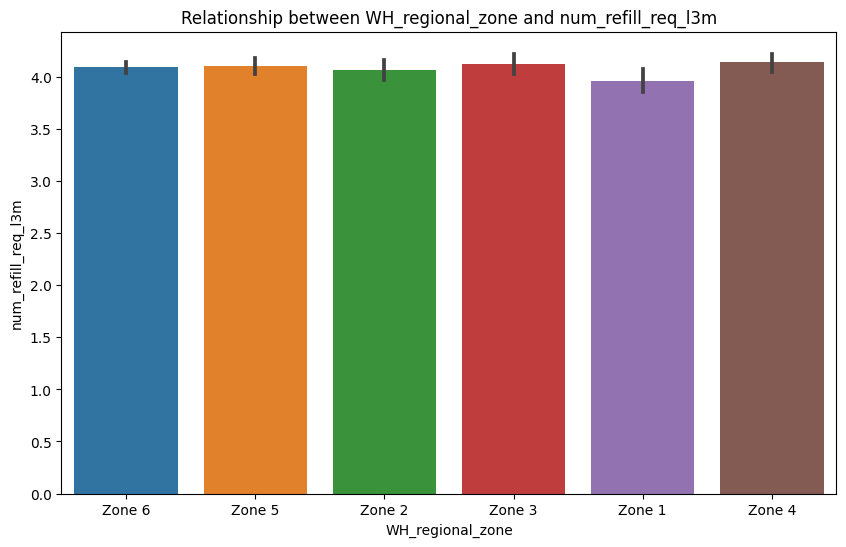

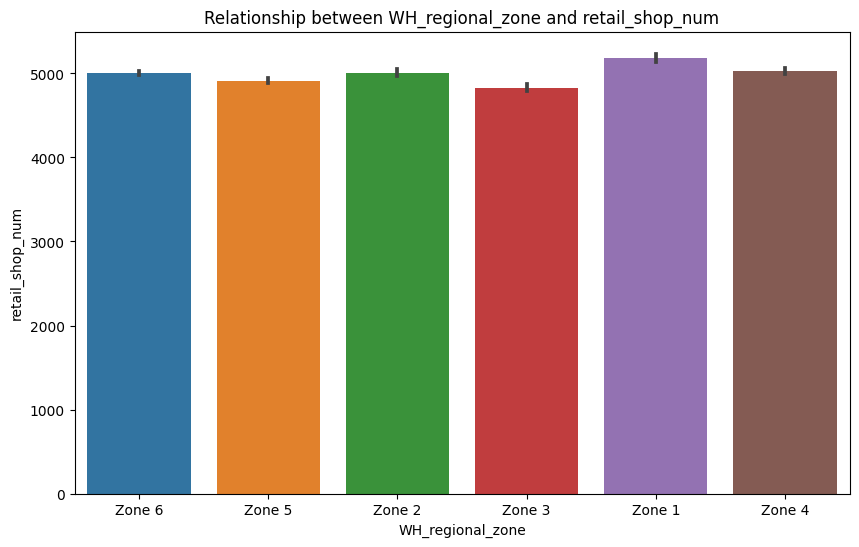

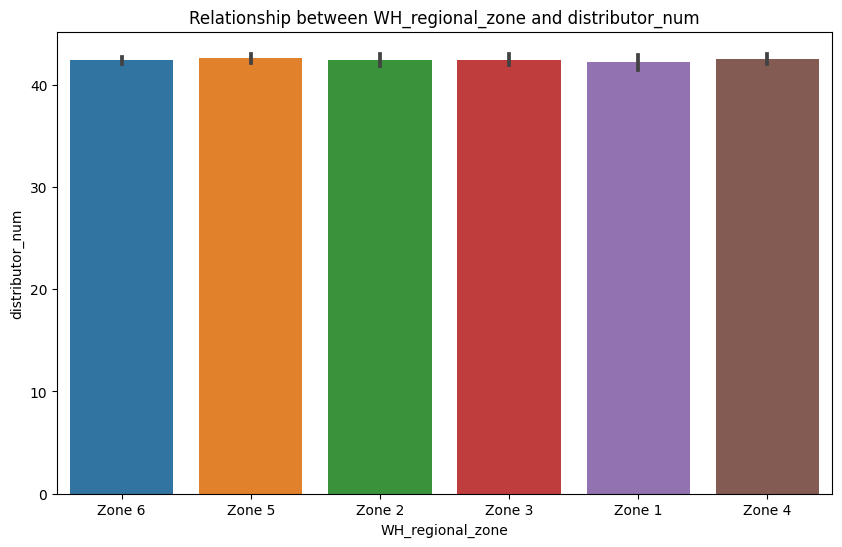

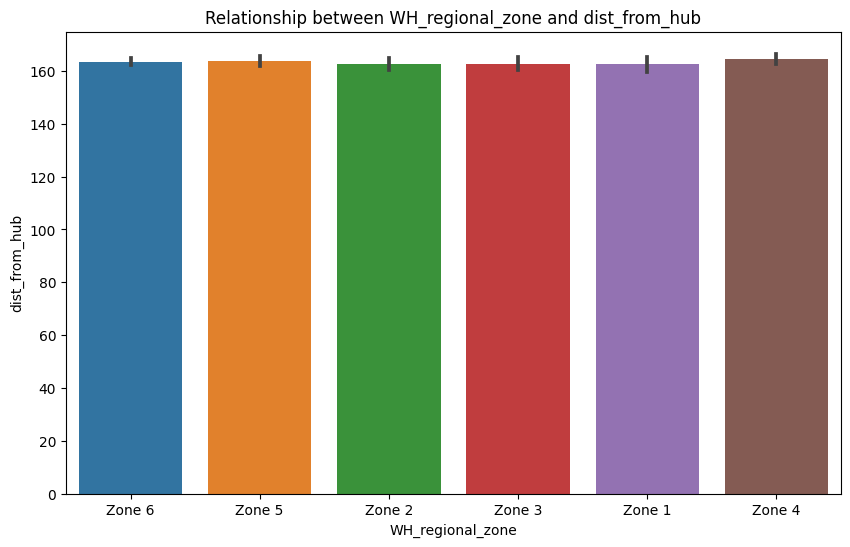

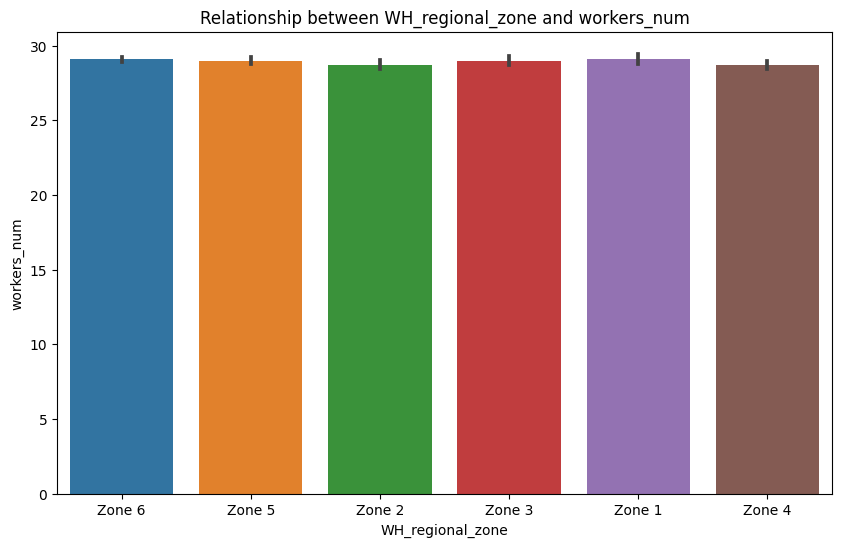

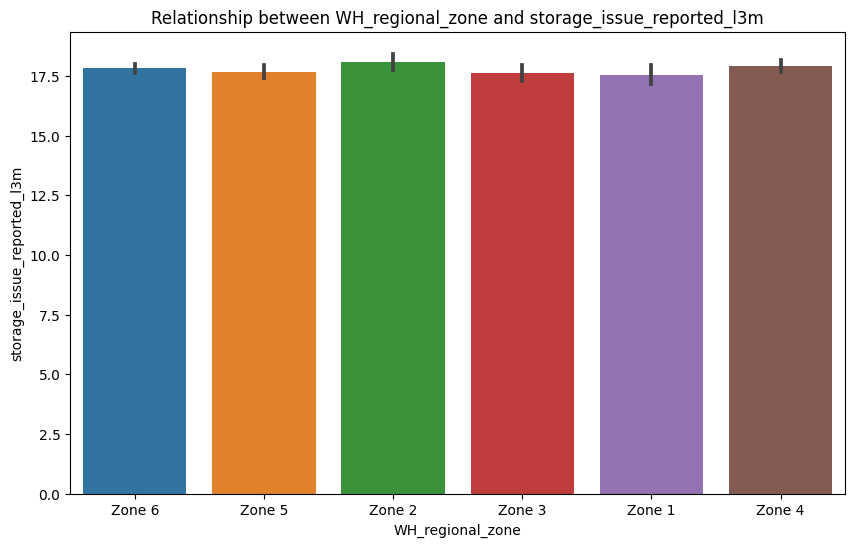

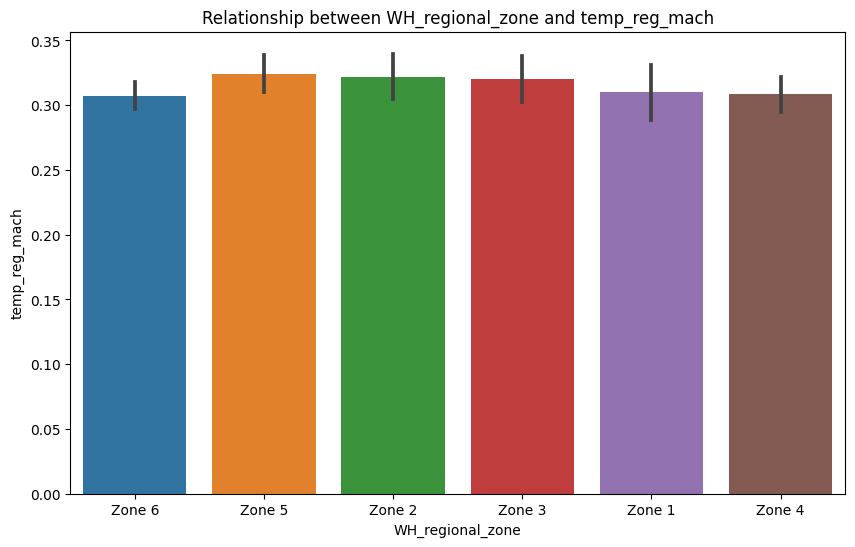

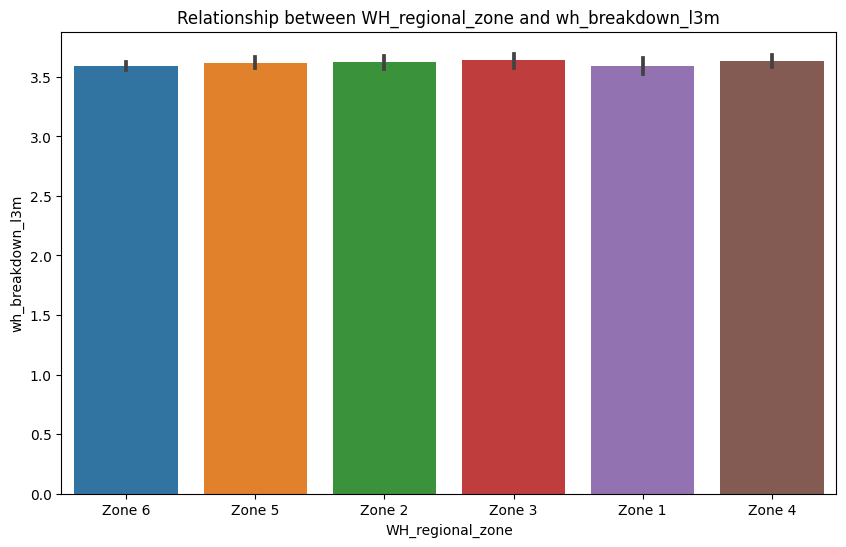

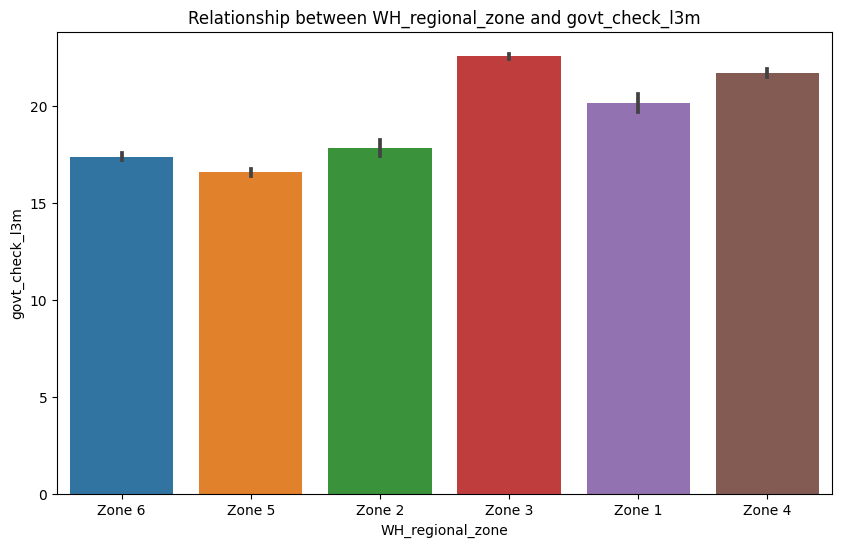

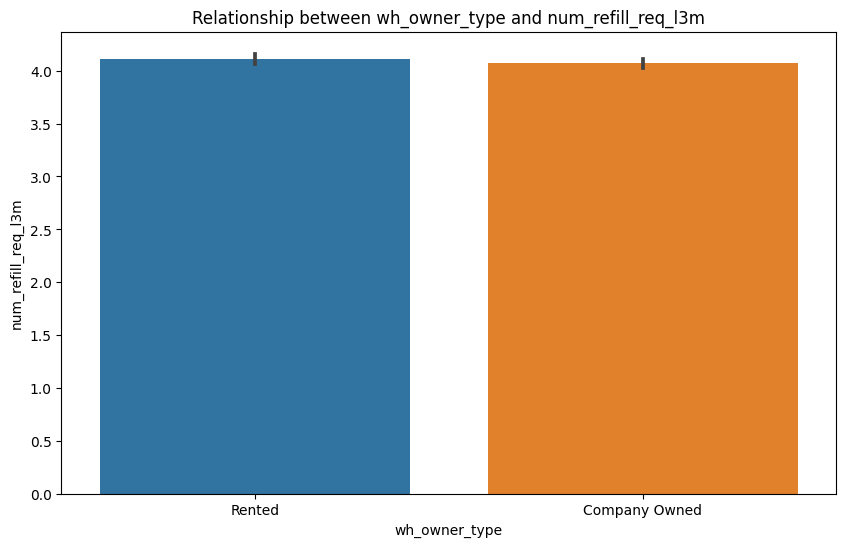

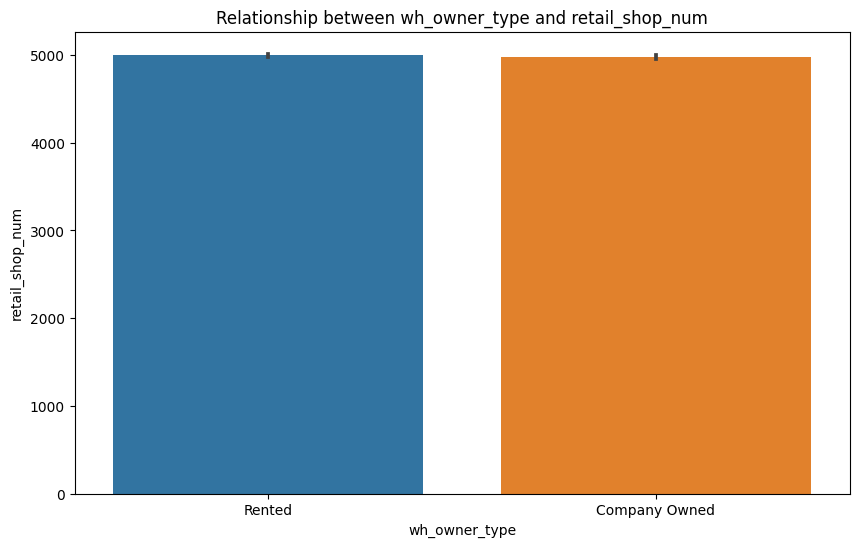

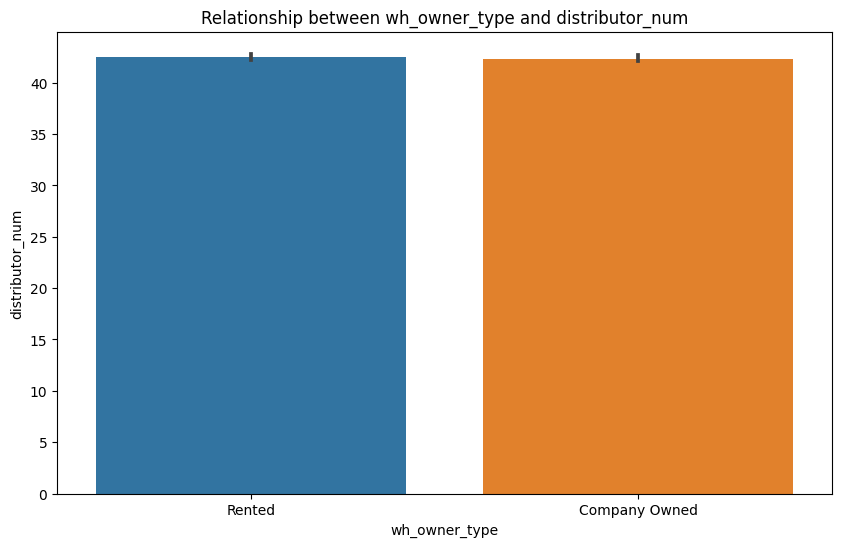

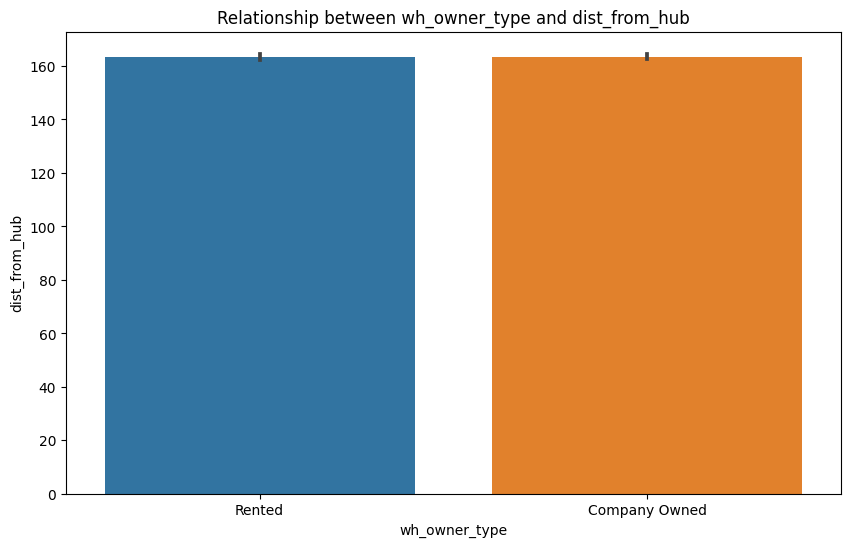

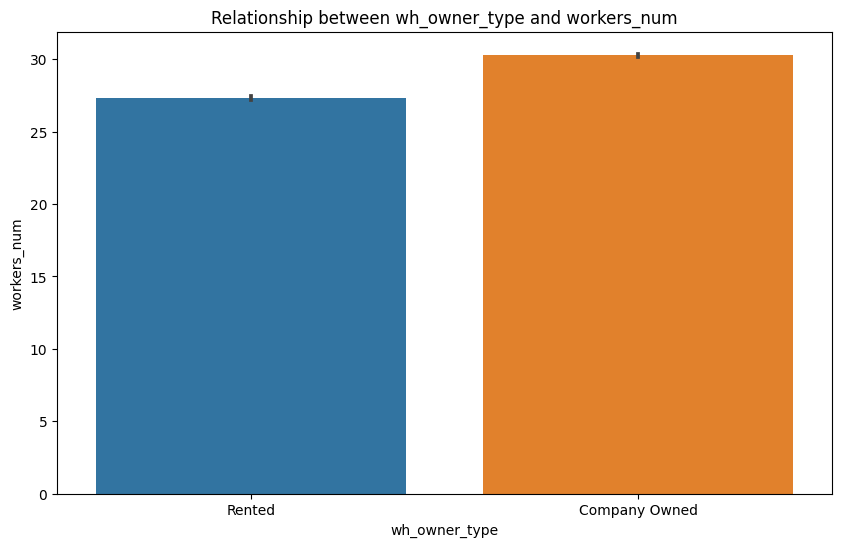

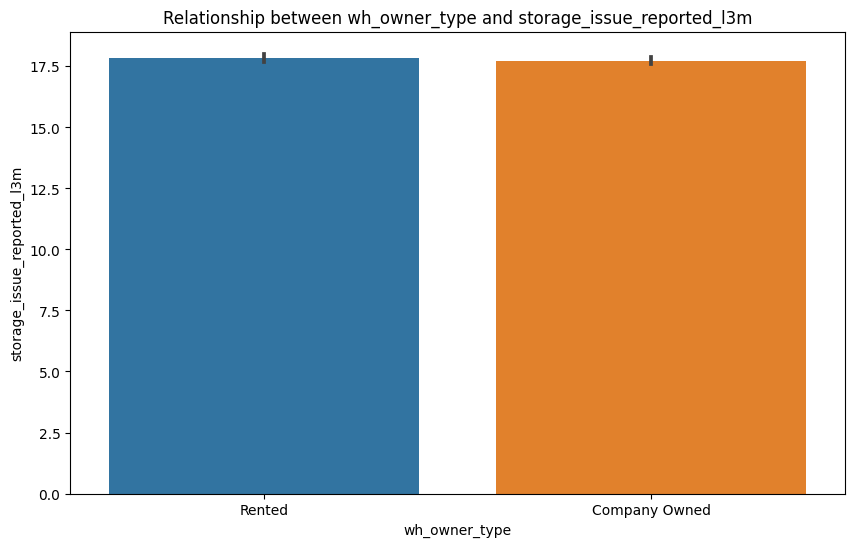

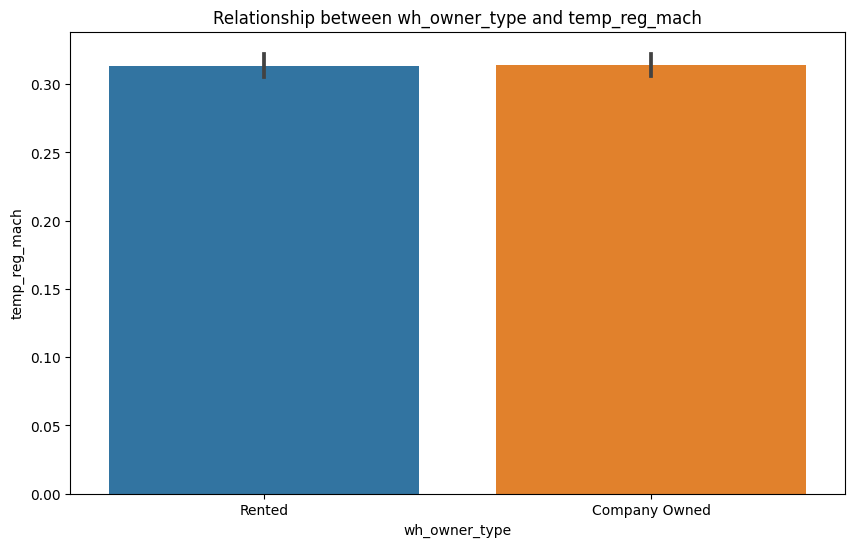

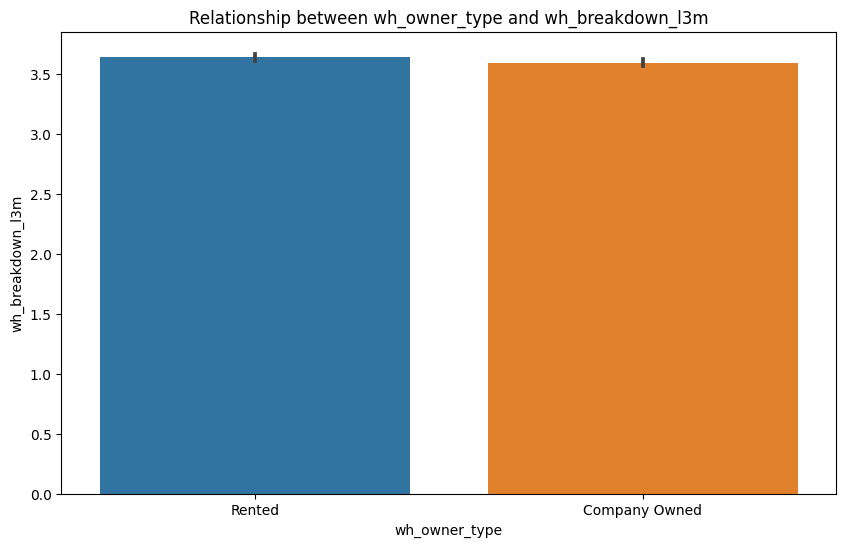

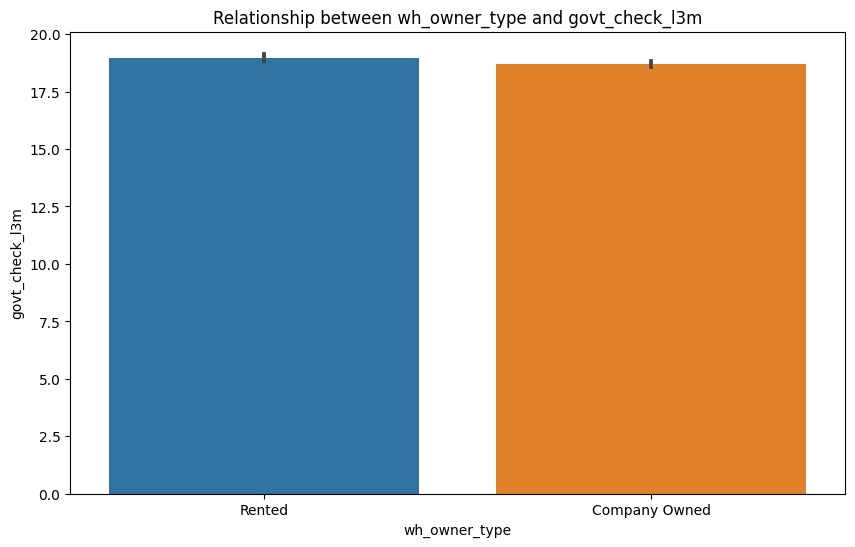

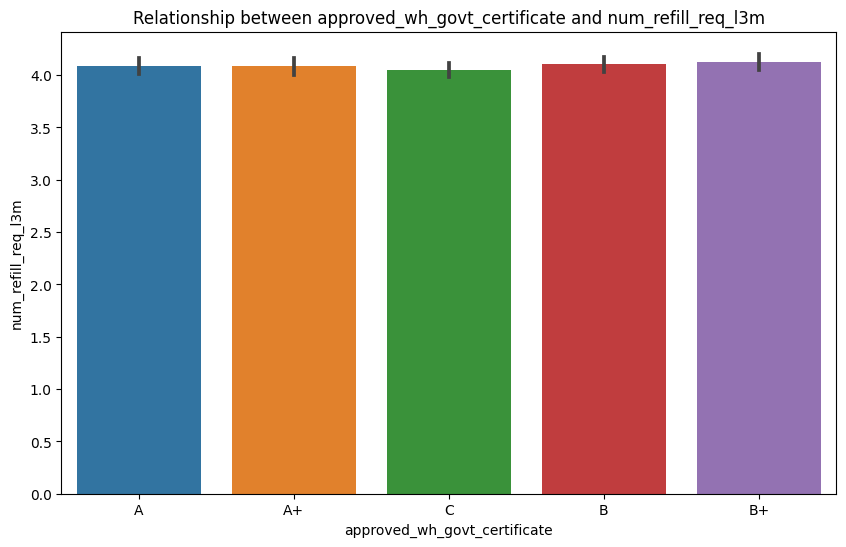

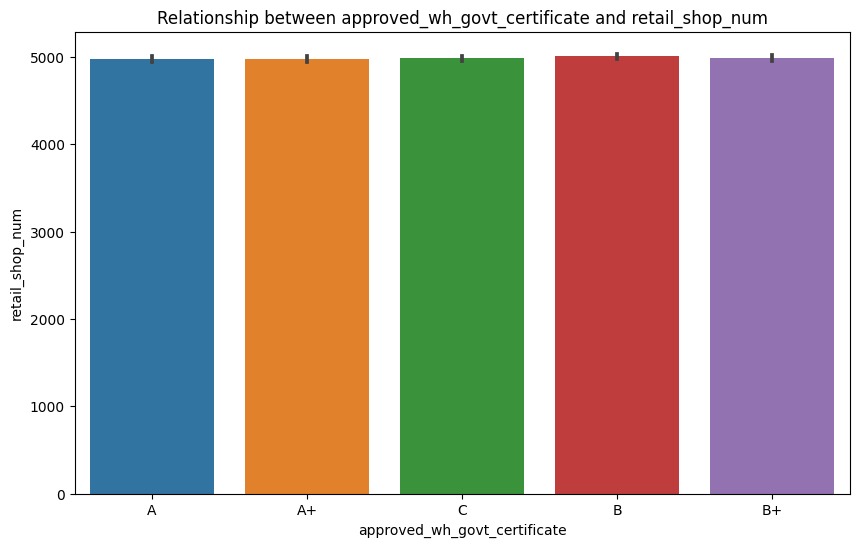

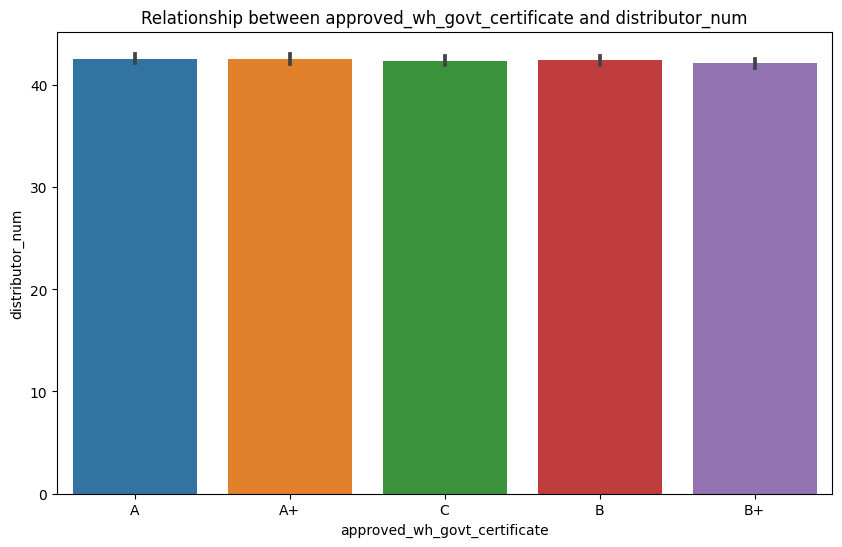

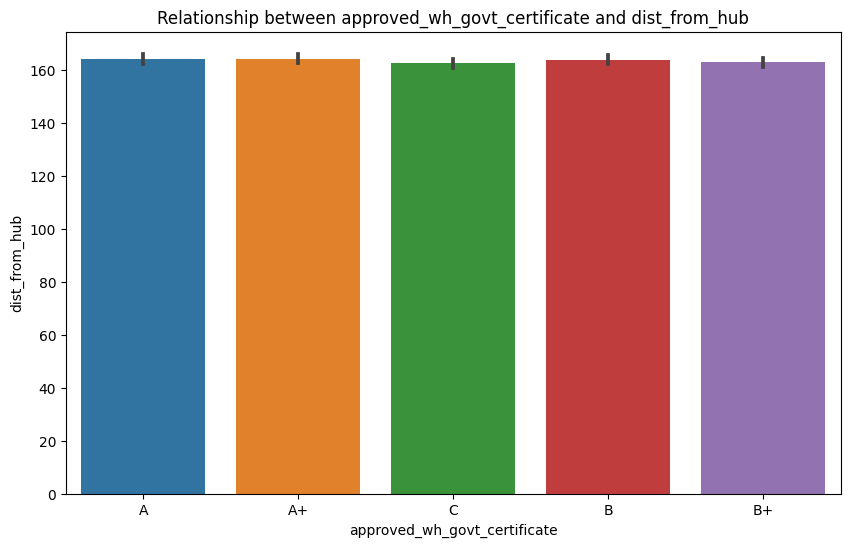

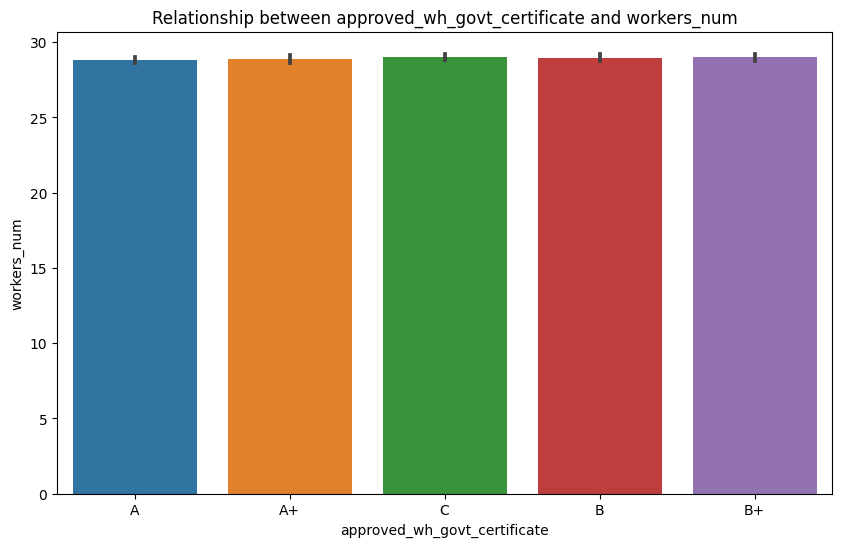

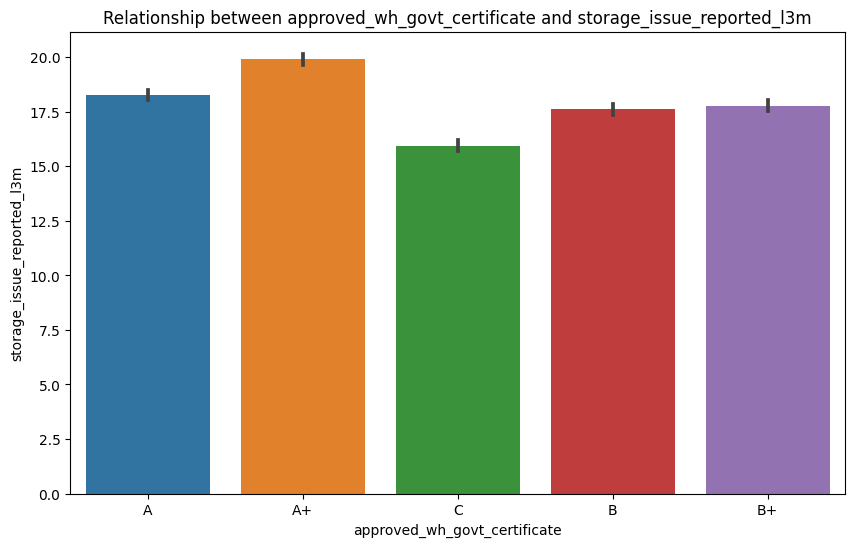

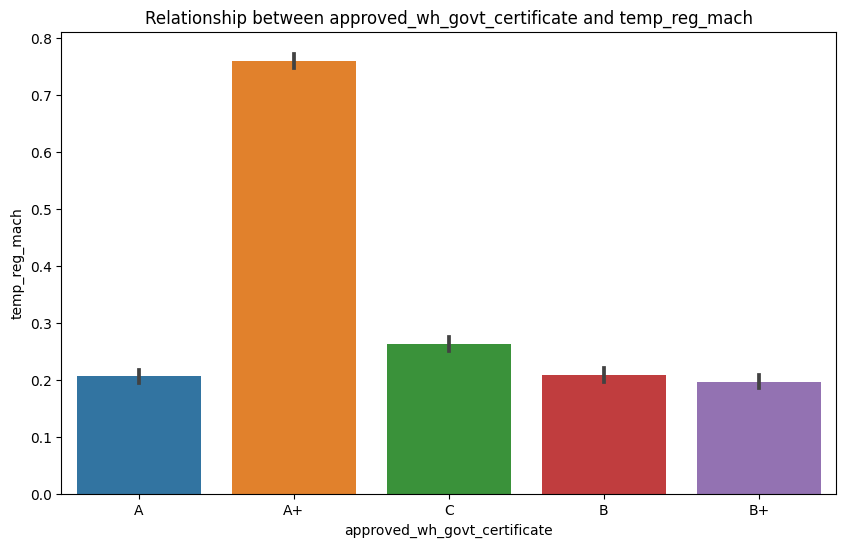

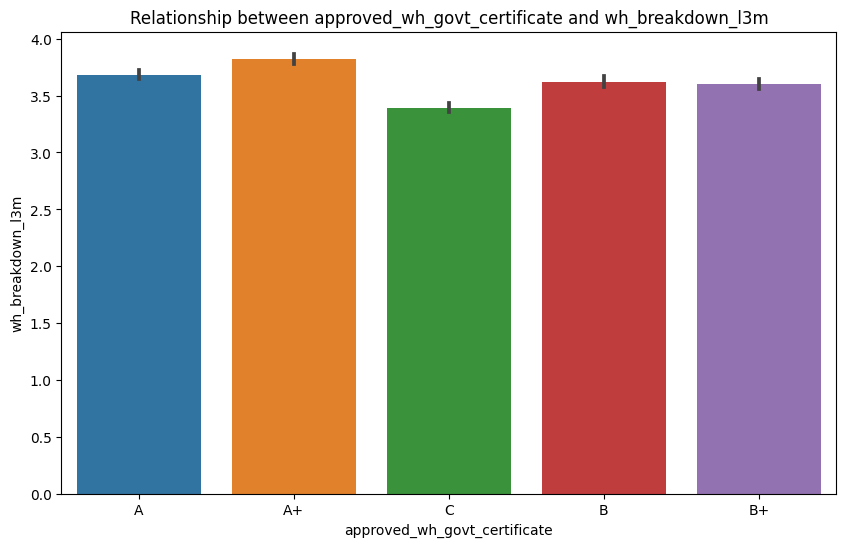

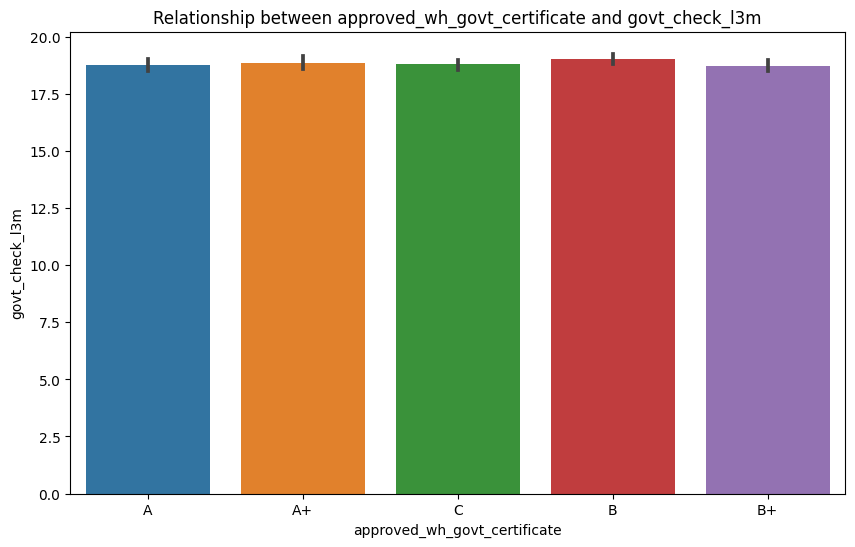

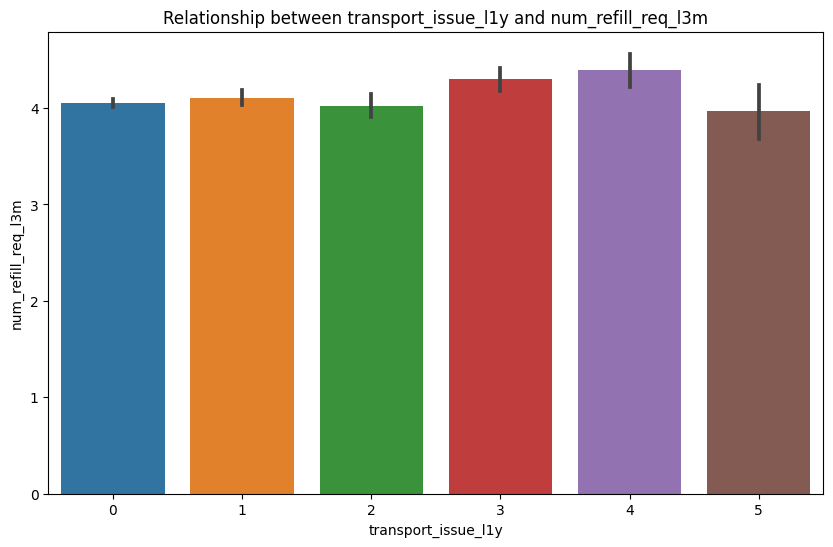

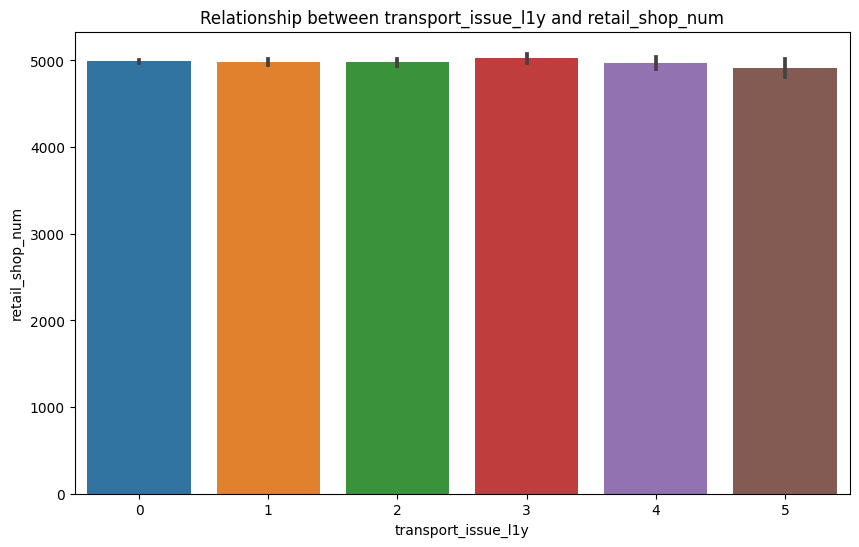

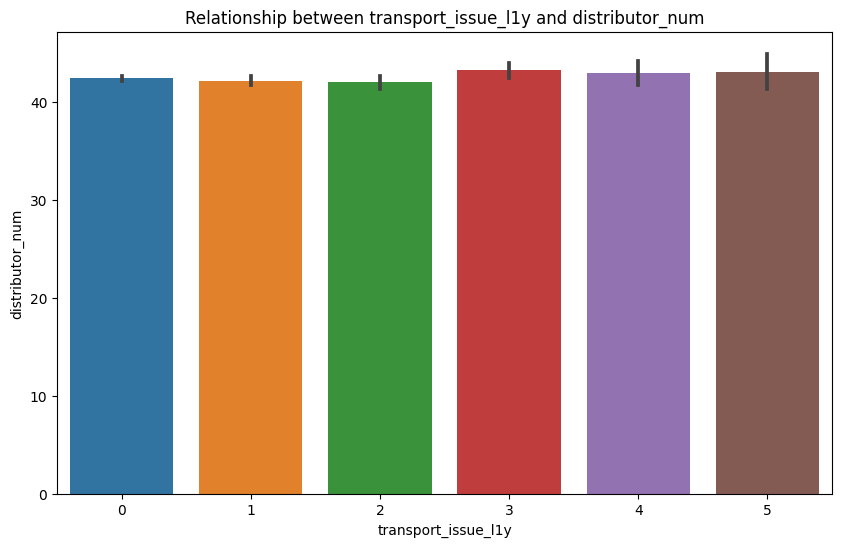

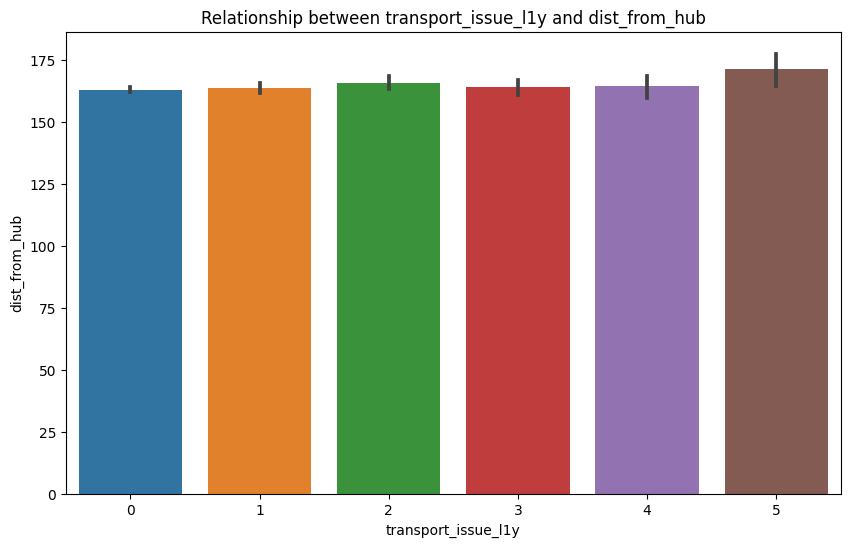

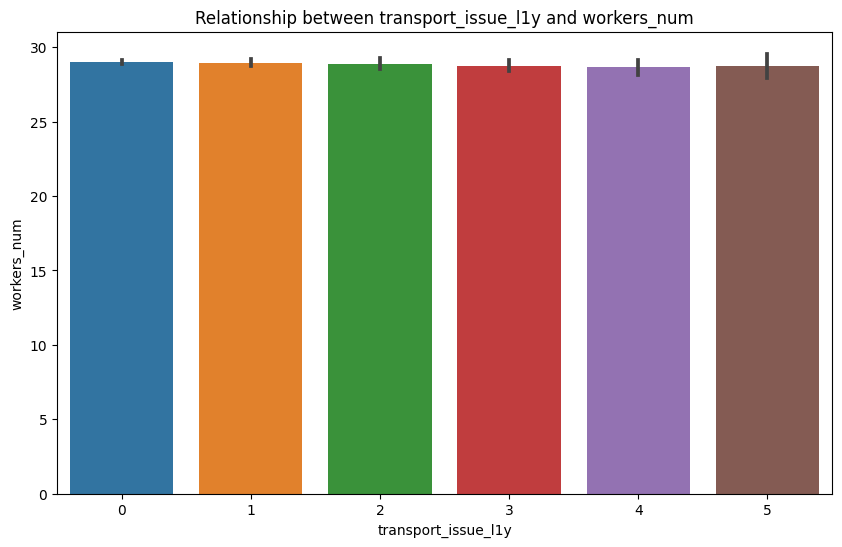

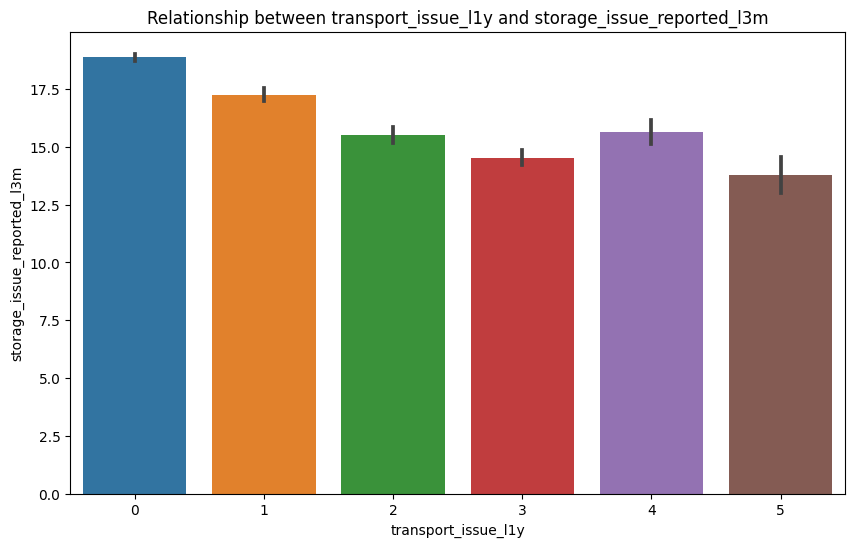

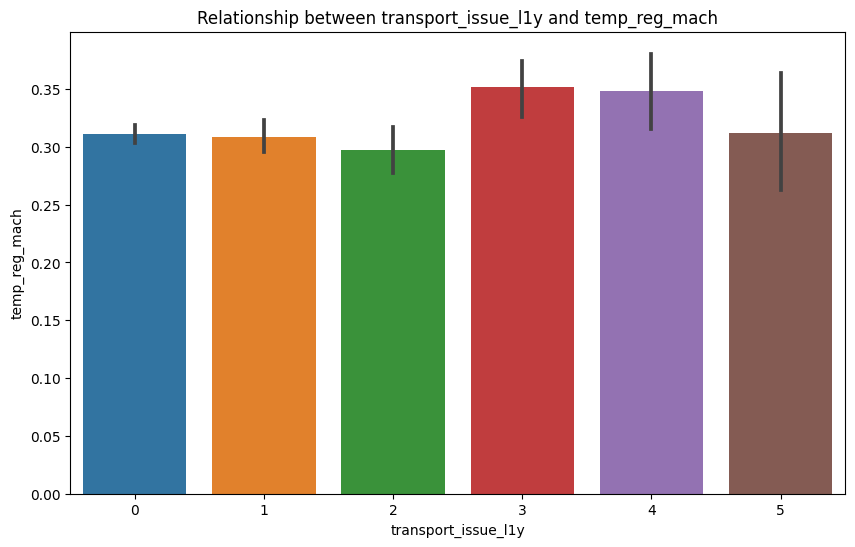

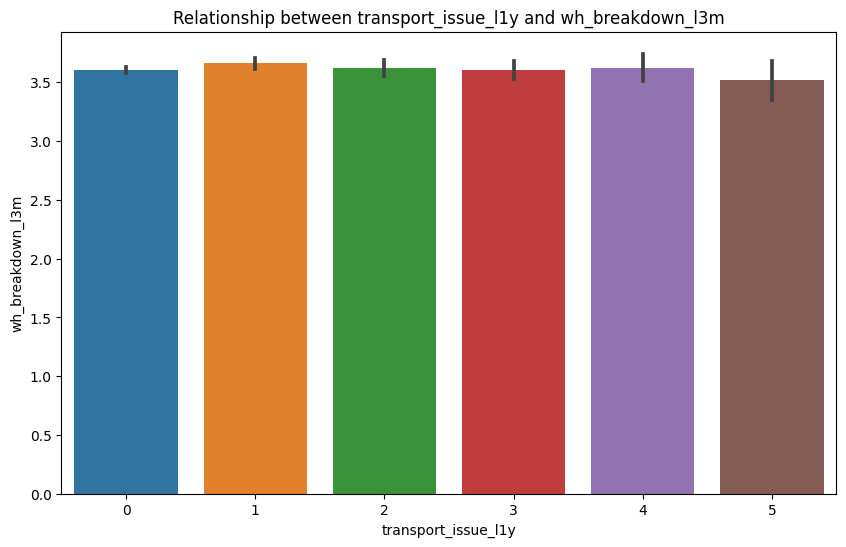

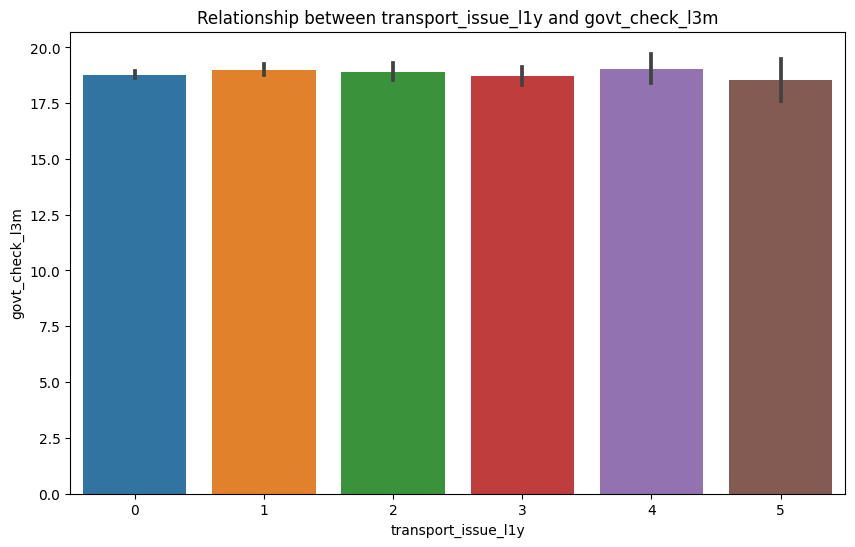

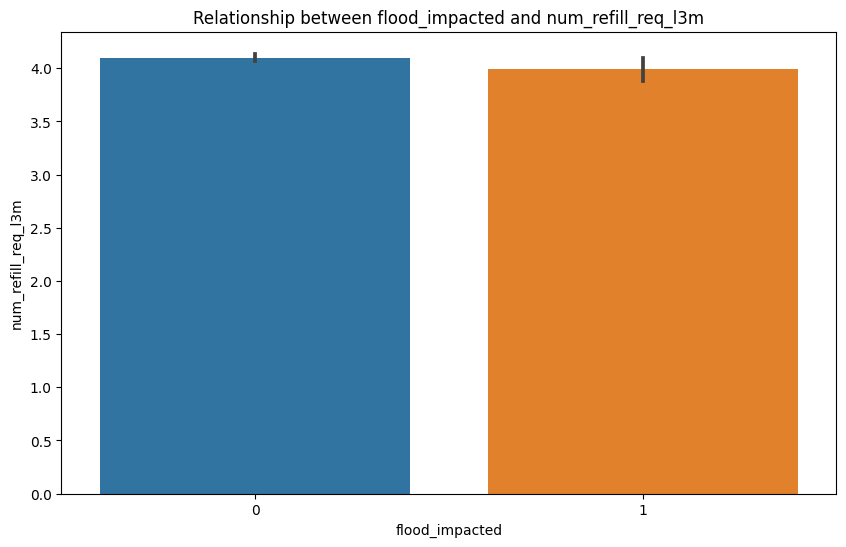

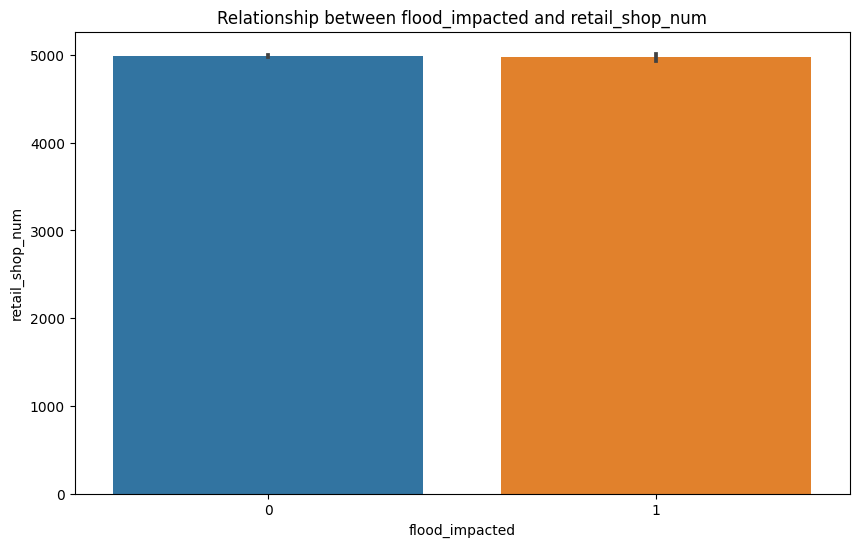

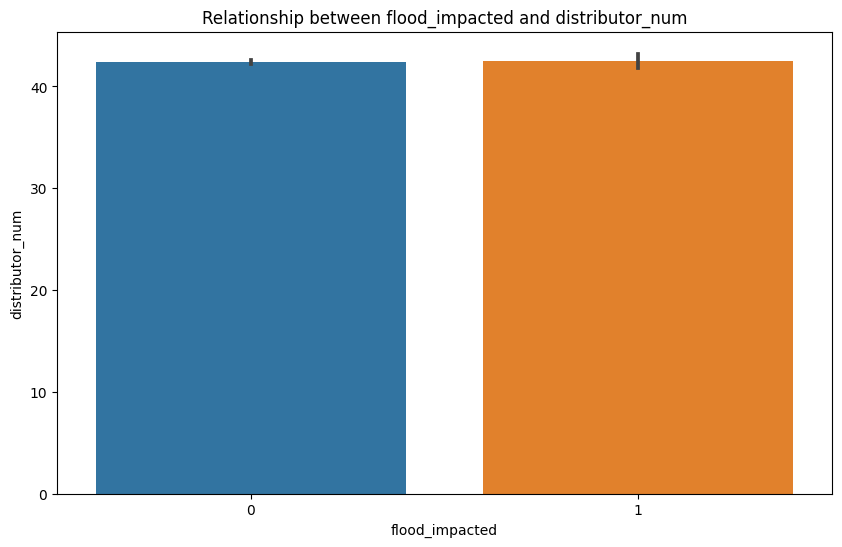

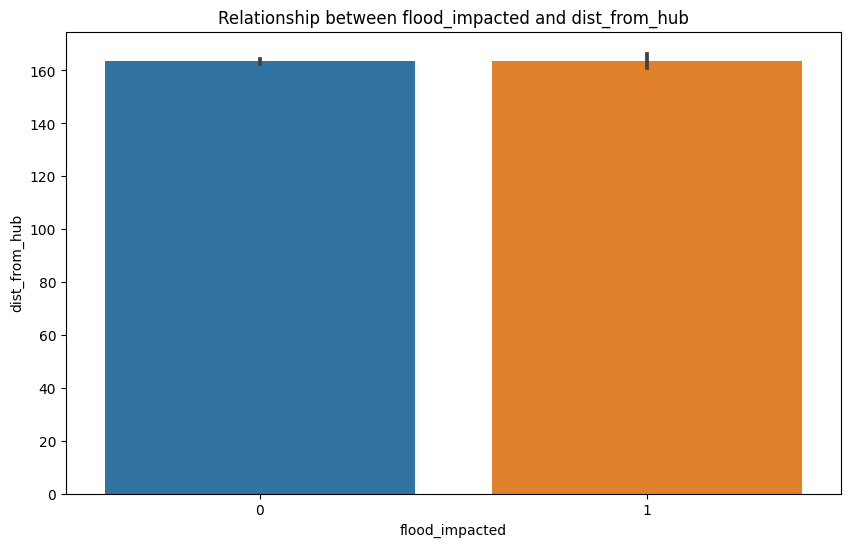

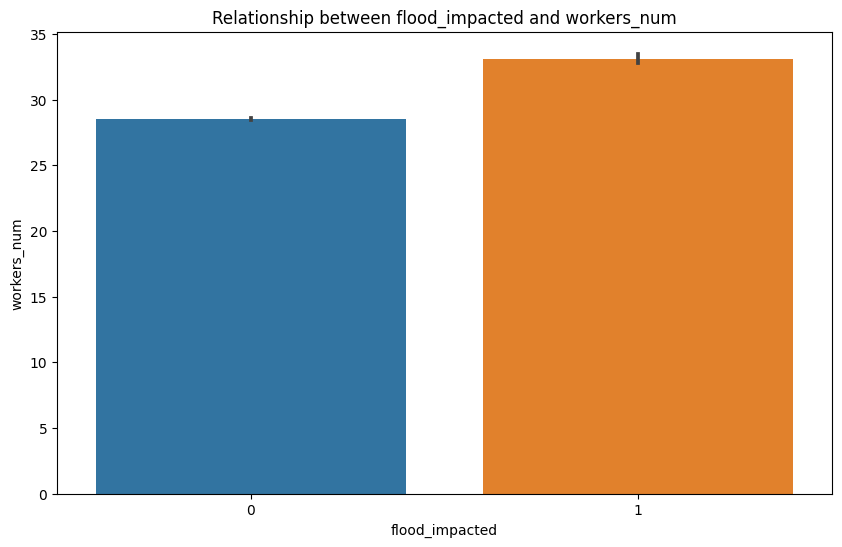

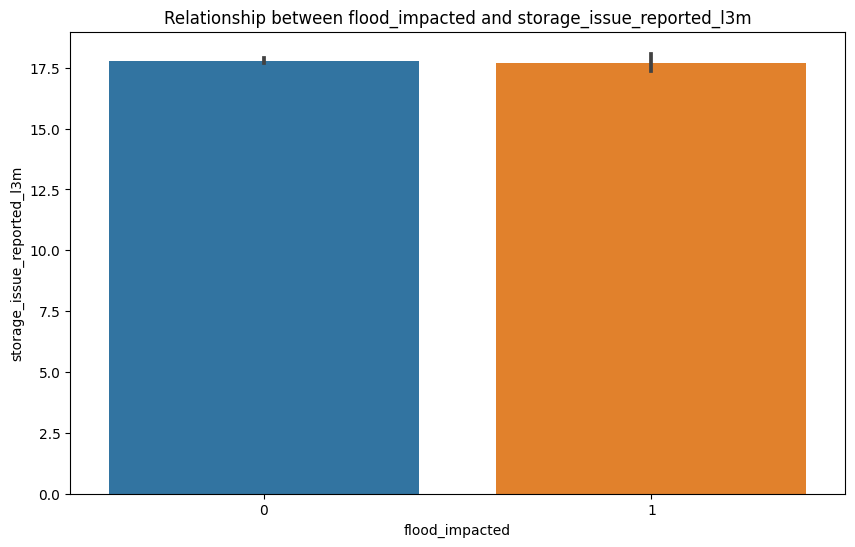

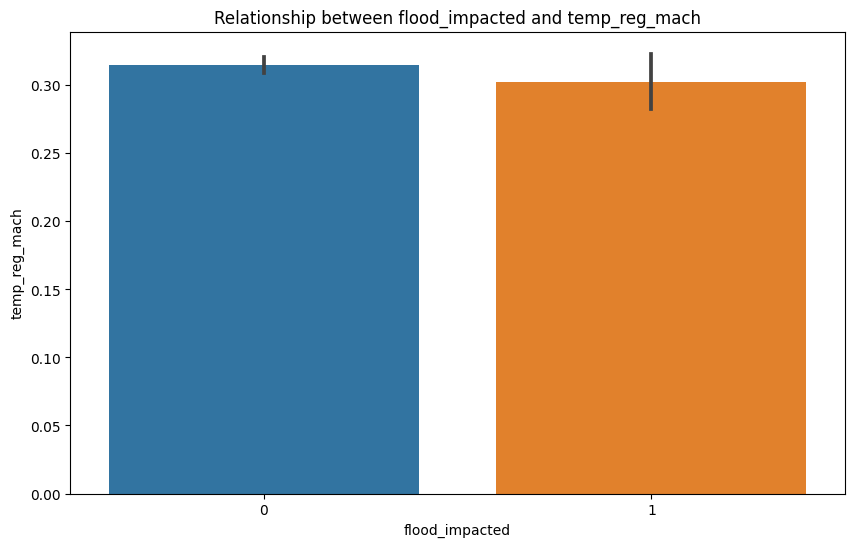

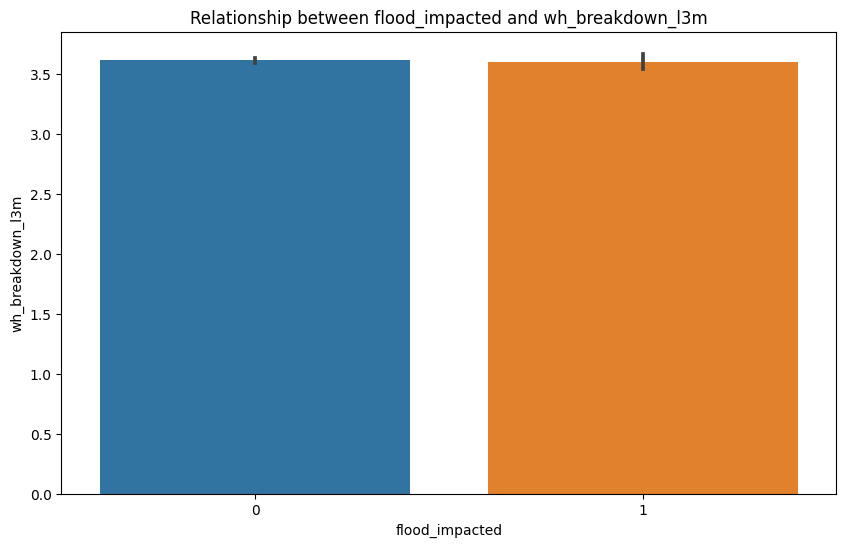

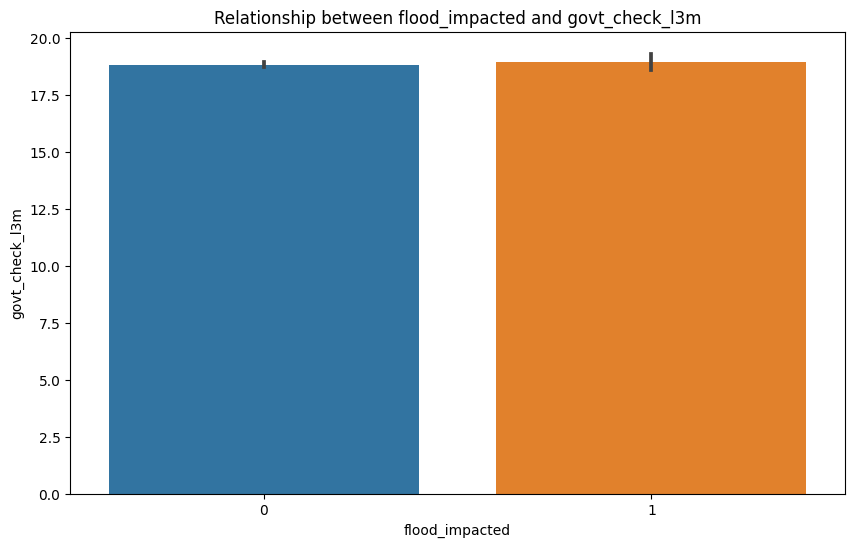

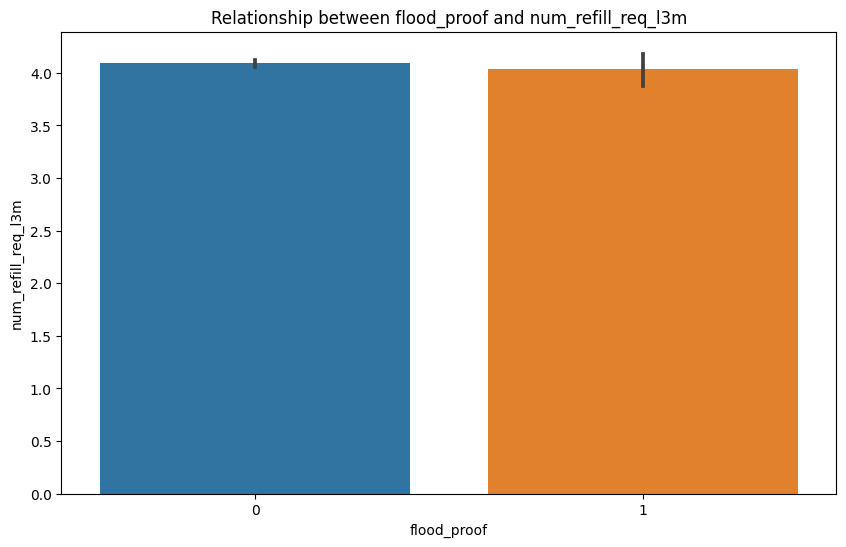

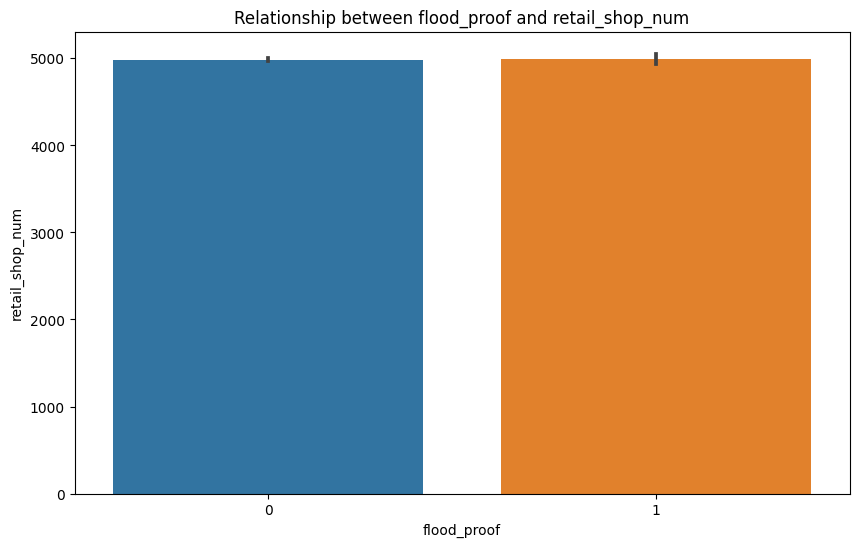

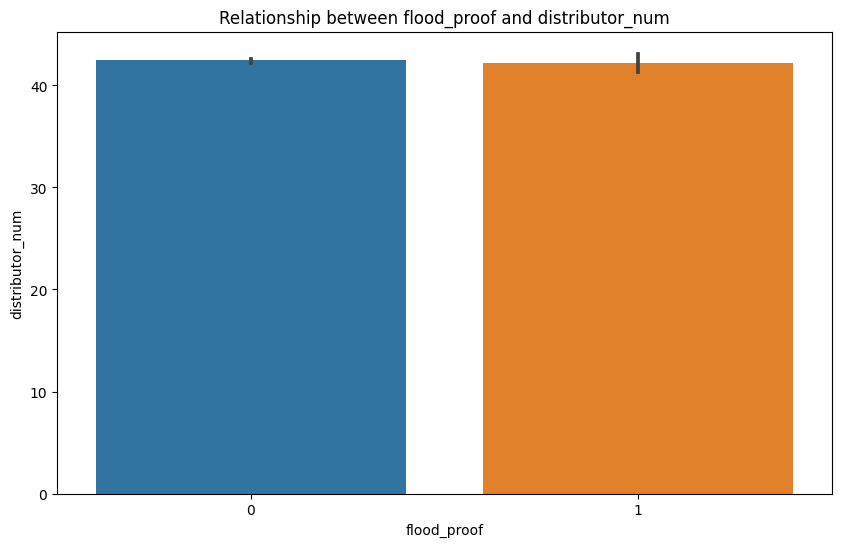

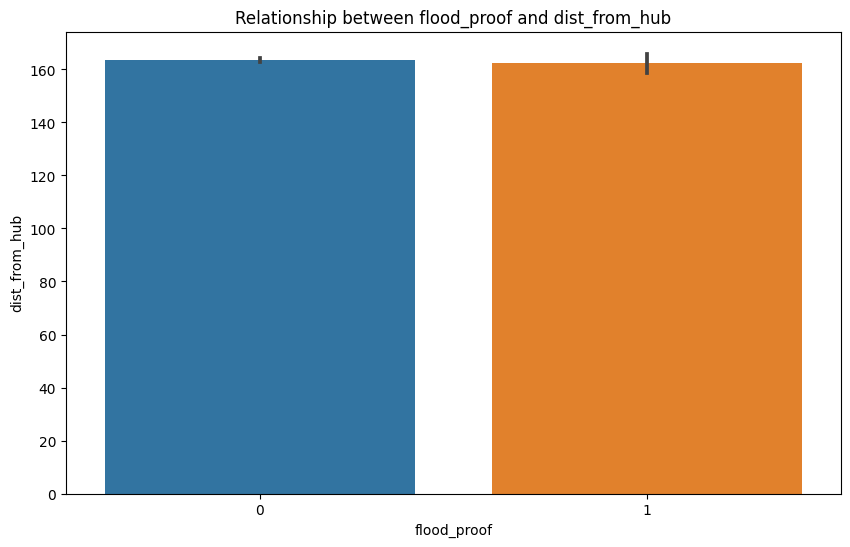

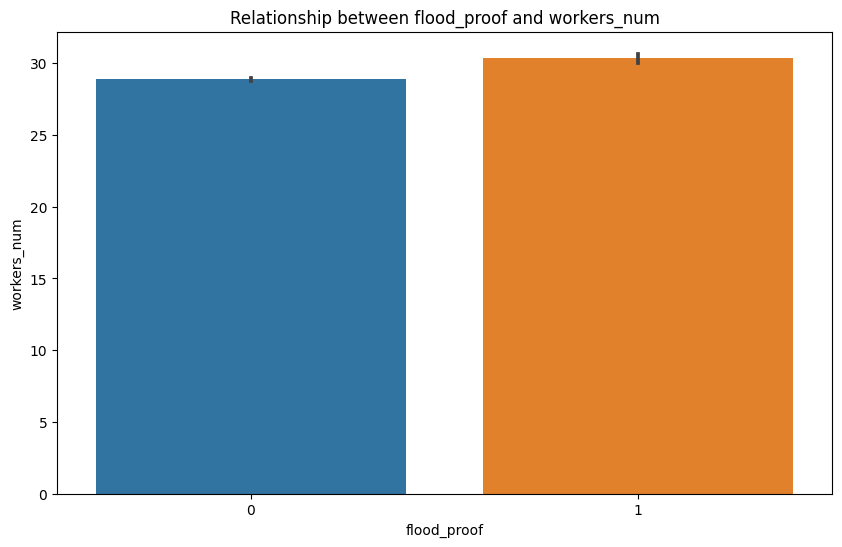

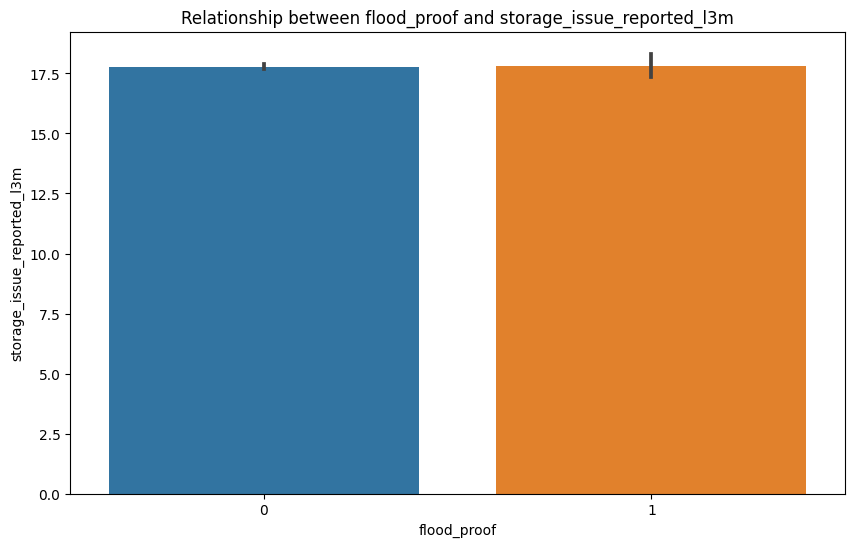

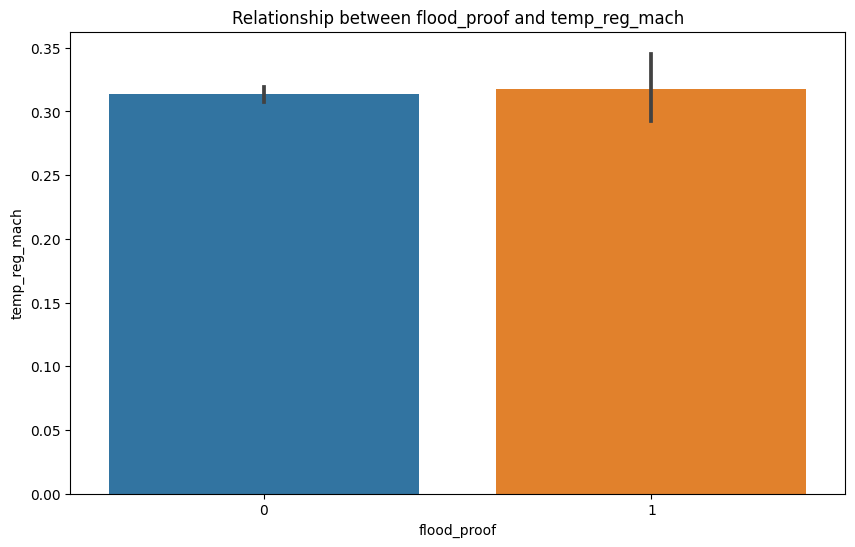

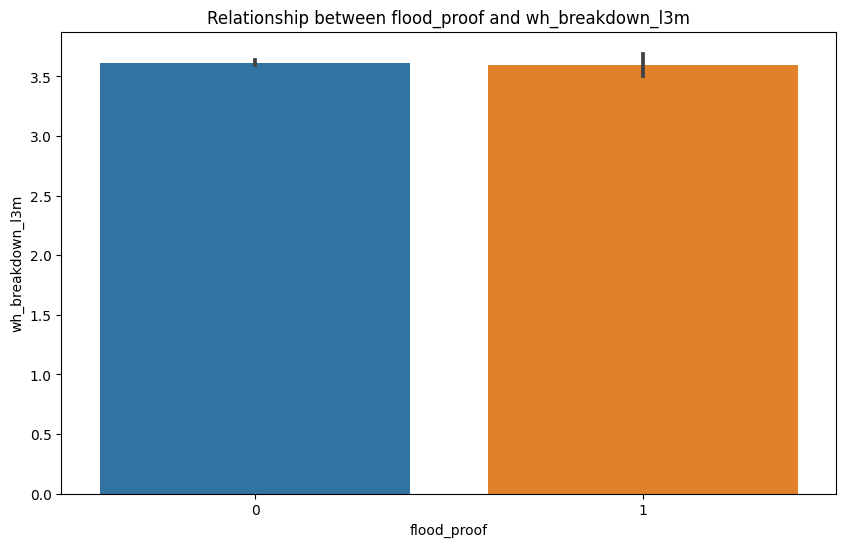

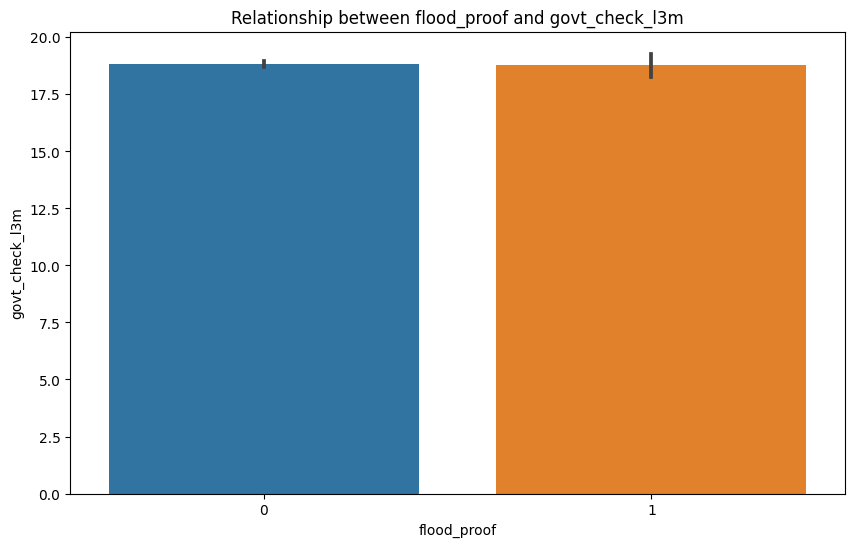

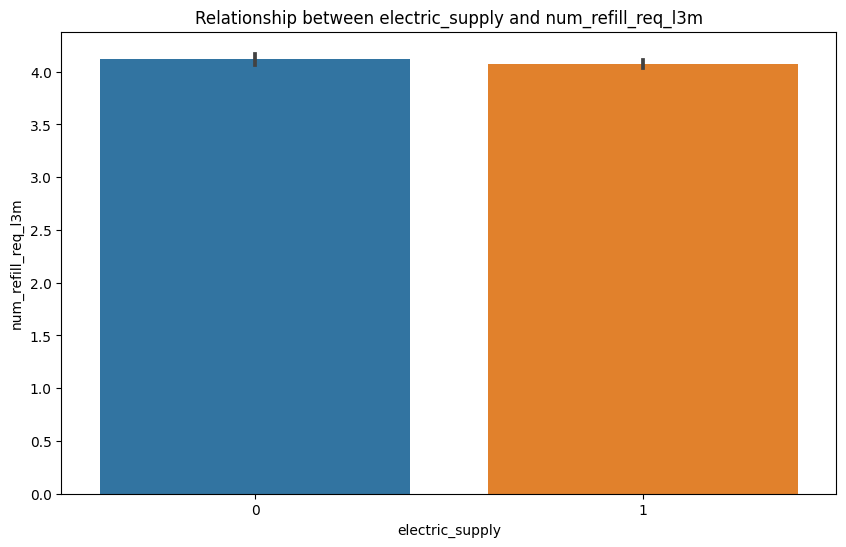

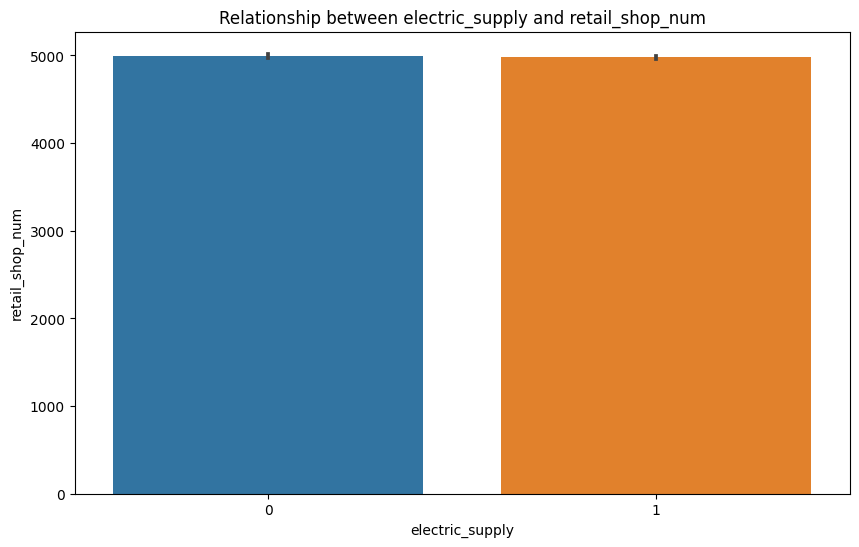

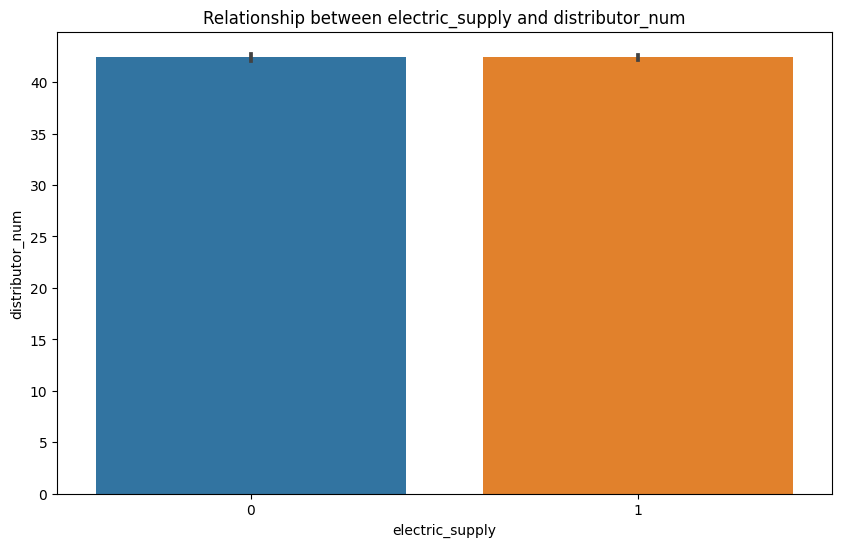

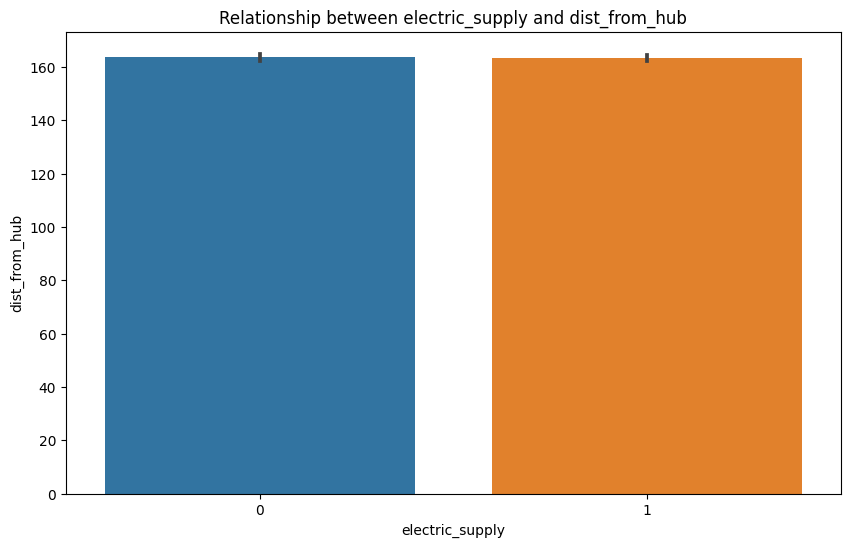

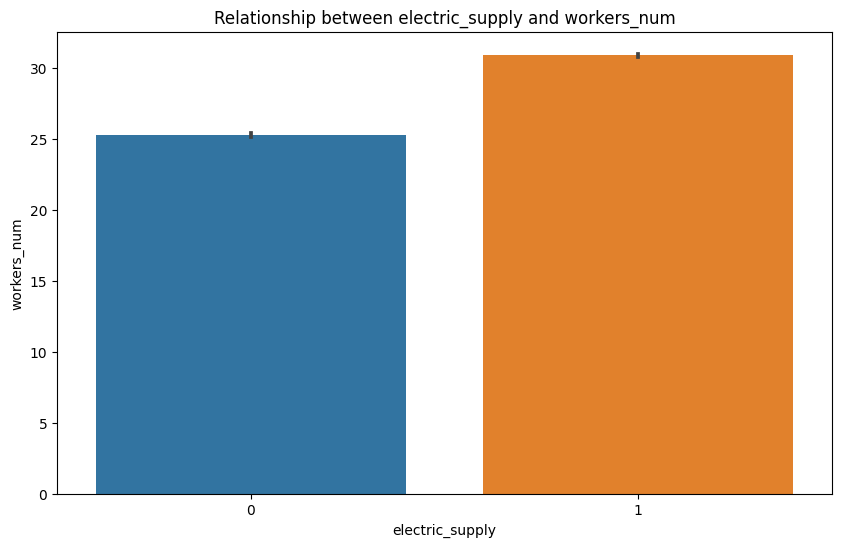

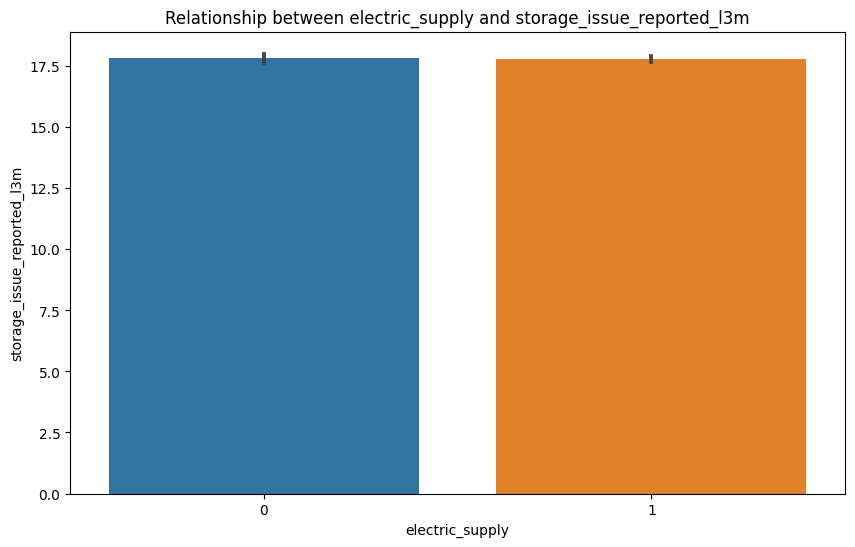

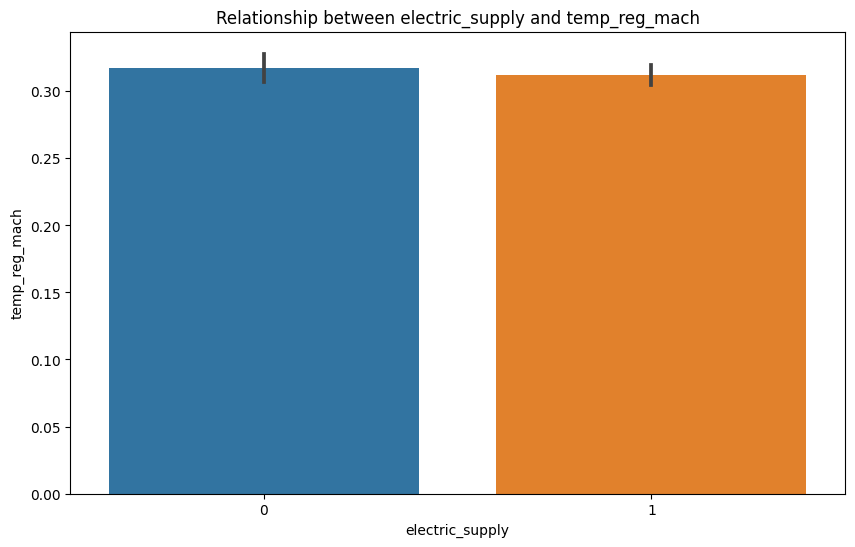

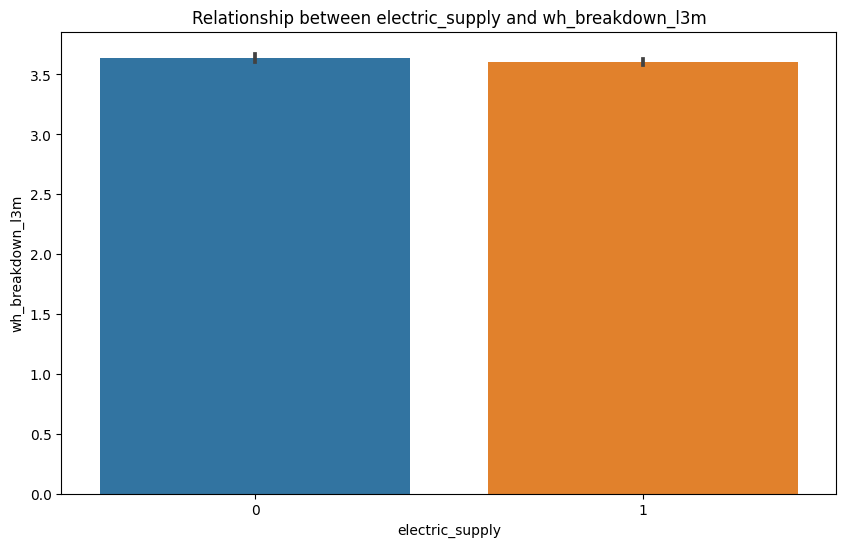

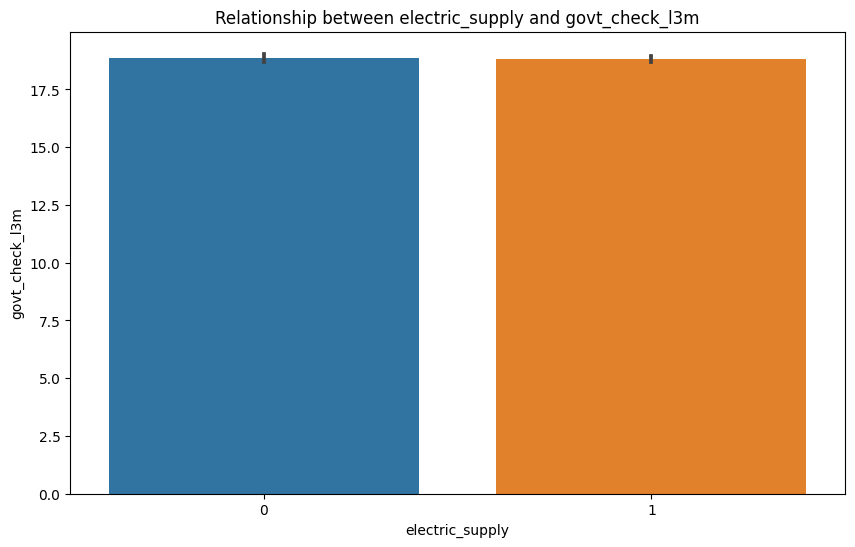

In [33]:
for cat_attribute in categorical_attributes:
    for cont_attribute in continuous_attributes:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cat_attribute, y=cont_attribute, data=df_x)
        plt.title(f'Relationship between {cat_attribute} and {cont_attribute}')
        plt.show()

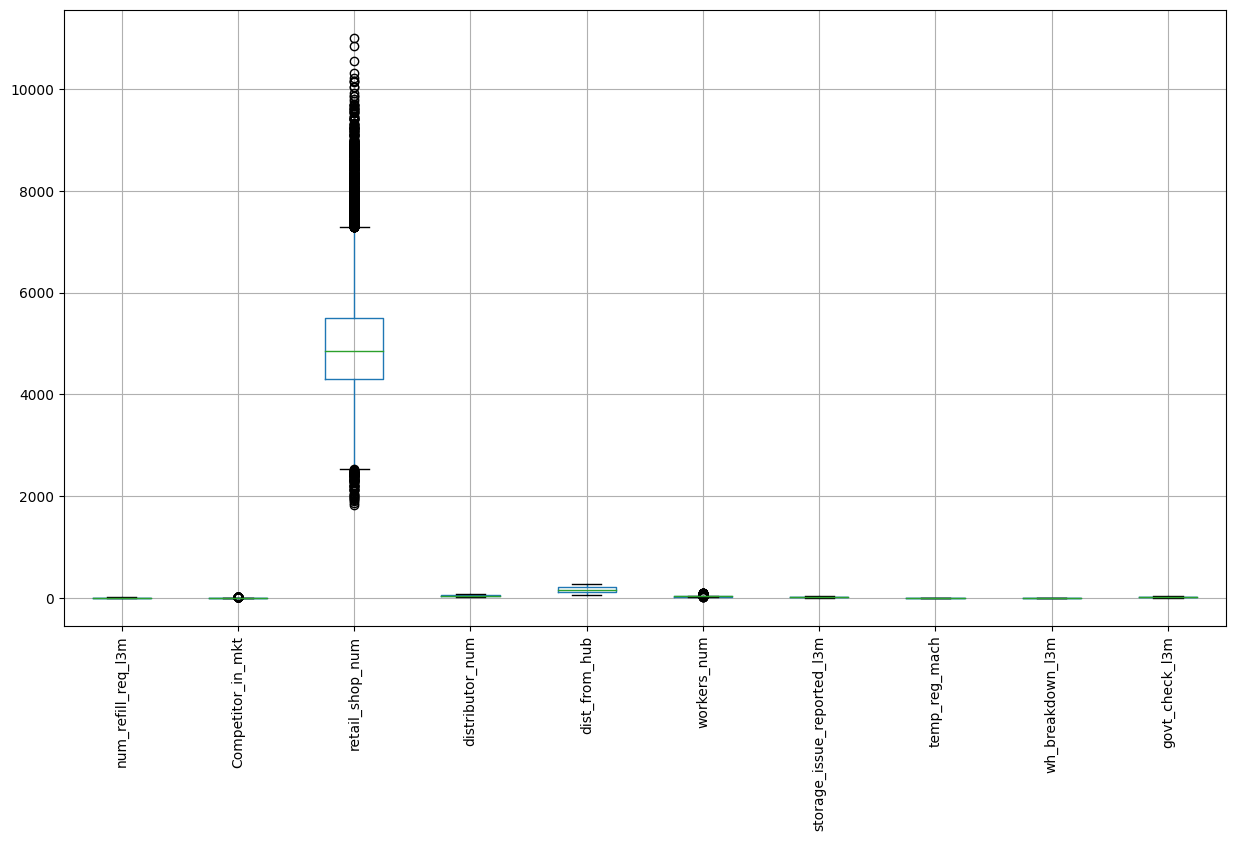

In [34]:
df_x.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [35]:
df_x.describe().T

count         mean          std     min     25%  \
num_refill_req_l3m          23134.0     4.089046     2.607848     0.0     2.0   
Competitor_in_mkt           23134.0     3.109233     1.144868     0.0     2.0   
retail_shop_num             23134.0  4984.822945  1053.467108  1821.0  4311.0   
distributor_num             23134.0    42.420982    16.050677    15.0    29.0   
dist_from_hub               23134.0   163.445881    62.735082    55.0   109.0   
workers_num                 23134.0    28.941644     7.867162    10.0    24.0   
storage_issue_reported_l3m  23134.0    17.787715     8.697196     4.0    11.0   
temp_reg_mach               23134.0     0.313737     0.464021     0.0     0.0   
wh_breakdown_l3m            23134.0     3.613599     1.577423     1.0     2.0   
govt_check_l3m              23134.0    18.826792     8.632020     1.0    11.0   

                               50%     75%      max  
num_refill_req_l3m             4.0     6.0      8.0  
Competitor_in_mkt              3.0     4.0     12.0  
retail_shop_num             4859.0  5500.0  11008.0  
distributor_num               42.0    56.0     70.0  
dist_from_hub                164.0   218.0    271.0  
workers_num                   28.0    33.0     98.0  
storage_issue_reported_l3m    18.0    24.0     39.0  
temp_reg_mach                  0.0     1.0      1.0  
wh_breakdown_l3m               3.0     5.0      6.0  
govt_check_l3m                21.0    26.0     32.0

In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_x
y = df_y 

min_rows = min(len(X), len(y))
X = X.iloc[:min_rows, :]
y = y.iloc[:min_rows]

categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestRegressor()

rfe = RFE(model, n_features_to_select=5)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('rfe', rfe)])

X_rfe = pipeline.fit_transform(X, y)

selected_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_rfe)

df_x['cluster_label'] = clusters

print("Selected Features:", selected_features)
print("Cluster Labels:", df_x['cluster_label'])

Selected Features: ['num__num_refill_req_l3m' 'num__transport_issue_l1y'
 'num__Competitor_in_mkt' 'num__retail_shop_num' 'num__distributor_num'
 'num__flood_impacted' 'num__flood_proof' 'num__electric_supply'
 'num__dist_from_hub' 'num__workers_num' 'num__storage_issue_reported_l3m'
 'num__temp_reg_mach' 'num__wh_breakdown_l3m' 'num__govt_check_l3m'
 'cat__Location_type_Rural' 'cat__Location_type_Urban'
 'cat__WH_capacity_size_Large' 'cat__WH_capacity_size_Mid'
 'cat__WH_capacity_size_Small' 'cat__zone_East' 'cat__zone_North'
 'cat__zone_South' 'cat__zone_West' 'cat__WH_regional_zone_Zone 1'
 'cat__WH_regional_zone_Zone 2' 'cat__WH_regional_zone_Zone 3'
 'cat__WH_regional_zone_Zone 4' 'cat__WH_regional_zone_Zone 5'
 'cat__WH_regional_zone_Zone 6' 'cat__wh_owner_type_Company Owned'
 'cat__wh_owner_type_Rented' 'cat__approved_wh_govt_certificate_A'
 'cat__approved_wh_govt_certificate_A+'
 'cat__approved_wh_govt_certificate_B'
 'cat__approved_wh_govt_certificate_B+'
 'cat__approved_wh_go

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, X_train.select_dtypes(exclude=['object', 'category']).columns),
    ('cat', categorical_transformer, X_train.select_dtypes(include=['object', 'category']).columns)
])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")

Random Forest MSE: 762181.1766567754, R2: 0.9939768908633729


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

gb_pipeline.fit(X_train, y_train)

y_pred_gb = gb_pipeline.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {gb_mse}, R2: {gb_r2}")

Gradient Boosting MSE: 700215.6945461736, R2: 0.9944665708408987


In [45]:
rfe = RFE(model, n_features_to_select=min(len(feature_names), 5))

pipeline.named_steps['rfe'] = rfe
X_rfe = pipeline.fit_transform(X_train, y_train)

selected_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = pipeline.named_steps['rfe'].estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(min(len(indices), len(selected_features))):
    print(f"{f + 1}. feature {selected_features[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature num__Competitor_in_mkt (0.9833284652536397)
2. feature num__retail_shop_num (0.005107629245105097)
3. feature num__distributor_num (0.0044983651230337445)
4. feature num__num_refill_req_l3m (0.0038196645556274537)
5. feature num__transport_issue_l1y (0.0032458758225940372)


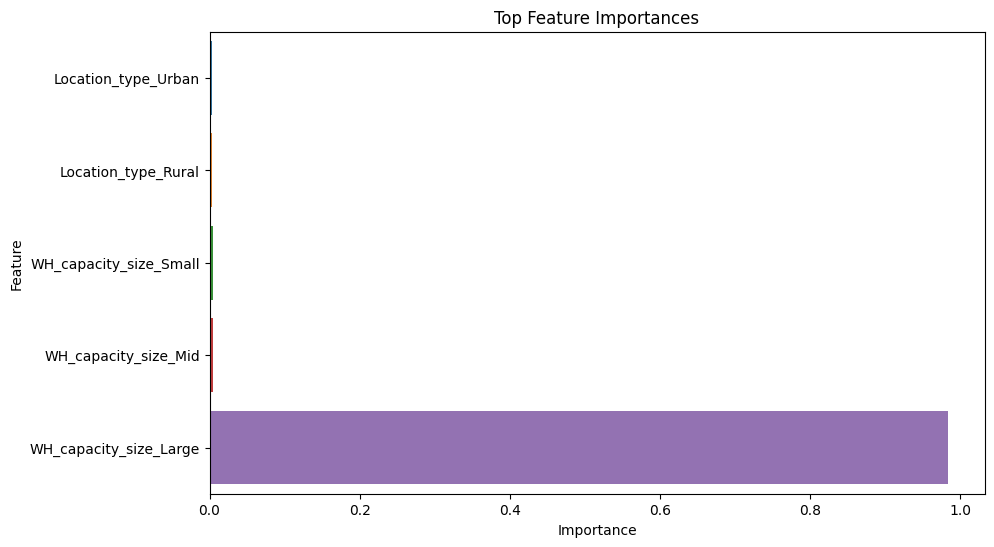

In [46]:
indices = np.argsort(importances)

top_k = min(10, len(feature_names)) 
sorted_top_features = [feature_names[i] for i in indices[-top_k:]]
sorted_top_importances = importances[indices[-top_k:]]

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
sns.barplot(x=sorted_top_importances, y=sorted_top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

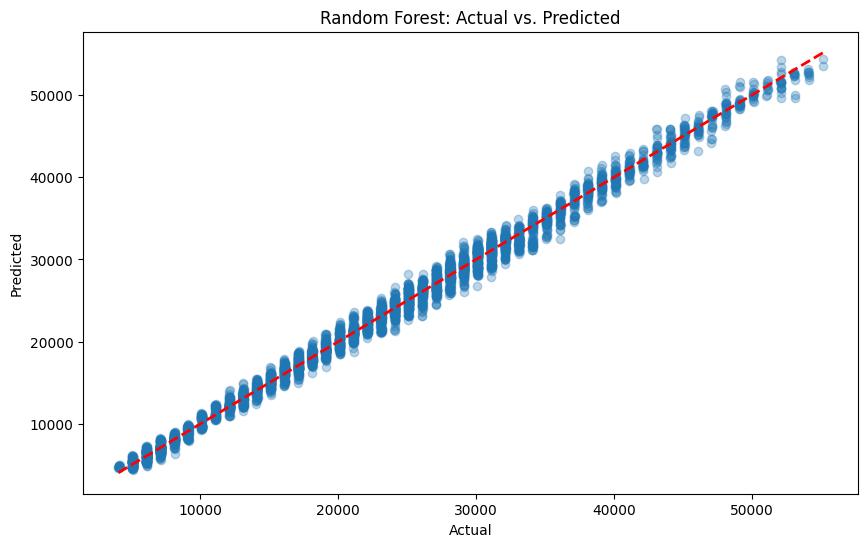

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

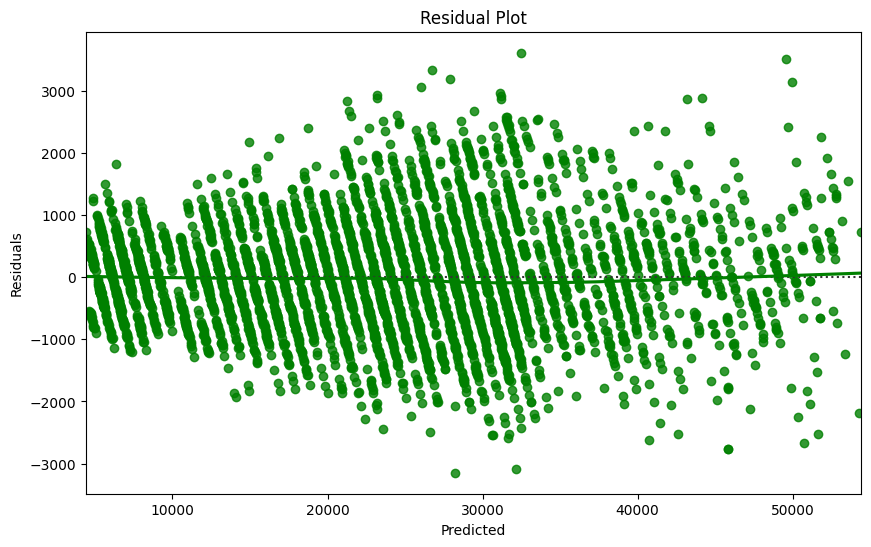

In [58]:
residuals_df = pd.DataFrame({'Predicted': y_pred_rf, 'Residuals': residuals})

plt.figure(figsize=(10, 6))
sns.residplot(data=residuals_df, x='Predicted', y='Residuals', lowess=True, color="g")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


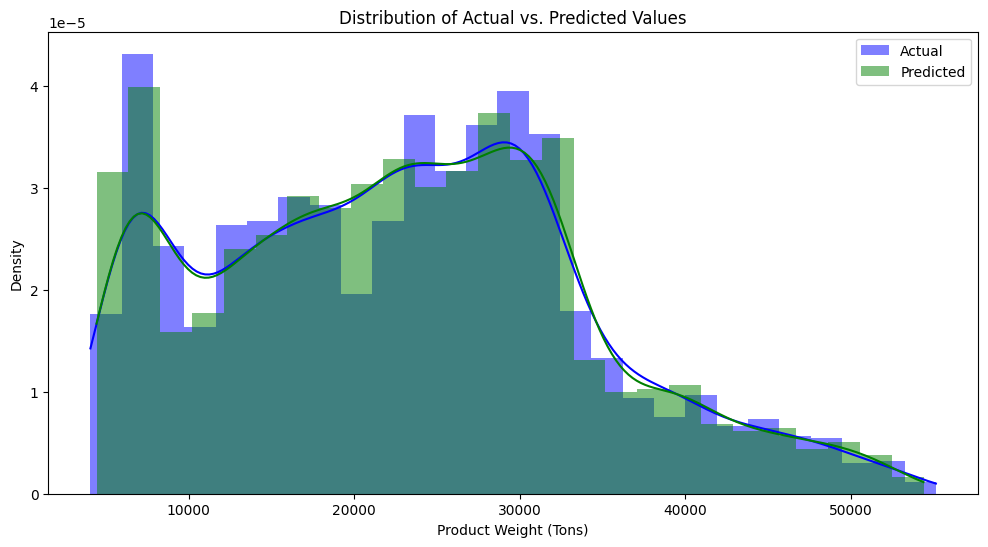

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, color="blue", label='Actual', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred_rf, color="green", label='Predicted', kde=True, stat="density", linewidth=0)
plt.xlabel('Product Weight (Tons)')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = df_x.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, df_x.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(df_x)

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, df_x.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

param_grid = {
    'regressor__n_estimators': [100, 200, 300],  
    'regressor__max_depth': [None, 10, 20],      
    'regressor__min_samples_split': [2, 5, 10],   
    'regressor__min_samples_leaf': [1, 2, 4]      
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor())])

param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_gbm_model = grid_search_gb.best_estimator_